In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
data = pd.read_csv("ESGData.csv")

In [3]:
df = data.copy()
df = df.iloc[3266:]

In [4]:
df.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
3266,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.700000,27.250000,28.500000,30.000000,31.100000,32.45000,33.800000,35.4,NaN,NaN
3267,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,89.500000,71.500000,97.700000,97.700000,93.430878,97.70000,97.700000,97.7,NaN,NaN
3268,Afghanistan,AFG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.288231,0.295242,0.355951,0.344837,0.397921,0.36222,0.381654,NaN,NaN,NaN


In [5]:
df = df.drop(columns=['Unnamed: 67'])

In [6]:
df.columns.tolist()

['Country Name',
 'Country Code',
 'Indicator Name',
 'Indicator Code',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [7]:
# Filter the data for specific 'Indicator Name' values
filtered_indicators = [
    'Life expectancy at birth, total (years)',  
    'GDP growth (annual %)',
    'Standardised Precipitation-Evapotranspiration Index'
]
df_filtered = df[df['Indicator Name'].isin(filtered_indicators)]

# Transpose the year columns and create a new DataFrame
df_formatted = pd.melt(df_filtered, 
                       id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                       var_name='Year', 
                       value_name='Value')

# Display the first few rows of the formatted DataFrame
df_formatted.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,32.53500
2,Afghanistan,AFG,Standardised Precipitation-Evapotranspiration ...,EN.CLC.SPEI.XD,1960,0.76152
3,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1960,NaN
4,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,54.43900


In [8]:
# Splitting df_formatted into separate DataFrames for each Indicator Name
life_expectancy_df = df_formatted[df_formatted['Indicator Name'] == 'Life expectancy at birth, total (years)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Life expectancy at birth, total (years)'})

gdp_growth_df = df_formatted[df_formatted['Indicator Name'] == 'GDP growth (annual %)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'GDP growth (annual %)'})

spei_df = df_formatted[df_formatted['Indicator Name'] == 'Standardised Precipitation-Evapotranspiration Index'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Standardised Precipitation-Evapotranspiration Index'})

# Merging the DataFrames on 'Country Name', 'Country Code', and 'Year' to combine them
merged_df = life_expectancy_df.merge(gdp_growth_df, on=['Country Name', 'Country Code', 'Year'], how='outer')\
                              .merge(spei_df, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Display the first few rows of the final merged DataFrame
merged_df.head()

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index
0,Afghanistan,AFG,1960,32.535,NaN,0.761520
1,Albania,ALB,1960,54.439,NaN,1.341166
2,Algeria,DZA,1960,40.532,NaN,-0.304291
3,Andorra,AND,1960,NaN,NaN,1.628674
4,Angola,AGO,1960,38.211,NaN,1.592433


In [9]:
merged_df.loc[(merged_df['Country Name'] == 'Austria')].sort_values(by ='Year')

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index
9,Austria,AUT,1960,68.585610,NaN,0.817471
202,Austria,AUT,1961,69.577317,5.537979,-0.945359
395,Austria,AUT,1962,69.309512,2.648675,0.665004
588,Austria,AUT,1963,69.443659,4.138268,-1.061164
781,Austria,AUT,1964,69.921951,6.124354,0.193018
974,Austria,AUT,1965,69.722195,3.480175,1.981050
1167,Austria,AUT,1966,70.045854,5.642861,1.620247
1360,Austria,AUT,1967,69.917805,3.008048,-0.605576
1553,Austria,AUT,1968,70.057561,4.472313,-0.670223
1746,Austria,AUT,1969,69.833171,6.275867,-0.890059


In [10]:
# Selecting specified columns
selected_df = merged_df[['Country Name', 'Country Code', 'Year', 'Life expectancy at birth, total (years)', 'GDP growth (annual %)','Standardised Precipitation-Evapotranspiration Index']].copy()

# Sorting by 'Country Name' and 'Year' to prepare for rolling calculations
selected_df = selected_df.sort_values(by=['Country Name', 'Year'])

# Creating Moving Average and STD columns for the specified time frames (2, 3, 5, and 10 years)
# time_frames = [2, 3, 5, 10]
time_frames = [2, 3, 5, 10]
for window in time_frames:
    selected_df[f'LE Moving_Avg_{window}Y'] = selected_df.groupby('Country Name')['Life expectancy at birth, total (years)'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    # selected_df[f'STD_{window}Y'] = selected_df.groupby('Country Name')['Life expectancy at birth, total (years)'].transform(lambda x: x.rolling(window, min_periods=1).std())
    #selected_df[f'GDP Moving_Avg_{window}Y'] = selected_df.groupby('Country Name')['GDP growth (annual %)'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    #selected_df[f'SPEI Precipitation Moving_Avg_{window}Y'] = selected_df.groupby('Country Name')['Standardised Precipitation-Evapotranspiration Index'].transform(lambda x: x.rolling(window, min_periods=1).mean())
# Displaying the first few rows of the updated DataFrame
selected_df.loc[selected_df['Country Name'] == 'Austria']

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index,LE Moving_Avg_2Y,LE Moving_Avg_3Y,LE Moving_Avg_5Y,LE Moving_Avg_10Y
9,Austria,AUT,1960,68.585610,NaN,0.817471,68.585610,68.585610,68.585610,68.585610
202,Austria,AUT,1961,69.577317,5.537979,-0.945359,69.081463,69.081463,69.081463,69.081463
395,Austria,AUT,1962,69.309512,2.648675,0.665004,69.443415,69.157480,69.157480,69.157480
588,Austria,AUT,1963,69.443659,4.138268,-1.061164,69.376585,69.443496,69.229024,69.229024
781,Austria,AUT,1964,69.921951,6.124354,0.193018,69.682805,69.558374,69.367610,69.367610
974,Austria,AUT,1965,69.722195,3.480175,1.981050,69.822073,69.695935,69.594927,69.426707
1167,Austria,AUT,1966,70.045854,5.642861,1.620247,69.884024,69.896667,69.688634,69.515157
1360,Austria,AUT,1967,69.917805,3.008048,-0.605576,69.981829,69.895285,69.810293,69.565488
1553,Austria,AUT,1968,70.057561,4.472313,-0.670223,69.987683,70.007073,69.933073,69.620163
1746,Austria,AUT,1969,69.833171,6.275867,-0.890059,69.945366,69.936179,69.915317,69.641463


In [11]:
selected_df.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'Life expectancy at birth, total (years)',
 'GDP growth (annual %)',
 'Standardised Precipitation-Evapotranspiration Index',
 'LE Moving_Avg_2Y',
 'LE Moving_Avg_3Y',
 'LE Moving_Avg_5Y',
 'LE Moving_Avg_10Y']

In [12]:
selected_df['Year'] = selected_df['Year'].astype(int)

In [13]:
selected_df

,Country Name,Country Code,Year,"Life expectancy at birth, total (years)",GDP growth (annual %),Standardised Precipitation-Evapotranspiration Index,LE Moving_Avg_2Y,LE Moving_Avg_3Y,LE Moving_Avg_5Y,LE Moving_Avg_10Y
0,Afghanistan,AFG,1960,32.535,NaN,0.761520,32.5350,32.535000,32.535000,32.535000
193,Afghanistan,AFG,1961,33.068,NaN,-0.076736,32.8015,32.801500,32.801500,32.801500
386,Afghanistan,AFG,1962,33.547,NaN,-0.665528,33.3075,33.050000,33.050000,33.050000
579,Afghanistan,AFG,1963,34.016,NaN,0.216942,33.7815,33.543667,33.291500,33.291500
772,Afghanistan,AFG,1964,34.494,NaN,0.488956,34.2550,34.019000,33.532000,33.532000
...,...,...,...,...,...,...,...,...,...,...
11386,Zimbabwe,ZWE,2018,61.414,5.009867,-0.690707,61.0615,60.809667,60.173200,56.601200
11579,Zimbabwe,ZWE,2019,61.292,-6.332446,-0.301619,61.3530,61.138333,60.662400,57.924100
11772,Zimbabwe,ZWE,2020,61.124,-7.816951,-0.204054,61.2080,61.276667,60.969000,58.971300
11965,Zimbabwe,ZWE,2021,NaN,8.468017,-0.549090,61.1240,61.208000,61.134750,59.596222


In [14]:
selected_df['Country Name'].nunique()

193

In [15]:
selected_df.columns.tolist()

['Country Name',
 'Country Code',
 'Year',
 'Life expectancy at birth, total (years)',
 'GDP growth (annual %)',
 'Standardised Precipitation-Evapotranspiration Index',
 'LE Moving_Avg_2Y',
 'LE Moving_Avg_3Y',
 'LE Moving_Avg_5Y',
 'LE Moving_Avg_10Y']

## Training and testing the model for indicator 1

In [16]:
!pip install scikit-learn

In [17]:
import logging
from sklearn.ensemble import RandomForestRegressor

# Define year variables for training and prediction
TRAIN_START_YEAR = 1990
TRAIN_END_YEAR = 2009
PREDICTION_START_YEAR = 2010
PREDICTION_END_YEAR = 2019

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df[(selected_df['Year'] >= TRAIN_START_YEAR) & (selected_df['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Life expectancy at birth, total (years)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values
y_train = train_df['Life expectancy at birth, total (years)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Life expectancy at birth, total (years)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"LE Moving_Avg_2Y={country_data['LE Moving_Avg_2Y']}, "
                    f"LE Moving_Avg_3Y={country_data['LE Moving_Avg_3Y']}, "
                    f"LE Moving_Avg_5Y={country_data['LE Moving_Avg_5Y']}, "
                    f"LE Moving_Avg_10Y={country_data['LE Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Life expectancy at birth, total (years)'] = predicted_value
        country_data['LE Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['LE Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['LE Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['LE Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-11 16:54:12,160 - INFO - Model trained on all countries' data (1990-2009). Starting recursive forecasting.
2024-11-11 16:54:12,163 - INFO - Processing country: Afghanistan
2024-11-11 16:54:12,165 - INFO - Prediction inputs for Afghanistan in 2010: Year=2010, LE Moving_Avg_2Y=60.108, LE Moving_Avg_3Y=59.775666666666666, LE Moving_Avg_5Y=59.27439999999999, LE Moving_Avg_10Y=57.92100000000001
2024-11-11 16:54:12,173 - INFO - Predicted value for Afghanistan in 2010: 60.40797999999991
2024-11-11 16:54:12,174 - INFO - Prediction inputs for Afghanistan in 2011: Year=2011, LE Moving_Avg_2Y=60.38598999999995, LE Moving_Avg_3Y=60.39331999999994, LE Moving_Avg_5Y=60.399183999999934, LE Moving_Avg_10Y=60.403581999999915
2024-11-11 16:54:12,181 - INFO - Predicted value for Afghanistan in 2011: 60.67054
2024-11-11 16:54:12,182 - INFO - Prediction inputs for Afghanistan in 2012: Year=2012, LE Moving_Avg_2Y=60.539259999999956, LE Moving_Avg_3Y=60.480839999999965, LE Moving_Avg_5Y=60.5567199999

2024-11-11 16:54:12,395 - INFO - Predicted value for Algeria in 2015: 73.74569975609764
2024-11-11 16:54:12,396 - INFO - Prediction inputs for Algeria in 2016: Year=2016, LE Moving_Avg_2Y=73.70794012195131, LE Moving_Avg_3Y=73.68536398373993, LE Moving_Avg_5Y=73.66211790243912, LE Moving_Avg_10Y=73.67351114634153
2024-11-11 16:54:12,405 - INFO - Predicted value for Algeria in 2016: 73.83475926829271
2024-11-11 16:54:12,406 - INFO - Prediction inputs for Algeria in 2017: Year=2017, LE Moving_Avg_2Y=73.79022951219517, LE Moving_Avg_3Y=73.75021317073178, LE Moving_Avg_5Y=73.70362000000009, LE Moving_Avg_10Y=73.70022900000005
2024-11-11 16:54:12,414 - INFO - Predicted value for Algeria in 2017: 73.87336512195131
2024-11-11 16:54:12,414 - INFO - Prediction inputs for Algeria in 2018: Year=2018, LE Moving_Avg_2Y=73.85406219512201, LE Moving_Avg_3Y=73.81794138211389, LE Moving_Avg_5Y=73.75284326829276, LE Moving_Avg_10Y=73.70795017073178
2024-11-11 16:54:12,422 - INFO - Predicted value for Al

2024-11-11 16:54:12,612 - INFO - Prediction inputs for Argentina in 2011: Year=2011, LE Moving_Avg_2Y=75.92093426829264, LE Moving_Avg_3Y=75.91591235772351, LE Moving_Avg_5Y=75.91189482926822, LE Moving_Avg_10Y=75.90888168292675
2024-11-11 16:54:12,617 - INFO - Predicted value for Argentina in 2011: 76.14592000000005
2024-11-11 16:54:12,618 - INFO - Prediction inputs for Argentina in 2012: Year=2012, LE Moving_Avg_2Y=76.02589426829266, LE Moving_Avg_3Y=75.9959295121951, LE Moving_Avg_5Y=76.05592570731707, LE Moving_Avg_10Y=76.10092285365857
2024-11-11 16:54:12,623 - INFO - Predicted value for Argentina in 2012: 76.14515268292685
2024-11-11 16:54:12,624 - INFO - Prediction inputs for Argentina in 2013: Year=2013, LE Moving_Avg_2Y=76.14553634146344, LE Moving_Avg_3Y=76.06564707317072, LE Moving_Avg_5Y=76.0556187804878, LE Moving_Avg_10Y=76.10038573170733
2024-11-11 16:54:12,629 - INFO - Predicted value for Argentina in 2013: 76.16701585365853
2024-11-11 16:54:12,629 - INFO - Prediction i

2024-11-11 16:54:12,783 - INFO - Predicted value for Australia in 2016: 82.5484414634146
2024-11-11 16:54:12,783 - INFO - Prediction inputs for Australia in 2017: Year=2017, LE Moving_Avg_2Y=82.52759999999996, LE Moving_Avg_3Y=82.47867560975605, LE Moving_Avg_5Y=82.34894292682925, LE Moving_Avg_10Y=82.1875775609756
2024-11-11 16:54:12,783 - INFO - Predicted value for Australia in 2017: 82.60955121951214
2024-11-11 16:54:12,783 - INFO - Prediction inputs for Australia in 2018: Year=2018, LE Moving_Avg_2Y=82.57899634146338, LE Moving_Avg_3Y=82.5549170731707, LE Moving_Avg_5Y=82.45881512195119, LE Moving_Avg_10Y=82.19979951219511
2024-11-11 16:54:12,799 - INFO - Predicted value for Australia in 2018: 82.66169268292677
2024-11-11 16:54:12,799 - INFO - Prediction inputs for Australia in 2019: Year=2019, LE Moving_Avg_2Y=82.63562195121946, LE Moving_Avg_3Y=82.60656178861784, LE Moving_Avg_5Y=82.54145414634142, LE Moving_Avg_10Y=82.20501365853659
2024-11-11 16:54:12,799 - INFO - Predicted val

2024-11-11 16:54:12,971 - INFO - Predicted value for Bahamas, The in 2012: 72.55699487804883
2024-11-11 16:54:12,971 - INFO - Prediction inputs for Bahamas, The in 2013: Year=2013, LE Moving_Avg_2Y=72.55672939024396, LE Moving_Avg_3Y=72.56111008130084, LE Moving_Avg_5Y=72.56386502439027, LE Moving_Avg_10Y=72.56042995121956
2024-11-11 16:54:12,983 - INFO - Predicted value for Bahamas, The in 2013: 72.56722268292688
2024-11-11 16:54:12,983 - INFO - Prediction inputs for Bahamas, The in 2014: Year=2014, LE Moving_Avg_2Y=72.56210878048785, LE Moving_Avg_3Y=72.5602271544716, LE Moving_Avg_5Y=72.56591058536587, LE Moving_Avg_10Y=72.56656663414637
2024-11-11 16:54:12,987 - INFO - Predicted value for Bahamas, The in 2014: 72.55965292682932
2024-11-11 16:54:12,987 - INFO - Prediction inputs for Bahamas, The in 2015: Year=2015, LE Moving_Avg_2Y=72.5634378048781, LE Moving_Avg_3Y=72.56129016260167, LE Moving_Avg_5Y=72.56204117073175, LE Moving_Avg_10Y=72.56278175609759
2024-11-11 16:54:12,987 - I

2024-11-11 16:54:13,151 - INFO - Predicted value for Bangladesh in 2018: 67.99643317073166
2024-11-11 16:54:13,151 - INFO - Prediction inputs for Bangladesh in 2019: Year=2019, LE Moving_Avg_2Y=67.93697231707316, LE Moving_Avg_3Y=67.88479308943086, LE Moving_Avg_5Y=67.7807447317073, LE Moving_Avg_10Y=67.62047546341464
2024-11-11 16:54:13,156 - INFO - Predicted value for Bangladesh in 2019: 68.06885121951221
2024-11-11 16:54:13,156 - INFO - Processing country: Barbados
2024-11-11 16:54:13,156 - INFO - Prediction inputs for Barbados in 2010: Year=2010, LE Moving_Avg_2Y=75.5625, LE Moving_Avg_3Y=75.48899999999999, LE Moving_Avg_5Y=75.285, LE Moving_Avg_10Y=74.8326
2024-11-11 16:54:13,156 - INFO - Predicted value for Barbados in 2010: 75.6975985365853
2024-11-11 16:54:13,156 - INFO - Prediction inputs for Barbados in 2011: Year=2011, LE Moving_Avg_2Y=75.68779926829265, LE Moving_Avg_3Y=75.69106569105686, LE Moving_Avg_5Y=75.69367882926824, LE Moving_Avg_10Y=75.69563868292678
2024-11-11 16:

2024-11-11 16:54:13,345 - INFO - Predicted value for Belgium in 2014: 80.1389780487804
2024-11-11 16:54:13,345 - INFO - Prediction inputs for Belgium in 2015: Year=2015, LE Moving_Avg_2Y=80.13769756097552, LE Moving_Avg_3Y=80.13567886178855, LE Moving_Avg_5Y=80.12051804878044, LE Moving_Avg_10Y=80.11926487804871
2024-11-11 16:54:13,345 - INFO - Predicted value for Belgium in 2015: 80.1389780487804
2024-11-11 16:54:13,345 - INFO - Prediction inputs for Belgium in 2016: Year=2016, LE Moving_Avg_2Y=80.1389780487804, LE Moving_Avg_3Y=80.13812439024382, LE Moving_Avg_5Y=80.13488634146334, LE Moving_Avg_10Y=80.11926487804871
2024-11-11 16:54:13,361 - INFO - Predicted value for Belgium in 2016: 80.14180731707307
2024-11-11 16:54:13,361 - INFO - Prediction inputs for Belgium in 2017: Year=2017, LE Moving_Avg_2Y=80.14039268292674, LE Moving_Avg_3Y=80.13992113821129, LE Moving_Avg_5Y=80.13756439024382, LE Moving_Avg_10Y=80.1201136585365
2024-11-11 16:54:13,361 - INFO - Predicted value for Belgiu

2024-11-11 16:54:13,518 - INFO - Predicted value for Bhutan in 2010: 67.93566341463409
2024-11-11 16:54:13,518 - INFO - Prediction inputs for Bhutan in 2011: Year=2011, LE Moving_Avg_2Y=67.91633170731706, LE Moving_Avg_3Y=67.92277560975607, LE Moving_Avg_5Y=67.92793073170728, LE Moving_Avg_10Y=67.93179707317067
2024-11-11 16:54:13,535 - INFO - Predicted value for Bhutan in 2011: 67.99931000000001
2024-11-11 16:54:13,535 - INFO - Prediction inputs for Bhutan in 2012: Year=2012, LE Moving_Avg_2Y=67.96748670731705, LE Moving_Avg_3Y=67.94399113821137, LE Moving_Avg_5Y=67.96611868292682, LE Moving_Avg_10Y=67.98271434146343
2024-11-11 16:54:13,535 - INFO - Predicted value for Bhutan in 2012: 68.0023004878049
2024-11-11 16:54:13,535 - INFO - Prediction inputs for Bhutan in 2013: Year=2013, LE Moving_Avg_2Y=68.00080524390245, LE Moving_Avg_3Y=67.97909130081301, LE Moving_Avg_5Y=67.96731487804878, LE Moving_Avg_10Y=67.98480768292684
2024-11-11 16:54:13,552 - INFO - Predicted value for Bhutan in

2024-11-11 16:54:13,705 - INFO - Predicted value for Bosnia and Herzegovina in 2016: 77.48252731707322
2024-11-11 16:54:13,705 - INFO - Prediction inputs for Bosnia and Herzegovina in 2017: Year=2017, LE Moving_Avg_2Y=77.4485679268293, LE Moving_Avg_3Y=77.424318699187, LE Moving_Avg_5Y=77.33173087804879, LE Moving_Avg_10Y=77.2704821707317
2024-11-11 16:54:13,722 - INFO - Predicted value for Bosnia and Herzegovina in 2017: 77.53975512195122
2024-11-11 16:54:13,722 - INFO - Prediction inputs for Bosnia and Herzegovina in 2018: Year=2018, LE Moving_Avg_2Y=77.51114121951221, LE Moving_Avg_3Y=77.4789636585366, LE Moving_Avg_5Y=77.40688556097561, LE Moving_Avg_10Y=77.28192773170731
2024-11-11 16:54:13,722 - INFO - Predicted value for Bosnia and Herzegovina in 2018: 77.59092682926831
2024-11-11 16:54:13,722 - INFO - Prediction inputs for Bosnia and Herzegovina in 2019: Year=2019, LE Moving_Avg_2Y=77.56534097560976, LE Moving_Avg_3Y=77.53773642276424, LE Moving_Avg_5Y=77.4807276097561, LE Movi

2024-11-11 16:54:13,877 - INFO - Prediction inputs for Brunei Darussalam in 2012: Year=2012, LE Moving_Avg_2Y=74.89909658536581, LE Moving_Avg_3Y=74.88139772357721, LE Moving_Avg_5Y=74.89819375609756, LE Moving_Avg_10Y=74.91079078048782
2024-11-11 16:54:13,893 - INFO - Predicted value for Brunei Darussalam in 2012: 74.9517448780488
2024-11-11 16:54:13,893 - INFO - Prediction inputs for Brunei Darussalam in 2013: Year=2013, LE Moving_Avg_2Y=74.93756634146342, LE Moving_Avg_3Y=74.91664601626015, LE Moving_Avg_5Y=74.90953658536584, LE Moving_Avg_10Y=74.93064073170731
2024-11-11 16:54:13,893 - INFO - Predicted value for Brunei Darussalam in 2013: 75.03482097560978
2024-11-11 16:54:13,893 - INFO - Prediction inputs for Brunei Darussalam in 2014: Year=2014, LE Moving_Avg_2Y=74.9932829268293, LE Moving_Avg_3Y=74.96998455284553, LE Moving_Avg_5Y=74.92615180487805, LE Moving_Avg_10Y=74.98048639024391
2024-11-11 16:54:13,893 - INFO - Predicted value for Brunei Darussalam in 2014: 75.123491463414

2024-11-11 16:54:14,072 - INFO - Predicted value for Burkina Faso in 2017: 56.200959999999995
2024-11-11 16:54:14,072 - INFO - Prediction inputs for Burkina Faso in 2018: Year=2018, LE Moving_Avg_2Y=56.203824999999995, LE Moving_Avg_3Y=56.20176999999999, LE Moving_Avg_5Y=56.21217999999999, LE Moving_Avg_10Y=56.15432099999998
2024-11-11 16:54:14,078 - INFO - Predicted value for Burkina Faso in 2018: 56.205239999999996
2024-11-11 16:54:14,080 - INFO - Prediction inputs for Burkina Faso in 2019: Year=2019, LE Moving_Avg_2Y=56.20309999999999, LE Moving_Avg_3Y=56.204296666666664, LE Moving_Avg_5Y=56.204854, LE Moving_Avg_10Y=56.15474899999998
2024-11-11 16:54:14,085 - INFO - Predicted value for Burkina Faso in 2019: 56.200959999999995
2024-11-11 16:54:14,086 - INFO - Processing country: Burundi
2024-11-11 16:54:14,087 - INFO - Prediction inputs for Burundi in 2010: Year=2010, LE Moving_Avg_2Y=56.049, LE Moving_Avg_3Y=55.60833333333333, LE Moving_Avg_5Y=54.743399999999994, LE Moving_Avg_10Y=

2024-11-11 16:54:14,241 - INFO - Predicted value for Cambodia in 2013: 67.57915902439025
2024-11-11 16:54:14,241 - INFO - Prediction inputs for Cambodia in 2014: Year=2014, LE Moving_Avg_2Y=67.52492682926831, LE Moving_Avg_3Y=67.50941723577237, LE Moving_Avg_5Y=67.46275585365856, LE Moving_Avg_10Y=67.52095743902441
2024-11-11 16:54:14,247 - INFO - Predicted value for Cambodia in 2014: 67.56408121951218
2024-11-11 16:54:14,248 - INFO - Prediction inputs for Cambodia in 2015: Year=2015, LE Moving_Avg_2Y=67.57162012195121, LE Moving_Avg_3Y=67.53797829268292, LE Moving_Avg_5Y=67.48677209756099, LE Moving_Avg_10Y=67.51341853658536
2024-11-11 16:54:14,253 - INFO - Predicted value for Cambodia in 2015: 67.69180317073175
2024-11-11 16:54:14,253 - INFO - Prediction inputs for Cambodia in 2016: Year=2016, LE Moving_Avg_2Y=67.62794219512196, LE Moving_Avg_3Y=67.6116811382114, LE Moving_Avg_5Y=67.5568272195122, LE Moving_Avg_10Y=67.5645073170732
2024-11-11 16:54:14,259 - INFO - Predicted value for

2024-11-11 16:54:14,401 - INFO - Predicted value for Canada in 2019: 82.36755853658534
2024-11-11 16:54:14,401 - INFO - Processing country: Central African Republic
2024-11-11 16:54:14,401 - INFO - Prediction inputs for Central African Republic in 2010: Year=2010, LE Moving_Avg_2Y=48.332, LE Moving_Avg_3Y=48.03, LE Moving_Avg_5Y=47.4748, LE Moving_Avg_10Y=46.538
2024-11-11 16:54:14,416 - INFO - Predicted value for Central African Republic in 2010: 48.58179000000004
2024-11-11 16:54:14,416 - INFO - Prediction inputs for Central African Republic in 2011: Year=2011, LE Moving_Avg_2Y=48.61489500000002, LE Moving_Avg_3Y=48.603860000000026, LE Moving_Avg_5Y=48.59503200000003, LE Moving_Avg_10Y=48.58841100000004
2024-11-11 16:54:14,416 - INFO - Predicted value for Central African Republic in 2011: 48.64435000000003
2024-11-11 16:54:14,416 - INFO - Prediction inputs for Central African Republic in 2012: Year=2012, LE Moving_Avg_2Y=48.613070000000036, LE Moving_Avg_3Y=48.624713333333354, LE Mov

2024-11-11 16:54:14,585 - INFO - Predicted value for Chile in 2014: 78.53204219512186
2024-11-11 16:54:14,585 - INFO - Prediction inputs for Chile in 2015: Year=2015, LE Moving_Avg_2Y=78.53469499999994, LE Moving_Avg_3Y=78.55273674796744, LE Moving_Avg_5Y=78.61757492682923, LE Moving_Avg_10Y=78.59570434146336
2024-11-11 16:54:14,585 - INFO - Predicted value for Chile in 2015: 78.52532585365844
2024-11-11 16:54:14,585 - INFO - Prediction inputs for Chile in 2016: Year=2016, LE Moving_Avg_2Y=78.52868402439015, LE Moving_Avg_3Y=78.53157195121945, LE Moving_Avg_5Y=78.57754399999996, LE Moving_Avg_10Y=78.59301780487799
2024-11-11 16:54:14,600 - INFO - Predicted value for Chile in 2016: 78.51722365853651
2024-11-11 16:54:14,600 - INFO - Prediction inputs for Chile in 2017: Year=2017, LE Moving_Avg_2Y=78.52127475609748, LE Moving_Avg_3Y=78.52486390243894, LE Moving_Avg_5Y=78.54015195121946, LE Moving_Avg_10Y=78.59058714634143
2024-11-11 16:54:14,600 - INFO - Predicted value for Chile in 2017:

2024-11-11 16:54:14,774 - INFO - Predicted value for Comoros in 2010: 60.85226000000003
2024-11-11 16:54:14,774 - INFO - Prediction inputs for Comoros in 2011: Year=2011, LE Moving_Avg_2Y=60.841630000000016, LE Moving_Avg_3Y=60.845173333333356, LE Moving_Avg_5Y=60.84800800000003, LE Moving_Avg_10Y=60.85013400000001
2024-11-11 16:54:14,789 - INFO - Predicted value for Comoros in 2011: 60.94929000000001
2024-11-11 16:54:14,789 - INFO - Prediction inputs for Comoros in 2012: Year=2012, LE Moving_Avg_2Y=60.900775000000024, LE Moving_Avg_3Y=60.87751666666668, LE Moving_Avg_5Y=60.90622600000002, LE Moving_Avg_10Y=60.92775800000002
2024-11-11 16:54:14,789 - INFO - Predicted value for Comoros in 2012: 60.940140000000014
2024-11-11 16:54:14,789 - INFO - Prediction inputs for Comoros in 2013: Year=2013, LE Moving_Avg_2Y=60.944715000000016, LE Moving_Avg_3Y=60.91389666666669, LE Moving_Avg_5Y=60.90256600000002, LE Moving_Avg_10Y=60.921353000000025
2024-11-11 16:54:14,805 - INFO - Predicted value 

2024-11-11 16:54:14,956 - INFO - Predicted value for Congo, Rep. in 2016: 61.58674000000002
2024-11-11 16:54:14,956 - INFO - Prediction inputs for Congo, Rep. in 2017: Year=2017, LE Moving_Avg_2Y=61.52047500000002, LE Moving_Avg_3Y=61.479436666666686, LE Moving_Avg_5Y=61.39991, LE Moving_Avg_10Y=61.34729
2024-11-11 16:54:14,972 - INFO - Predicted value for Congo, Rep. in 2017: 61.690819999999974
2024-11-11 16:54:14,974 - INFO - Prediction inputs for Congo, Rep. in 2018: Year=2018, LE Moving_Avg_2Y=61.63878, LE Moving_Avg_3Y=61.57725666666667, LE Moving_Avg_5Y=61.491924000000004, LE Moving_Avg_10Y=61.36810599999999
2024-11-11 16:54:14,979 - INFO - Predicted value for Congo, Rep. in 2018: 61.717509999999976
2024-11-11 16:54:14,980 - INFO - Prediction inputs for Congo, Rep. in 2019: Year=2019, LE Moving_Avg_2Y=61.704164999999975, LE Moving_Avg_3Y=61.66502333333332, LE Moving_Avg_5Y=61.569328, LE Moving_Avg_10Y=61.370774999999995
2024-11-11 16:54:14,987 - INFO - Predicted value for Congo, 

2024-11-11 16:54:15,118 - INFO - Prediction inputs for Croatia in 2012: Year=2012, LE Moving_Avg_2Y=76.17350256097565, LE Moving_Avg_3Y=76.17176593495937, LE Moving_Avg_5Y=76.1713964390244, LE Moving_Avg_10Y=76.17111931707316
2024-11-11 16:54:15,133 - INFO - Predicted value for Croatia in 2012: 76.17084219512195
2024-11-11 16:54:15,133 - INFO - Prediction inputs for Croatia in 2013: Year=2013, LE Moving_Avg_2Y=76.17084219512195, LE Moving_Avg_3Y=76.17261577235774, LE Moving_Avg_5Y=76.1713964390244, LE Moving_Avg_10Y=76.17111931707318
2024-11-11 16:54:15,149 - INFO - Predicted value for Croatia in 2013: 76.17084219512195
2024-11-11 16:54:15,149 - INFO - Prediction inputs for Croatia in 2014: Year=2014, LE Moving_Avg_2Y=76.17084219512195, LE Moving_Avg_3Y=76.17084219512195, LE Moving_Avg_5Y=76.1713964390244, LE Moving_Avg_10Y=76.17111931707318
2024-11-11 16:54:15,163 - INFO - Predicted value for Croatia in 2014: 76.17084219512195
2024-11-11 16:54:15,164 - INFO - Prediction inputs for Cro

2024-11-11 16:54:15,321 - INFO - Predicted value for Cyprus in 2018: 80.17427560975621
2024-11-11 16:54:15,321 - INFO - Prediction inputs for Cyprus in 2019: Year=2019, LE Moving_Avg_2Y=80.05080121951221, LE Moving_Avg_3Y=79.99115528455285, LE Moving_Avg_5Y=79.89205512195122, LE Moving_Avg_10Y=79.70066212195123
2024-11-11 16:54:15,321 - INFO - Predicted value for Cyprus in 2019: 80.13499999999999
2024-11-11 16:54:15,321 - INFO - Processing country: Czechia
2024-11-11 16:54:15,337 - INFO - Prediction inputs for Czechia in 2010: Year=2010, LE Moving_Avg_2Y=77.0268292682927, LE Moving_Avg_3Y=76.92601626016263, LE Moving_Avg_5Y=76.64536585365856, LE Moving_Avg_10Y=75.94829268292685
2024-11-11 16:54:15,337 - INFO - Predicted value for Czechia in 2010: 77.10516243902434
2024-11-11 16:54:15,337 - INFO - Prediction inputs for Czechia in 2011: Year=2011, LE Moving_Avg_2Y=77.09160560975607, LE Moving_Avg_3Y=77.0961245528455, LE Moving_Avg_5Y=77.09973970731703, LE Moving_Avg_10Y=77.10245107317068

2024-11-11 16:54:15,504 - INFO - Predicted value for Djibouti in 2014: 60.80967
2024-11-11 16:54:15,504 - INFO - Prediction inputs for Djibouti in 2015: Year=2015, LE Moving_Avg_2Y=60.750715000000014, LE Moving_Avg_3Y=60.63926333333334, LE Moving_Avg_5Y=60.44489199999997, LE Moving_Avg_10Y=60.51361399999998
2024-11-11 16:54:15,504 - INFO - Predicted value for Djibouti in 2015: 60.855369999999986
2024-11-11 16:54:15,520 - INFO - Prediction inputs for Djibouti in 2016: Year=2016, LE Moving_Avg_2Y=60.83251999999999, LE Moving_Avg_3Y=60.78560000000001, LE Moving_Avg_5Y=60.64255599999999, LE Moving_Avg_10Y=60.53189399999999
2024-11-11 16:54:15,522 - INFO - Predicted value for Djibouti in 2016: 60.924980000000026
2024-11-11 16:54:15,522 - INFO - Prediction inputs for Djibouti in 2017: Year=2017, LE Moving_Avg_2Y=60.890175000000006, LE Moving_Avg_3Y=60.86334, LE Moving_Avg_5Y=60.739628, LE Moving_Avg_10Y=60.55277699999999
2024-11-11 16:54:15,522 - INFO - Predicted value for Djibouti in 2017: 

2024-11-11 16:54:15,673 - INFO - Processing country: Ecuador
2024-11-11 16:54:15,673 - INFO - Prediction inputs for Ecuador in 2010: Year=2010, LE Moving_Avg_2Y=75.0835, LE Moving_Avg_3Y=75.00366666666666, LE Moving_Avg_5Y=74.8428, LE Moving_Avg_10Y=74.216
2024-11-11 16:54:15,688 - INFO - Predicted value for Ecuador in 2010: 75.18010756097571
2024-11-11 16:54:15,688 - INFO - Prediction inputs for Ecuador in 2011: Year=2011, LE Moving_Avg_2Y=75.18205378048785, LE Moving_Avg_3Y=75.18140504065047, LE Moving_Avg_5Y=75.18088604878056, LE Moving_Avg_10Y=75.18049680487813
2024-11-11 16:54:15,688 - INFO - Predicted value for Ecuador in 2011: 75.18161756097555
2024-11-11 16:54:15,688 - INFO - Prediction inputs for Ecuador in 2012: Year=2012, LE Moving_Avg_2Y=75.18086256097564, LE Moving_Avg_3Y=75.18190837398375, LE Moving_Avg_5Y=75.18179204878047, LE Moving_Avg_10Y=75.181704804878
2024-11-11 16:54:15,704 - INFO - Predicted value for Ecuador in 2012: 75.18161756097555
2024-11-11 16:54:15,704 - I

2024-11-11 16:54:15,845 - INFO - Predicted value for El Salvador in 2015: 71.7194497560975
2024-11-11 16:54:15,845 - INFO - Prediction inputs for El Salvador in 2016: Year=2016, LE Moving_Avg_2Y=71.69751292682922, LE Moving_Avg_3Y=71.73238357723574, LE Moving_Avg_5Y=71.68709546341462, LE Moving_Avg_10Y=71.67420124390242
2024-11-11 16:54:15,845 - INFO - Predicted value for El Salvador in 2016: 71.64523439024386
2024-11-11 16:54:15,845 - INFO - Prediction inputs for El Salvador in 2017: Year=2017, LE Moving_Avg_2Y=71.68234207317067, LE Moving_Avg_3Y=71.68008674796744, LE Moving_Avg_5Y=71.69150263414632, LE Moving_Avg_10Y=71.65193663414632
2024-11-11 16:54:15,845 - INFO - Predicted value for El Salvador in 2017: 71.71387439024387
2024-11-11 16:54:15,845 - INFO - Prediction inputs for El Salvador in 2018: Year=2018, LE Moving_Avg_2Y=71.67955439024387, LE Moving_Avg_3Y=71.6928528455284, LE Moving_Avg_5Y=71.71125190243899, LE Moving_Avg_10Y=71.66566463414634
2024-11-11 16:54:15,861 - INFO - 

2024-11-11 16:54:16,003 - INFO - Predicted value for Estonia in 2010: 74.67442512195124
2024-11-11 16:54:16,003 - INFO - Prediction inputs for Estonia in 2011: Year=2011, LE Moving_Avg_2Y=74.74940768292683, LE Moving_Avg_3Y=74.72441349593497, LE Moving_Avg_5Y=74.70441814634148, LE Moving_Avg_10Y=74.68942163414636
2024-11-11 16:54:16,003 - INFO - Predicted value for Estonia in 2011: 74.81005073170739
2024-11-11 16:54:16,003 - INFO - Prediction inputs for Estonia in 2012: Year=2012, LE Moving_Avg_2Y=74.74223792682932, LE Moving_Avg_3Y=74.76962203252036, LE Moving_Avg_5Y=74.78579351219517, LE Moving_Avg_10Y=74.79792212195127
2024-11-11 16:54:16,019 - INFO - Predicted value for Estonia in 2012: 74.81216780487811
2024-11-11 16:54:16,019 - INFO - Prediction inputs for Estonia in 2013: Year=2013, LE Moving_Avg_2Y=74.81110926829275, LE Moving_Avg_3Y=74.76554788617892, LE Moving_Avg_5Y=74.78664034146345, LE Moving_Avg_10Y=74.79940407317079
2024-11-11 16:54:16,019 - INFO - Predicted value for Es

2024-11-11 16:54:16,162 - INFO - Predicted value for Ethiopia in 2016: 58.73623999999996
2024-11-11 16:54:16,162 - INFO - Prediction inputs for Ethiopia in 2017: Year=2017, LE Moving_Avg_2Y=58.73550499999996, LE Moving_Avg_3Y=58.71774999999997, LE Moving_Avg_5Y=58.70801599999997, LE Moving_Avg_10Y=58.72374799999998
2024-11-11 16:54:16,169 - INFO - Predicted value for Ethiopia in 2017: 58.734489999999965
2024-11-11 16:54:16,169 - INFO - Prediction inputs for Ethiopia in 2018: Year=2018, LE Moving_Avg_2Y=58.73536499999996, LE Moving_Avg_3Y=58.73516666666663, LE Moving_Avg_5Y=58.72386199999996, LE Moving_Avg_10Y=58.723397999999975
2024-11-11 16:54:16,169 - INFO - Predicted value for Ethiopia in 2018: 58.686989999999994
2024-11-11 16:54:16,169 - INFO - Prediction inputs for Ethiopia in 2019: Year=2019, LE Moving_Avg_2Y=58.71073999999998, LE Moving_Avg_3Y=58.71923999999998, LE Moving_Avg_5Y=58.714945999999976, LE Moving_Avg_10Y=58.71864799999999
2024-11-11 16:54:16,185 - INFO - Predicted va

2024-11-11 16:54:16,337 - INFO - Predicted value for France in 2012: 81.93248536585372
2024-11-11 16:54:16,337 - INFO - Prediction inputs for France in 2013: Year=2013, LE Moving_Avg_2Y=81.77359024390248, LE Moving_Avg_3Y=81.65630162601626, LE Moving_Avg_5Y=81.66320487804879, LE Moving_Avg_10Y=81.79784512195126
2024-11-11 16:54:16,352 - INFO - Predicted value for France in 2013: 82.05221219512202
2024-11-11 16:54:16,352 - INFO - Prediction inputs for France in 2014: Year=2014, LE Moving_Avg_2Y=81.99234878048787, LE Moving_Avg_3Y=81.86646422764233, LE Moving_Avg_5Y=81.68715024390245, LE Moving_Avg_10Y=81.86968121951224
2024-11-11 16:54:16,352 - INFO - Predicted value for France in 2014: 82.24184390243902
2024-11-11 16:54:16,368 - INFO - Prediction inputs for France in 2015: Year=2015, LE Moving_Avg_2Y=82.14702804878053, LE Moving_Avg_3Y=82.07551382113826, LE Moving_Avg_5Y=81.85259219512196, LE Moving_Avg_10Y=81.96449707317073
2024-11-11 16:54:16,368 - INFO - Predicted value for France i

2024-11-11 16:54:16,509 - INFO - Predicted value for Gambia, The in 2018: 60.95424
2024-11-11 16:54:16,509 - INFO - Prediction inputs for Gambia, The in 2019: Year=2019, LE Moving_Avg_2Y=60.94367, LE Moving_Avg_3Y=60.935286666666656, LE Moving_Avg_5Y=60.96450400000001, LE Moving_Avg_10Y=60.81838700000001
2024-11-11 16:54:16,509 - INFO - Predicted value for Gambia, The in 2019: 60.99035000000001
2024-11-11 16:54:16,509 - INFO - Processing country: Georgia
2024-11-11 16:54:16,525 - INFO - Prediction inputs for Georgia in 2010: Year=2010, LE Moving_Avg_2Y=71.64099999999999, LE Moving_Avg_3Y=71.61666666666667, LE Moving_Avg_5Y=71.47479999999999, LE Moving_Avg_10Y=70.7479
2024-11-11 16:54:16,525 - INFO - Predicted value for Georgia in 2010: 71.8968629268292
2024-11-11 16:54:16,525 - INFO - Prediction inputs for Georgia in 2011: Year=2011, LE Moving_Avg_2Y=71.9234314634146, LE Moving_Avg_3Y=71.91457528455281, LE Moving_Avg_5Y=71.90749034146336, LE Moving_Avg_10Y=71.90217663414629
2024-11-11 

2024-11-11 16:54:16,690 - INFO - Predicted value for Ghana in 2014: 60.980969999999985
2024-11-11 16:54:16,690 - INFO - Prediction inputs for Ghana in 2015: Year=2015, LE Moving_Avg_2Y=60.93554499999998, LE Moving_Avg_3Y=60.95369999999999, LE Moving_Avg_5Y=60.955451999999994, LE Moving_Avg_10Y=60.96471399999998
2024-11-11 16:54:16,690 - INFO - Predicted value for Ghana in 2015: 60.97654999999999
2024-11-11 16:54:16,690 - INFO - Prediction inputs for Ghana in 2016: Year=2016, LE Moving_Avg_2Y=60.97875999999999, LE Moving_Avg_3Y=60.94921333333332, LE Moving_Avg_5Y=60.96655, LE Moving_Avg_10Y=60.962945999999974
2024-11-11 16:54:16,690 - INFO - Predicted value for Ghana in 2016: 60.93638
2024-11-11 16:54:16,690 - INFO - Prediction inputs for Ghana in 2017: Year=2017, LE Moving_Avg_2Y=60.956464999999994, LE Moving_Avg_3Y=60.964633333333325, LE Moving_Avg_5Y=60.954805999999984, LE Moving_Avg_10Y=60.95089499999998
2024-11-11 16:54:16,705 - INFO - Predicted value for Ghana in 2017: 60.99001000

2024-11-11 16:54:16,878 - INFO - Predicted value for Guatemala in 2010: 70.61382902439018
2024-11-11 16:54:16,878 - INFO - Prediction inputs for Guatemala in 2011: Year=2011, LE Moving_Avg_2Y=70.62741451219509, LE Moving_Avg_3Y=70.62288601626013, LE Moving_Avg_5Y=70.61926321951213, LE Moving_Avg_10Y=70.61654612195115
2024-11-11 16:54:16,893 - INFO - Predicted value for Guatemala in 2011: 70.73499707317069
2024-11-11 16:54:16,893 - INFO - Prediction inputs for Guatemala in 2012: Year=2012, LE Moving_Avg_2Y=70.67441304878044, LE Moving_Avg_3Y=70.66327536585362, LE Moving_Avg_5Y=70.69196404878046, LE Moving_Avg_10Y=70.71348056097557
2024-11-11 16:54:16,893 - INFO - Predicted value for Guatemala in 2012: 70.78217999999998
2024-11-11 16:54:16,893 - INFO - Prediction inputs for Guatemala in 2013: Year=2013, LE Moving_Avg_2Y=70.75858853658534, LE Moving_Avg_3Y=70.71033536585362, LE Moving_Avg_5Y=70.71083721951217, LE Moving_Avg_10Y=70.74650860975608
2024-11-11 16:54:16,909 - INFO - Predicted 

2024-11-11 16:54:17,050 - INFO - Predicted value for Guinea-Bissau in 2016: 56.17122999999999
2024-11-11 16:54:17,050 - INFO - Prediction inputs for Guinea-Bissau in 2017: Year=2017, LE Moving_Avg_2Y=56.167144999999984, LE Moving_Avg_3Y=56.08628000000001, LE Moving_Avg_5Y=55.92830600000002, LE Moving_Avg_10Y=55.86746000000003
2024-11-11 16:54:17,066 - INFO - Predicted value for Guinea-Bissau in 2017: 56.22966999999998
2024-11-11 16:54:17,066 - INFO - Prediction inputs for Guinea-Bissau in 2018: Year=2018, LE Moving_Avg_2Y=56.20044999999998, LE Moving_Avg_3Y=56.18798666666665, LE Moving_Avg_5Y=56.048292000000004, LE Moving_Avg_10Y=55.87914800000002
2024-11-11 16:54:17,066 - INFO - Predicted value for Guinea-Bissau in 2018: 56.203719999999976
2024-11-11 16:54:17,066 - INFO - Prediction inputs for Guinea-Bissau in 2019: Year=2019, LE Moving_Avg_2Y=56.21669499999997, LE Moving_Avg_3Y=56.20153999999999, LE Moving_Avg_5Y=56.138446, LE Moving_Avg_10Y=55.87655300000002
2024-11-11 16:54:17,081 

2024-11-11 16:54:17,238 - INFO - Predicted value for Honduras in 2012: 70.76932439024382
2024-11-11 16:54:17,238 - INFO - Prediction inputs for Honduras in 2013: Year=2013, LE Moving_Avg_2Y=70.75513573170726, LE Moving_Avg_3Y=70.7842171544715, LE Moving_Avg_5Y=70.80659517073165, LE Moving_Avg_10Y=70.78795978048774
2024-11-11 16:54:17,238 - INFO - Predicted value for Honduras in 2013: 70.77047292682921
2024-11-11 16:54:17,238 - INFO - Prediction inputs for Honduras in 2014: Year=2014, LE Moving_Avg_2Y=70.76989865853652, LE Moving_Avg_3Y=70.76024813008125, LE Moving_Avg_5Y=70.80682487804873, LE Moving_Avg_10Y=70.78864890243898
2024-11-11 16:54:17,253 - INFO - Predicted value for Honduras in 2014: 70.78404439024385
2024-11-11 16:54:17,253 - INFO - Prediction inputs for Honduras in 2015: Year=2015, LE Moving_Avg_2Y=70.77725865853654, LE Moving_Avg_3Y=70.77461390243896, LE Moving_Avg_5Y=70.78143375609753, LE Moving_Avg_10Y=70.79543463414629
2024-11-11 16:54:17,269 - INFO - Predicted value f

2024-11-11 16:54:17,426 - INFO - Predicted value for Iceland in 2018: 82.75951463414626
2024-11-11 16:54:17,426 - INFO - Prediction inputs for Iceland in 2019: Year=2019, LE Moving_Avg_2Y=82.73172439024383, LE Moving_Avg_3Y=82.7083804878048, LE Moving_Avg_5Y=82.64009999999993, LE Moving_Avg_10Y=82.3656951219512
2024-11-11 16:54:17,426 - INFO - Predicted value for Iceland in 2019: 82.75951463414626
2024-11-11 16:54:17,426 - INFO - Processing country: India
2024-11-11 16:54:17,426 - INFO - Prediction inputs for India in 2010: Year=2010, LE Moving_Avg_2Y=66.33099999999999, LE Moving_Avg_3Y=66.14999999999999, LE Moving_Avg_5Y=65.7716, LE Moving_Avg_10Y=64.6852
2024-11-11 16:54:17,444 - INFO - Predicted value for India in 2010: 66.50274999999998
2024-11-11 16:54:17,444 - INFO - Prediction inputs for India in 2011: Year=2011, LE Moving_Avg_2Y=66.50787499999998, LE Moving_Avg_3Y=66.50616666666666, LE Moving_Avg_5Y=66.50479999999997, LE Moving_Avg_10Y=66.50377499999999
2024-11-11 16:54:17,454 

2024-11-11 16:54:17,584 - INFO - Predicted value for Iran, Islamic Rep. in 2014: 72.60394365853655
2024-11-11 16:54:17,584 - INFO - Prediction inputs for Iran, Islamic Rep. in 2015: Year=2015, LE Moving_Avg_2Y=72.6245052439024, LE Moving_Avg_3Y=72.63274617886178, LE Moving_Avg_5Y=72.65897390243902, LE Moving_Avg_10Y=72.64086441463412
2024-11-11 16:54:17,584 - INFO - Predicted value for Iran, Islamic Rep. in 2015: 72.59579414634146
2024-11-11 16:54:17,584 - INFO - Prediction inputs for Iran, Islamic Rep. in 2016: Year=2016, LE Moving_Avg_2Y=72.599868902439, LE Moving_Avg_3Y=72.61493487804876, LE Moving_Avg_5Y=72.62614721951218, LE Moving_Avg_10Y=72.6376046097561
2024-11-11 16:54:17,600 - INFO - Predicted value for Iran, Islamic Rep. in 2016: 72.6852736585366
2024-11-11 16:54:17,600 - INFO - Prediction inputs for Iran, Islamic Rep. in 2017: Year=2017, LE Moving_Avg_2Y=72.64053390243903, LE Moving_Avg_3Y=72.62833715447154, LE Moving_Avg_5Y=72.63586126829269, LE Moving_Avg_10Y=72.664448463

2024-11-11 16:54:17,755 - INFO - Predicted value for Israel in 2010: 81.3583512195121
2024-11-11 16:54:17,755 - INFO - Prediction inputs for Israel in 2011: Year=2011, LE Moving_Avg_2Y=81.3816146341463, LE Moving_Avg_3Y=81.37386016260156, LE Moving_Avg_5Y=81.36765658536578, LE Moving_Avg_10Y=81.36300390243893
2024-11-11 16:54:17,771 - INFO - Predicted value for Israel in 2011: 81.57818780487804
2024-11-11 16:54:17,771 - INFO - Prediction inputs for Israel in 2012: Year=2012, LE Moving_Avg_2Y=81.46826951219506, LE Moving_Avg_3Y=81.44713902439021, LE Moving_Avg_5Y=81.49955853658534, LE Moving_Avg_10Y=81.53887317073168
2024-11-11 16:54:17,771 - INFO - Predicted value for Israel in 2012: 81.84493414634152
2024-11-11 16:54:17,771 - INFO - Prediction inputs for Israel in 2013: Year=2013, LE Moving_Avg_2Y=81.71156097560979, LE Moving_Avg_3Y=81.59382439024388, LE Moving_Avg_5Y=81.60625707317074, LE Moving_Avg_10Y=81.72559560975613
2024-11-11 16:54:17,786 - INFO - Predicted value for Israel in 

2024-11-11 16:54:17,927 - INFO - Predicted value for Jamaica in 2016: 72.55769609756098
2024-11-11 16:54:17,927 - INFO - Prediction inputs for Jamaica in 2017: Year=2017, LE Moving_Avg_2Y=72.54476487804878, LE Moving_Avg_3Y=72.51546333333333, LE Moving_Avg_5Y=72.46135414634145, LE Moving_Avg_10Y=72.38470441463414
2024-11-11 16:54:17,942 - INFO - Predicted value for Jamaica in 2017: 72.64577341463416
2024-11-11 16:54:17,942 - INFO - Prediction inputs for Jamaica in 2018: Year=2018, LE Moving_Avg_2Y=72.60173475609757, LE Moving_Avg_3Y=72.57843439024391, LE Moving_Avg_5Y=72.53429048780488, LE Moving_Avg_10Y=72.40231987804877
2024-11-11 16:54:17,942 - INFO - Predicted value for Jamaica in 2018: 72.66549878048784
2024-11-11 16:54:17,942 - INFO - Prediction inputs for Jamaica in 2019: Year=2019, LE Moving_Avg_2Y=72.655636097561, LE Moving_Avg_3Y=72.62298943089432, LE Moving_Avg_5Y=72.5715324390244, LE Moving_Avg_10Y=72.40429241463414
2024-11-11 16:54:17,955 - INFO - Predicted value for Jamai

2024-11-11 16:54:18,131 - INFO - Predicted value for Kazakhstan in 2012: 68.40566634146343
2024-11-11 16:54:18,132 - INFO - Prediction inputs for Kazakhstan in 2013: Year=2013, LE Moving_Avg_2Y=68.39921951219513, LE Moving_Avg_3Y=68.34473373983741, LE Moving_Avg_5Y=68.36597351219514, LE Moving_Avg_10Y=68.38581992682927
2024-11-11 16:54:18,138 - INFO - Predicted value for Kazakhstan in 2013: 68.54465780487806
2024-11-11 16:54:18,139 - INFO - Prediction inputs for Kazakhstan in 2014: Year=2014, LE Moving_Avg_2Y=68.47516207317074, LE Moving_Avg_3Y=68.44769894308943, LE Moving_Avg_5Y=68.39377180487806, LE Moving_Avg_10Y=68.46921480487806
2024-11-11 16:54:18,144 - INFO - Predicted value for Kazakhstan in 2014: 68.46352390243906
2024-11-11 16:54:18,145 - INFO - Prediction inputs for Kazakhstan in 2015: Year=2015, LE Moving_Avg_2Y=68.50409085365857, LE Moving_Avg_3Y=68.47128268292686, LE Moving_Avg_5Y=68.40847658536588, LE Moving_Avg_10Y=68.42864785365856
2024-11-11 16:54:18,151 - INFO - Pred

2024-11-11 16:54:18,304 - INFO - Predicted value for Kiribati in 2018: 65.00756682926824
2024-11-11 16:54:18,304 - INFO - Prediction inputs for Kiribati in 2019: Year=2019, LE Moving_Avg_2Y=64.96033182926826, LE Moving_Avg_3Y=64.9478601626016, LE Moving_Avg_5Y=64.94330482926826, LE Moving_Avg_10Y=64.93631831707314
2024-11-11 16:54:18,304 - INFO - Predicted value for Kiribati in 2019: 64.90957682926825
2024-11-11 16:54:18,304 - INFO - Processing country: Korea, Dem. People's Rep.
2024-11-11 16:54:18,304 - INFO - Prediction inputs for Korea, Dem. People's Rep. in 2010: Year=2010, LE Moving_Avg_2Y=69.345, LE Moving_Avg_3Y=69.20033333333333, LE Moving_Avg_5Y=69.1942, LE Moving_Avg_10Y=66.72540000000001
2024-11-11 16:54:18,304 - INFO - Predicted value for Korea, Dem. People's Rep. in 2010: 69.63861999999999
2024-11-11 16:54:18,304 - INFO - Prediction inputs for Korea, Dem. People's Rep. in 2011: Year=2011, LE Moving_Avg_2Y=69.68530999999999, LE Moving_Avg_3Y=69.66974666666665, LE Moving_Avg

2024-11-11 16:54:18,455 - INFO - Prediction inputs for Kuwait in 2013: Year=2013, LE Moving_Avg_2Y=77.55216280487805, LE Moving_Avg_3Y=77.51109845528455, LE Moving_Avg_5Y=77.50793634146342, LE Moving_Avg_10Y=77.53616134146343
2024-11-11 16:54:18,455 - INFO - Predicted value for Kuwait in 2013: 77.58174243902444
2024-11-11 16:54:18,455 - INFO - Prediction inputs for Kuwait in 2014: Year=2014, LE Moving_Avg_2Y=77.57306439024393, LE Moving_Avg_3Y=77.56202268292685, LE Moving_Avg_5Y=77.51140756097561, LE Moving_Avg_10Y=77.54657500000003
2024-11-11 16:54:18,471 - INFO - Predicted value for Kuwait in 2014: 77.64238560975615
2024-11-11 16:54:18,471 - INFO - Prediction inputs for Kuwait in 2015: Year=2015, LE Moving_Avg_2Y=77.61206402439029, LE Moving_Avg_3Y=77.59617146341468, LE Moving_Avg_5Y=77.55148468292685, LE Moving_Avg_10Y=77.57689658536589
2024-11-11 16:54:18,471 - INFO - Predicted value for Kuwait in 2015: 77.65408707317073
2024-11-11 16:54:18,471 - INFO - Prediction inputs for Kuwait

2024-11-11 16:54:18,612 - INFO - Predicted value for Lao PDR in 2018: 63.27838999999991
2024-11-11 16:54:18,612 - INFO - Prediction inputs for Lao PDR in 2019: Year=2019, LE Moving_Avg_2Y=63.27838999999991, LE Moving_Avg_3Y=63.27838999999991, LE Moving_Avg_5Y=63.27826999999991, LE Moving_Avg_10Y=63.27760399999994
2024-11-11 16:54:18,627 - INFO - Predicted value for Lao PDR in 2019: 63.27838999999991
2024-11-11 16:54:18,627 - INFO - Processing country: Latvia
2024-11-11 16:54:18,627 - INFO - Prediction inputs for Latvia in 2010: Year=2010, LE Moving_Avg_2Y=72.75000000000006, LE Moving_Avg_3Y=72.17317073170737, LE Moving_Avg_5Y=71.74829268292686, LE Moving_Avg_10Y=71.40707317073173
2024-11-11 16:54:18,627 - INFO - Predicted value for Latvia in 2010: 73.02722073170744
2024-11-11 16:54:18,627 - INFO - Prediction inputs for Latvia in 2011: Year=2011, LE Moving_Avg_2Y=73.05385426829278, LE Moving_Avg_3Y=73.04497642276434, LE Moving_Avg_5Y=73.03787414634158, LE Moving_Avg_10Y=73.0325474390245

2024-11-11 16:54:18,784 - INFO - Predicted value for Lesotho in 2014: 44.19622999999999
2024-11-11 16:54:18,784 - INFO - Prediction inputs for Lesotho in 2015: Year=2015, LE Moving_Avg_2Y=44.174444999999984, LE Moving_Avg_3Y=44.148909999999994, LE Moving_Avg_5Y=44.08287, LE Moving_Avg_10Y=44.123327
2024-11-11 16:54:18,800 - INFO - Predicted value for Lesotho in 2015: 44.372019999999985
2024-11-11 16:54:18,800 - INFO - Prediction inputs for Lesotho in 2016: Year=2016, LE Moving_Avg_2Y=44.28412499999999, LE Moving_Avg_3Y=44.240303333333316, LE Moving_Avg_5Y=44.177235999999986, LE Moving_Avg_10Y=44.193642999999994
2024-11-11 16:54:18,800 - INFO - Predicted value for Lesotho in 2016: 44.39844999999998
2024-11-11 16:54:18,800 - INFO - Prediction inputs for Lesotho in 2017: Year=2017, LE Moving_Avg_2Y=44.38523499999998, LE Moving_Avg_3Y=44.322233333333315, LE Moving_Avg_5Y=44.243439999999985, LE Moving_Avg_10Y=44.20157199999999
2024-11-11 16:54:18,800 - INFO - Predicted value for Lesotho in 

2024-11-11 16:54:18,965 - INFO - Predicted value for Liechtenstein in 2010: 81.74098292682928
2024-11-11 16:54:18,967 - INFO - Prediction inputs for Liechtenstein in 2011: Year=2011, LE Moving_Avg_2Y=81.62049146341464, LE Moving_Avg_3Y=81.66065528455285, LE Moving_Avg_5Y=81.69278634146342, LE Moving_Avg_10Y=81.71688463414634
2024-11-11 16:54:18,972 - INFO - Predicted value for Liechtenstein in 2011: 82.0488170731708
2024-11-11 16:54:18,972 - INFO - Prediction inputs for Liechtenstein in 2012: Year=2012, LE Moving_Avg_2Y=81.89490000000004, LE Moving_Avg_3Y=81.7632666666667, LE Moving_Avg_5Y=81.87748682926834, LE Moving_Avg_10Y=81.96315195121954
2024-11-11 16:54:18,978 - INFO - Predicted value for Liechtenstein in 2012: 82.15559512195127
2024-11-11 16:54:18,979 - INFO - Prediction inputs for Liechtenstein in 2013: Year=2013, LE Moving_Avg_2Y=82.10220609756104, LE Moving_Avg_3Y=81.98179837398378, LE Moving_Avg_5Y=81.92019804878052, LE Moving_Avg_10Y=82.03789658536587
2024-11-11 16:54:18,9

2024-11-11 16:54:19,136 - INFO - Prediction inputs for Luxembourg in 2016: Year=2016, LE Moving_Avg_2Y=81.40445243902435, LE Moving_Avg_3Y=81.35158780487804, LE Moving_Avg_5Y=81.18588975609757, LE Moving_Avg_10Y=81.14703
2024-11-11 16:54:19,152 - INFO - Predicted value for Luxembourg in 2016: 81.53491219512192
2024-11-11 16:54:19,152 - INFO - Prediction inputs for Luxembourg in 2017: Year=2017, LE Moving_Avg_2Y=81.48530609756094, LE Moving_Avg_3Y=81.44793902439021, LE Moving_Avg_5Y=81.32481463414632, LE Moving_Avg_10Y=81.17679365853658
2024-11-11 16:54:19,152 - INFO - Predicted value for Luxembourg in 2017: 81.60327804878052
2024-11-11 16:54:19,152 - INFO - Prediction inputs for Luxembourg in 2018: Year=2018, LE Moving_Avg_2Y=81.56909512195122, LE Moving_Avg_3Y=81.5246300813008, LE Moving_Avg_5Y=81.43859073170731, LE Moving_Avg_10Y=81.19046682926832
2024-11-11 16:54:19,168 - INFO - Predicted value for Luxembourg in 2018: 81.67091219512197
2024-11-11 16:54:19,168 - INFO - Prediction inp

2024-11-11 16:54:19,315 - INFO - Predicted value for Malaysia in 2011: 74.20297926829267
2024-11-11 16:54:19,315 - INFO - Prediction inputs for Malaysia in 2012: Year=2012, LE Moving_Avg_2Y=74.2135276829268, LE Moving_Avg_3Y=74.21801845528454, LE Moving_Avg_5Y=74.21200278048778, LE Moving_Avg_10Y=74.20749102439022
2024-11-11 16:54:19,315 - INFO - Predicted value for Malaysia in 2012: 74.20910195121951
2024-11-11 16:54:19,325 - INFO - Prediction inputs for Malaysia in 2013: Year=2013, LE Moving_Avg_2Y=74.20604060975609, LE Moving_Avg_3Y=74.21205243902436, LE Moving_Avg_5Y=74.21445185365852, LE Moving_Avg_10Y=74.21177690243901
2024-11-11 16:54:19,325 - INFO - Predicted value for Malaysia in 2013: 74.20861536585367
2024-11-11 16:54:19,325 - INFO - Prediction inputs for Malaysia in 2014: Year=2014, LE Moving_Avg_2Y=74.2088586585366, LE Moving_Avg_3Y=74.20689886178862, LE Moving_Avg_5Y=74.21435453658536, LE Moving_Avg_10Y=74.21148495121952
2024-11-11 16:54:19,325 - INFO - Predicted value fo

2024-11-11 16:54:19,490 - INFO - Predicted value for Mali in 2017: 56.200959999999995
2024-11-11 16:54:19,491 - INFO - Prediction inputs for Mali in 2018: Year=2018, LE Moving_Avg_2Y=56.203824999999995, LE Moving_Avg_3Y=56.20176999999999, LE Moving_Avg_5Y=56.212664, LE Moving_Avg_10Y=56.14567099999998
2024-11-11 16:54:19,496 - INFO - Predicted value for Mali in 2018: 56.205239999999996
2024-11-11 16:54:19,497 - INFO - Prediction inputs for Mali in 2019: Year=2019, LE Moving_Avg_2Y=56.20309999999999, LE Moving_Avg_3Y=56.204296666666664, LE Moving_Avg_5Y=56.205189999999995, LE Moving_Avg_10Y=56.14609899999998
2024-11-11 16:54:19,502 - INFO - Predicted value for Mali in 2019: 56.200959999999995
2024-11-11 16:54:19,503 - INFO - Processing country: Malta
2024-11-11 16:54:19,505 - INFO - Prediction inputs for Malta in 2010: Year=2010, LE Moving_Avg_2Y=79.93902439024396, LE Moving_Avg_3Y=79.89024390243907, LE Moving_Avg_5Y=79.68195121951223, LE Moving_Avg_10Y=79.21414634146343
2024-11-11 16:5

2024-11-11 16:54:19,649 - INFO - Prediction inputs for Mauritania in 2013: Year=2013, LE Moving_Avg_2Y=62.69951000000003, LE Moving_Avg_3Y=62.73470333333338, LE Moving_Avg_5Y=62.73843200000003, LE Moving_Avg_10Y=62.71324100000005
2024-11-11 16:54:19,655 - INFO - Predicted value for Mauritania in 2013: 62.721200000000024
2024-11-11 16:54:19,655 - INFO - Prediction inputs for Mauritania in 2014: Year=2014, LE Moving_Avg_2Y=62.704625000000036, LE Moving_Avg_3Y=62.706740000000025, LE Moving_Avg_5Y=62.74506200000003, LE Moving_Avg_10Y=62.733131000000036
2024-11-11 16:54:19,666 - INFO - Predicted value for Mauritania in 2014: 62.74039000000003
2024-11-11 16:54:19,666 - INFO - Prediction inputs for Mauritania in 2015: Year=2015, LE Moving_Avg_2Y=62.73079500000003, LE Moving_Avg_3Y=62.716546666666694, LE Moving_Avg_5Y=62.733140000000034, LE Moving_Avg_10Y=62.74272600000004
2024-11-11 16:54:19,666 - INFO - Predicted value for Mauritania in 2015: 62.74788000000002
2024-11-11 16:54:19,666 - INFO 

2024-11-11 16:54:19,822 - INFO - Predicted value for Mexico in 2018: 74.21473219512195
2024-11-11 16:54:19,822 - INFO - Prediction inputs for Mexico in 2019: Year=2019, LE Moving_Avg_2Y=74.21484719512196, LE Moving_Avg_3Y=74.21488552845528, LE Moving_Avg_5Y=74.2148688292683, LE Moving_Avg_10Y=74.1971503902439
2024-11-11 16:54:19,838 - INFO - Predicted value for Mexico in 2019: 74.21473219512195
2024-11-11 16:54:19,838 - INFO - Processing country: Micronesia, Fed. Sts.
2024-11-11 16:54:19,838 - INFO - Prediction inputs for Micronesia, Fed. Sts. in 2010: Year=2010, LE Moving_Avg_2Y=71.1245, LE Moving_Avg_3Y=71.103, LE Moving_Avg_5Y=71.0572, LE Moving_Avg_10Y=70.65920000000001
2024-11-11 16:54:19,838 - INFO - Predicted value for Micronesia, Fed. Sts. in 2010: 71.08242219512195
2024-11-11 16:54:19,838 - INFO - Prediction inputs for Micronesia, Fed. Sts. in 2011: Year=2011, LE Moving_Avg_2Y=71.09721109756097, LE Moving_Avg_3Y=71.09228146341464, LE Moving_Avg_5Y=71.08833775609756, LE Moving_

2024-11-11 16:54:19,988 - INFO - Predicted value for Mongolia in 2013: 67.06377341463426
2024-11-11 16:54:19,988 - INFO - Prediction inputs for Mongolia in 2014: Year=2014, LE Moving_Avg_2Y=67.00016829268301, LE Moving_Avg_3Y=66.97385292682934, LE Moving_Avg_5Y=66.88912375609762, LE Moving_Avg_10Y=66.97644858536594
2024-11-11 16:54:19,988 - INFO - Predicted value for Mongolia in 2014: 67.11782829268294
2024-11-11 16:54:19,988 - INFO - Prediction inputs for Mongolia in 2015: Year=2015, LE Moving_Avg_2Y=67.0908008536586, LE Moving_Avg_3Y=67.03938829268299, LE Moving_Avg_5Y=66.95948941463419, LE Moving_Avg_10Y=67.00347602439027
2024-11-11 16:54:20,003 - INFO - Predicted value for Mongolia in 2015: 67.1804551219512
2024-11-11 16:54:20,003 - INFO - Prediction inputs for Mongolia in 2016: Year=2016, LE Moving_Avg_2Y=67.14914170731707, LE Moving_Avg_3Y=67.12068560975614, LE Moving_Avg_5Y=67.04396843902443, LE Moving_Avg_10Y=67.02852675609759
2024-11-11 16:54:20,003 - INFO - Predicted value fo

2024-11-11 16:54:20,169 - INFO - Predicted value for Morocco in 2019: 70.42581878048782
2024-11-11 16:54:20,169 - INFO - Processing country: Mozambique
2024-11-11 16:54:20,169 - INFO - Prediction inputs for Mozambique in 2010: Year=2010, LE Moving_Avg_2Y=53.476, LE Moving_Avg_3Y=53.172666666666665, LE Moving_Avg_5Y=52.608000000000004, LE Moving_Avg_10Y=51.5305
2024-11-11 16:54:20,175 - INFO - Predicted value for Mozambique in 2010: 53.80366999999994
2024-11-11 16:54:20,175 - INFO - Prediction inputs for Mozambique in 2011: Year=2011, LE Moving_Avg_2Y=53.79583499999997, LE Moving_Avg_3Y=53.79844666666662, LE Moving_Avg_5Y=53.80053599999995, LE Moving_Avg_10Y=53.80210299999995
2024-11-11 16:54:20,185 - INFO - Predicted value for Mozambique in 2011: 53.89309999999997
2024-11-11 16:54:20,185 - INFO - Prediction inputs for Mozambique in 2012: Year=2012, LE Moving_Avg_2Y=53.84838499999995, LE Moving_Avg_3Y=53.82825666666664, LE Moving_Avg_5Y=53.854193999999964, LE Moving_Avg_10Y=53.873646999

2024-11-11 16:54:20,347 - INFO - Predicted value for Namibia in 2015: 55.89152000000004
2024-11-11 16:54:20,348 - INFO - Prediction inputs for Namibia in 2016: Year=2016, LE Moving_Avg_2Y=55.807165000000055, LE Moving_Avg_3Y=55.74650000000006, LE Moving_Avg_5Y=55.67710400000006, LE Moving_Avg_10Y=55.70310000000004
2024-11-11 16:54:20,354 - INFO - Predicted value for Namibia in 2016: 56.106879999999954
2024-11-11 16:54:20,355 - INFO - Prediction inputs for Namibia in 2017: Year=2017, LE Moving_Avg_2Y=55.9992, LE Moving_Avg_3Y=55.907070000000026, LE Moving_Avg_5Y=55.795768000000045, LE Moving_Avg_10Y=55.76770800000001
2024-11-11 16:54:20,356 - INFO - Predicted value for Namibia in 2017: 56.164929999999984
2024-11-11 16:54:20,356 - INFO - Prediction inputs for Namibia in 2018: Year=2018, LE Moving_Avg_2Y=56.135904999999966, LE Moving_Avg_3Y=56.054443333333325, LE Moving_Avg_5Y=55.90226200000003, LE Moving_Avg_10Y=55.779318000000025
2024-11-11 16:54:20,356 - INFO - Predicted value for Nami

2024-11-11 16:54:20,528 - INFO - Predicted value for Netherlands in 2011: 80.74320243902442
2024-11-11 16:54:20,528 - INFO - Prediction inputs for Netherlands in 2012: Year=2012, LE Moving_Avg_2Y=80.61850365853655, LE Moving_Avg_3Y=80.595262601626, LE Moving_Avg_5Y=80.65443853658537, LE Moving_Avg_10Y=80.69882048780491
2024-11-11 16:54:20,528 - INFO - Predicted value for Netherlands in 2012: 80.849012195122
2024-11-11 16:54:20,537 - INFO - Prediction inputs for Netherlands in 2013: Year=2013, LE Moving_Avg_2Y=80.79610731707321, LE Moving_Avg_3Y=80.69533983739836, LE Moving_Avg_5Y=80.69676243902441, LE Moving_Avg_10Y=80.77288731707321
2024-11-11 16:54:20,540 - INFO - Predicted value for Netherlands in 2013: 81.02177560975605
2024-11-11 16:54:20,540 - INFO - Prediction inputs for Netherlands in 2014: Year=2014, LE Moving_Avg_2Y=80.93539390243902, LE Moving_Avg_3Y=80.87133008130083, LE Moving_Avg_5Y=80.73131512195121, LE Moving_Avg_10Y=80.87654536585362
2024-11-11 16:54:20,540 - INFO - Pr

2024-11-11 16:54:20,695 - INFO - Prediction inputs for Nicaragua in 2017: Year=2017, LE Moving_Avg_2Y=71.56297487804883, LE Moving_Avg_3Y=71.55623617886185, LE Moving_Avg_5Y=71.51810931707323, LE Moving_Avg_10Y=71.48353139024394
2024-11-11 16:54:20,701 - INFO - Predicted value for Nicaragua in 2017: 71.5854414634147
2024-11-11 16:54:20,702 - INFO - Prediction inputs for Nicaragua in 2018: Year=2018, LE Moving_Avg_2Y=71.58485878048786, LE Moving_Avg_3Y=71.57046373983745, LE Moving_Avg_5Y=71.55129653658541, LE Moving_Avg_10Y=71.48376446341466
2024-11-11 16:54:20,707 - INFO - Predicted value for Nicaragua in 2018: 71.64738585365858
2024-11-11 16:54:20,710 - INFO - Prediction inputs for Nicaragua in 2019: Year=2019, LE Moving_Avg_2Y=71.61641365853663, LE Moving_Avg_3Y=71.60570113821143, LE Moving_Avg_5Y=71.58030717073176, LE Moving_Avg_10Y=71.48995890243904
2024-11-11 16:54:20,715 - INFO - Predicted value for Nicaragua in 2019: 71.82059487804875
2024-11-11 16:54:20,715 - INFO - Processing 

2024-11-11 16:54:20,871 - INFO - Predicted value for North Macedonia in 2012: 74.69392658536582
2024-11-11 16:54:20,871 - INFO - Prediction inputs for North Macedonia in 2013: Year=2013, LE Moving_Avg_2Y=74.72152780487801, LE Moving_Avg_3Y=74.63924674796745, LE Moving_Avg_5Y=74.61160165853656, LE Moving_Avg_10Y=74.6527641219512
2024-11-11 16:54:20,878 - INFO - Predicted value for North Macedonia in 2013: 74.79859878048784
2024-11-11 16:54:20,878 - INFO - Prediction inputs for North Macedonia in 2014: Year=2014, LE Moving_Avg_2Y=74.74626268292683, LE Moving_Avg_3Y=74.7472181300813, LE Moving_Avg_5Y=74.63253609756096, LE Moving_Avg_10Y=74.7155674390244
2024-11-11 16:54:20,885 - INFO - Predicted value for North Macedonia in 2014: 74.80604292682933
2024-11-11 16:54:20,885 - INFO - Prediction inputs for North Macedonia in 2015: Year=2015, LE Moving_Avg_2Y=74.80232085365859, LE Moving_Avg_3Y=74.76618943089433, LE Moving_Avg_5Y=74.70447639024391, LE Moving_Avg_10Y=74.71928951219516
2024-11-11

2024-11-11 16:54:21,042 - INFO - Predicted value for Oman in 2018: 74.94961536585366
2024-11-11 16:54:21,042 - INFO - Prediction inputs for Oman in 2019: Year=2019, LE Moving_Avg_2Y=74.94653658536586, LE Moving_Avg_3Y=74.92509398373981, LE Moving_Avg_5Y=74.89281385365854, LE Moving_Avg_10Y=74.82574417073171
2024-11-11 16:54:21,042 - INFO - Predicted value for Oman in 2019: 75.09209756097566
2024-11-11 16:54:21,042 - INFO - Processing country: Pakistan
2024-11-11 16:54:21,042 - INFO - Prediction inputs for Pakistan in 2010: Year=2010, LE Moving_Avg_2Y=64.088, LE Moving_Avg_3Y=64.00933333333334, LE Moving_Avg_5Y=63.645, LE Moving_Avg_10Y=63.1269
2024-11-11 16:54:21,042 - INFO - Predicted value for Pakistan in 2010: 64.13994000000004
2024-11-11 16:54:21,042 - INFO - Prediction inputs for Pakistan in 2011: Year=2011, LE Moving_Avg_2Y=64.13997000000002, LE Moving_Avg_3Y=64.13996000000003, LE Moving_Avg_5Y=64.13995200000002, LE Moving_Avg_10Y=64.13994600000004
2024-11-11 16:54:21,058 - INFO 

2024-11-11 16:54:21,215 - INFO - Predicted value for Panama in 2014: 76.68252902439025
2024-11-11 16:54:21,215 - INFO - Prediction inputs for Panama in 2015: Year=2015, LE Moving_Avg_2Y=76.6959620731707, LE Moving_Avg_3Y=76.64036056910565, LE Moving_Avg_5Y=76.55347721951215, LE Moving_Avg_10Y=76.58405021951219
2024-11-11 16:54:21,215 - INFO - Predicted value for Panama in 2015: 76.7824590243903
2024-11-11 16:54:21,215 - INFO - Prediction inputs for Panama in 2016: Year=2016, LE Moving_Avg_2Y=76.73249402439028, LE Moving_Avg_3Y=76.7247943902439, LE Moving_Avg_5Y=76.63455946341462, LE Moving_Avg_10Y=76.62402221951218
2024-11-11 16:54:21,215 - INFO - Predicted value for Panama in 2016: 76.8824870731707
2024-11-11 16:54:21,215 - INFO - Prediction inputs for Panama in 2017: Year=2017, LE Moving_Avg_2Y=76.8324730487805, LE Moving_Avg_3Y=76.78249170731708, LE Moving_Avg_5Y=76.7172055609756, LE Moving_Avg_10Y=76.65403063414631
2024-11-11 16:54:21,230 - INFO - Predicted value for Panama in 2017

2024-11-11 16:54:21,372 - INFO - Processing country: Peru
2024-11-11 16:54:21,374 - INFO - Prediction inputs for Peru in 2010: Year=2010, LE Moving_Avg_2Y=73.4215, LE Moving_Avg_3Y=73.35533333333333, LE Moving_Avg_5Y=73.2448, LE Moving_Avg_10Y=72.4235
2024-11-11 16:54:21,374 - INFO - Predicted value for Peru in 2010: 73.49572439024399
2024-11-11 16:54:21,374 - INFO - Prediction inputs for Peru in 2011: Year=2011, LE Moving_Avg_2Y=73.480862195122, LE Moving_Avg_3Y=73.48581626016266, LE Moving_Avg_5Y=73.4897795121952, LE Moving_Avg_10Y=73.49275195121959
2024-11-11 16:54:21,374 - INFO - Predicted value for Peru in 2011: 73.53569585365857
2024-11-11 16:54:21,374 - INFO - Prediction inputs for Peru in 2012: Year=2012, LE Moving_Avg_2Y=73.51571012195129, LE Moving_Avg_3Y=73.49914008130087, LE Moving_Avg_5Y=73.51376239024394, LE Moving_Avg_10Y=73.52472912195125
2024-11-11 16:54:21,399 - INFO - Predicted value for Peru in 2012: 73.56216219512197
2024-11-11 16:54:21,400 - INFO - Prediction inpu

2024-11-11 16:54:21,549 - INFO - Predicted value for Poland in 2015: 76.1621443902439
2024-11-11 16:54:21,549 - INFO - Prediction inputs for Poland in 2016: Year=2016, LE Moving_Avg_2Y=76.1332543902439, LE Moving_Avg_3Y=76.08791707317074, LE Moving_Avg_5Y=75.98443824390243, LE Moving_Avg_10Y=75.9782285609756
2024-11-11 16:54:21,565 - INFO - Predicted value for Poland in 2016: 76.13527975609753
2024-11-11 16:54:21,565 - INFO - Prediction inputs for Poland in 2017: Year=2017, LE Moving_Avg_2Y=76.14871207317071, LE Moving_Avg_3Y=76.13392951219511, LE Moving_Avg_5Y=76.04119912195122, LE Moving_Avg_10Y=75.9701691707317
2024-11-11 16:54:21,565 - INFO - Predicted value for Poland in 2017: 76.16951317073172
2024-11-11 16:54:21,565 - INFO - Prediction inputs for Poland in 2018: Year=2018, LE Moving_Avg_2Y=76.15239646341462, LE Moving_Avg_3Y=76.15564577235772, LE Moving_Avg_5Y=76.11370882926829, LE Moving_Avg_10Y=75.97701585365853
2024-11-11 16:54:21,581 - INFO - Predicted value for Poland in 20

2024-11-11 16:54:21,739 - INFO - Predicted value for Romania in 2011: 73.38915146341463
2024-11-11 16:54:21,739 - INFO - Prediction inputs for Romania in 2012: Year=2012, LE Moving_Avg_2Y=73.30452060975614, LE Moving_Avg_3Y=73.30626577235776, LE Moving_Avg_5Y=73.33942004878051, LE Moving_Avg_10Y=73.36428575609757
2024-11-11 16:54:21,739 - INFO - Predicted value for Romania in 2012: 73.47116853658535
2024-11-11 16:54:21,739 - INFO - Prediction inputs for Romania in 2013: Year=2013, LE Moving_Avg_2Y=73.43016, LE Moving_Avg_3Y=73.36006991869921, LE Moving_Avg_5Y=73.37222687804879, LE Moving_Avg_10Y=73.42169770731707
2024-11-11 16:54:21,739 - INFO - Predicted value for Romania in 2013: 73.48876463414638
2024-11-11 16:54:21,739 - INFO - Prediction inputs for Romania in 2014: Year=2014, LE Moving_Avg_2Y=73.47996658536587, LE Moving_Avg_3Y=73.44969487804879, LE Moving_Avg_5Y=73.375746097561, LE Moving_Avg_10Y=73.4322553658537
2024-11-11 16:54:21,754 - INFO - Predicted value for Romania in 201

2024-11-11 16:54:21,906 - INFO - Prediction inputs for Rwanda in 2017: Year=2017, LE Moving_Avg_2Y=61.85156500000005, LE Moving_Avg_3Y=61.843516666666716, LE Moving_Avg_5Y=61.82729600000005, LE Moving_Avg_10Y=61.843201000000036
2024-11-11 16:54:21,906 - INFO - Predicted value for Rwanda in 2017: 61.835910000000055
2024-11-11 16:54:21,906 - INFO - Prediction inputs for Rwanda in 2018: Year=2018, LE Moving_Avg_2Y=61.84456500000006, LE Moving_Avg_3Y=61.846346666666726, LE Moving_Avg_5Y=61.83486600000005, LE Moving_Avg_10Y=61.83973900000002
2024-11-11 16:54:21,921 - INFO - Predicted value for Rwanda in 2018: 61.83940000000006
2024-11-11 16:54:21,921 - INFO - Prediction inputs for Rwanda in 2019: Year=2019, LE Moving_Avg_2Y=61.837655000000055, LE Moving_Avg_3Y=61.8428433333334, LE Moving_Avg_5Y=61.84117200000005, LE Moving_Avg_10Y=61.84008800000002
2024-11-11 16:54:21,921 - INFO - Predicted value for Rwanda in 2019: 61.85556000000007
2024-11-11 16:54:21,921 - INFO - Processing country: Samo

2024-11-11 16:54:22,078 - INFO - Prediction inputs for Saudi Arabia in 2012: Year=2012, LE Moving_Avg_2Y=75.484002804878, LE Moving_Avg_3Y=75.46633520325202, LE Moving_Avg_5Y=75.49443487804876, LE Moving_Avg_10Y=75.51550963414631
2024-11-11 16:54:22,094 - INFO - Predicted value for Saudi Arabia in 2012: 75.51809682926827
2024-11-11 16:54:22,094 - INFO - Prediction inputs for Saudi Arabia in 2013: Year=2013, LE Moving_Avg_2Y=75.52734060975607, LE Moving_Avg_3Y=75.49536747967475, LE Moving_Avg_5Y=75.4870398536585, LE Moving_Avg_10Y=75.5025683414634
2024-11-11 16:54:22,094 - INFO - Predicted value for Saudi Arabia in 2013: 75.60301975609758
2024-11-11 16:54:22,094 - INFO - Prediction inputs for Saudi Arabia in 2014: Year=2014, LE Moving_Avg_2Y=75.56055829268293, LE Moving_Avg_3Y=75.55256699186991, LE Moving_Avg_5Y=75.50402443902439, LE Moving_Avg_10Y=75.55352209756097
2024-11-11 16:54:22,094 - INFO - Predicted value for Saudi Arabia in 2014: 75.66377146341465
2024-11-11 16:54:22,094 - INF

2024-11-11 16:54:22,251 - INFO - Predicted value for Serbia in 2017: 73.88936975609764
2024-11-11 16:54:22,251 - INFO - Prediction inputs for Serbia in 2018: Year=2018, LE Moving_Avg_2Y=73.914853292683, LE Moving_Avg_3Y=73.92401325203261, LE Moving_Avg_5Y=73.93231409756106, LE Moving_Avg_10Y=73.94621434146346
2024-11-11 16:54:22,266 - INFO - Predicted value for Serbia in 2018: 73.88333390243909
2024-11-11 16:54:22,266 - INFO - Prediction inputs for Serbia in 2019: Year=2019, LE Moving_Avg_2Y=73.88635182926836, LE Moving_Avg_3Y=73.90434682926836, LE Moving_Avg_5Y=73.9198559024391, LE Moving_Avg_10Y=73.94561075609761
2024-11-11 16:54:22,266 - INFO - Predicted value for Serbia in 2019: 73.88609341463422
2024-11-11 16:54:22,266 - INFO - Processing country: Seychelles
2024-11-11 16:54:22,266 - INFO - Prediction inputs for Seychelles in 2010: Year=2010, LE Moving_Avg_2Y=73.1231707317073, LE Moving_Avg_3Y=73.130081300813, LE Moving_Avg_5Y=72.74780487804878, LE Moving_Avg_10Y=72.4548780487805


2024-11-11 16:54:22,446 - INFO - Prediction inputs for Singapore in 2013: Year=2013, LE Moving_Avg_2Y=81.47229878048778, LE Moving_Avg_3Y=81.3783967479675, LE Moving_Avg_5Y=81.38171073170733, LE Moving_Avg_10Y=81.45680536585365
2024-11-11 16:54:22,451 - INFO - Predicted value for Singapore in 2013: 81.6245097560976
2024-11-11 16:54:22,452 - INFO - Prediction inputs for Singapore in 2014: Year=2014, LE Moving_Avg_2Y=81.57820487804878, LE Moving_Avg_3Y=81.52303577235772, LE Moving_Avg_5Y=81.40023268292686, LE Moving_Avg_10Y=81.51237121951223
2024-11-11 16:54:22,459 - INFO - Predicted value for Singapore in 2014: 81.7182780487805
2024-11-11 16:54:22,460 - INFO - Prediction inputs for Singapore in 2015: Year=2015, LE Moving_Avg_2Y=81.67139390243905, LE Moving_Avg_3Y=81.62489593495935, LE Moving_Avg_5Y=81.49559560975612, LE Moving_Avg_10Y=81.55925536585369
2024-11-11 16:54:22,468 - INFO - Predicted value for Singapore in 2015: 81.9582146341464
2024-11-11 16:54:22,468 - INFO - Prediction inp

2024-11-11 16:54:22,683 - INFO - Predicted value for Slovenia in 2018: 79.67772439024401
2024-11-11 16:54:22,683 - INFO - Prediction inputs for Slovenia in 2019: Year=2019, LE Moving_Avg_2Y=79.61849878048787, LE Moving_Avg_3Y=79.56920894308944, LE Moving_Avg_5Y=79.49696975609757, LE Moving_Avg_10Y=79.30792556097563
2024-11-11 16:54:22,698 - INFO - Predicted value for Slovenia in 2019: 79.73131707317076
2024-11-11 16:54:22,698 - INFO - Processing country: Solomon Islands
2024-11-11 16:54:22,698 - INFO - Prediction inputs for Solomon Islands in 2010: Year=2010, LE Moving_Avg_2Y=68.435, LE Moving_Avg_3Y=68.28533333333333, LE Moving_Avg_5Y=68.17640000000002, LE Moving_Avg_10Y=67.8431
2024-11-11 16:54:22,703 - INFO - Predicted value for Solomon Islands in 2010: 68.46842195121957
2024-11-11 16:54:22,703 - INFO - Prediction inputs for Solomon Islands in 2011: Year=2011, LE Moving_Avg_2Y=68.46721097560979, LE Moving_Avg_3Y=68.46761463414639, LE Moving_Avg_5Y=68.46793756097566, LE Moving_Avg_10

2024-11-11 16:54:22,872 - INFO - Prediction inputs for South Africa in 2014: Year=2014, LE Moving_Avg_2Y=57.50895500000003, LE Moving_Avg_3Y=57.491770000000024, LE Moving_Avg_5Y=57.44714800000003, LE Moving_Avg_10Y=57.485429000000025
2024-11-11 16:54:22,872 - INFO - Predicted value for South Africa in 2014: 57.53707000000002
2024-11-11 16:54:22,872 - INFO - Prediction inputs for South Africa in 2015: Year=2015, LE Moving_Avg_2Y=57.530390000000025, LE Moving_Avg_3Y=57.518326666666695, LE Moving_Avg_5Y=57.465162000000035, LE Moving_Avg_10Y=57.49210900000001
2024-11-11 16:54:22,872 - INFO - Predicted value for South Africa in 2015: 57.69315000000004
2024-11-11 16:54:22,888 - INFO - Prediction inputs for South Africa in 2016: Year=2016, LE Moving_Avg_2Y=57.61511000000003, LE Moving_Avg_3Y=57.58464333333336, LE Moving_Avg_5Y=57.54110600000003, LE Moving_Avg_10Y=57.55454100000004
2024-11-11 16:54:22,890 - INFO - Predicted value for South Africa in 2016: 57.75418000000004
2024-11-11 16:54:22,

2024-11-11 16:54:23,046 - INFO - Predicted value for Spain in 2019: 82.7039341463414
2024-11-11 16:54:23,046 - INFO - Processing country: Sri Lanka
2024-11-11 16:54:23,046 - INFO - Prediction inputs for Sri Lanka in 2010: Year=2010, LE Moving_Avg_2Y=70.458, LE Moving_Avg_3Y=70.98833333333333, LE Moving_Avg_5Y=71.41040000000001, LE Moving_Avg_10Y=70.7775
2024-11-11 16:54:23,062 - INFO - Predicted value for Sri Lanka in 2010: 69.5563146341463
2024-11-11 16:54:23,062 - INFO - Prediction inputs for Sri Lanka in 2011: Year=2011, LE Moving_Avg_2Y=69.37165731707316, LE Moving_Avg_3Y=69.43320975609754, LE Moving_Avg_5Y=69.48245170731704, LE Moving_Avg_10Y=69.51938317073169
2024-11-11 16:54:23,062 - INFO - Predicted value for Sri Lanka in 2011: 69.42335024390248
2024-11-11 16:54:23,062 - INFO - Prediction inputs for Sri Lanka in 2012: Year=2012, LE Moving_Avg_2Y=69.48983243902438, LE Moving_Avg_3Y=69.38888829268292, LE Moving_Avg_5Y=69.40267307317075, LE Moving_Avg_10Y=69.41301165853662
2024-11

2024-11-11 16:54:23,219 - INFO - Predicted value for St. Lucia in 2014: 72.64842926829267
2024-11-11 16:54:23,219 - INFO - Prediction inputs for St. Lucia in 2015: Year=2015, LE Moving_Avg_2Y=72.67010670731706, LE Moving_Avg_3Y=72.66172707317072, LE Moving_Avg_5Y=72.67524551219512, LE Moving_Avg_10Y=72.66919446341463
2024-11-11 16:54:23,234 - INFO - Predicted value for St. Lucia in 2015: 72.61381707317071
2024-11-11 16:54:23,234 - INFO - Prediction inputs for St. Lucia in 2016: Year=2016, LE Moving_Avg_2Y=72.63112317073168, LE Moving_Avg_3Y=72.65134349593494, LE Moving_Avg_5Y=72.65309721951219, LE Moving_Avg_10Y=72.65534958536584
2024-11-11 16:54:23,234 - INFO - Predicted value for St. Lucia in 2016: 72.59712609756095
2024-11-11 16:54:23,234 - INFO - Prediction inputs for St. Lucia in 2017: Year=2017, LE Moving_Avg_2Y=72.60547158536582, LE Moving_Avg_3Y=72.6197908130081, LE Moving_Avg_5Y=72.63922487804876, LE Moving_Avg_10Y=72.65034229268291
2024-11-11 16:54:23,250 - INFO - Predicted v

2024-11-11 16:54:23,376 - INFO - Prediction inputs for Sudan in 2019: Year=2019, LE Moving_Avg_2Y=62.70998000000003, LE Moving_Avg_3Y=62.71440333333336, LE Moving_Avg_5Y=62.74313200000002, LE Moving_Avg_10Y=62.68414300000002
2024-11-11 16:54:23,392 - INFO - Predicted value for Sudan in 2019: 62.73485000000003
2024-11-11 16:54:23,392 - INFO - Processing country: Suriname
2024-11-11 16:54:23,392 - INFO - Prediction inputs for Suriname in 2010: Year=2010, LE Moving_Avg_2Y=69.1605, LE Moving_Avg_3Y=68.84166666666665, LE Moving_Avg_5Y=68.21959999999999, LE Moving_Avg_10Y=66.96310000000001
2024-11-11 16:54:23,392 - INFO - Predicted value for Suriname in 2010: 69.45826585365857
2024-11-11 16:54:23,392 - INFO - Prediction inputs for Suriname in 2011: Year=2011, LE Moving_Avg_2Y=69.48163292682929, LE Moving_Avg_3Y=69.47384390243906, LE Moving_Avg_5Y=69.46761268292686, LE Moving_Avg_10Y=69.46293926829271
2024-11-11 16:54:23,392 - INFO - Predicted value for Suriname in 2011: 69.52362975609758
202

2024-11-11 16:54:23,563 - INFO - Predicted value for Switzerland in 2014: 82.60955121951214
2024-11-11 16:54:23,563 - INFO - Prediction inputs for Switzerland in 2015: Year=2015, LE Moving_Avg_2Y=82.59889512195116, LE Moving_Avg_3Y=82.58706341463409, LE Moving_Avg_5Y=82.46940195121947, LE Moving_Avg_10Y=82.48291170731704
2024-11-11 16:54:23,569 - INFO - Predicted value for Switzerland in 2015: 82.7039341463414
2024-11-11 16:54:23,569 - INFO - Prediction inputs for Switzerland in 2016: Year=2016, LE Moving_Avg_2Y=82.65674268292676, LE Moving_Avg_3Y=82.63390813008124, LE Moving_Avg_5Y=82.58188829268286, LE Moving_Avg_10Y=82.52066487804873
2024-11-11 16:54:23,576 - INFO - Predicted value for Switzerland in 2016: 82.75951463414626
2024-11-11 16:54:23,577 - INFO - Prediction inputs for Switzerland in 2017: Year=2017, LE Moving_Avg_2Y=82.73172439024383, LE Moving_Avg_3Y=82.69099999999993, LE Moving_Avg_5Y=82.644927804878, LE Moving_Avg_10Y=82.5373390243902
2024-11-11 16:54:23,583 - INFO - Pr

2024-11-11 16:54:23,718 - INFO - Predicted value for Tajikistan in 2019: 68.01820609756108
2024-11-11 16:54:23,718 - INFO - Processing country: Tanzania
2024-11-11 16:54:23,718 - INFO - Prediction inputs for Tanzania in 2010: Year=2010, LE Moving_Avg_2Y=58.489999999999995, LE Moving_Avg_3Y=58.166666666666664, LE Moving_Avg_5Y=57.541999999999994, LE Moving_Avg_10Y=55.7587
2024-11-11 16:54:23,718 - INFO - Predicted value for Tanzania in 2010: 58.84532
2024-11-11 16:54:23,718 - INFO - Prediction inputs for Tanzania in 2011: Year=2011, LE Moving_Avg_2Y=58.869659999999996, LE Moving_Avg_3Y=58.86154666666666, LE Moving_Avg_5Y=58.855056000000005, LE Moving_Avg_10Y=58.850188
2024-11-11 16:54:23,734 - INFO - Predicted value for Tanzania in 2011: 58.793860000000016
2024-11-11 16:54:23,734 - INFO - Prediction inputs for Tanzania in 2012: Year=2012, LE Moving_Avg_2Y=58.819590000000005, LE Moving_Avg_3Y=58.844393333333336, LE Moving_Avg_5Y=58.82418, LE Moving_Avg_10Y=58.80902000000001
2024-11-11 16

2024-11-11 16:54:23,902 - INFO - Predicted value for Timor-Leste in 2015: 64.91962682926824
2024-11-11 16:54:23,903 - INFO - Prediction inputs for Timor-Leste in 2016: Year=2016, LE Moving_Avg_2Y=64.92412182926824, LE Moving_Avg_3Y=64.94663682926824, LE Moving_Avg_5Y=64.93205604878042, LE Moving_Avg_10Y=64.91157507317068
2024-11-11 16:54:23,908 - INFO - Predicted value for Timor-Leste in 2016: 65.00948682926825
2024-11-11 16:54:23,909 - INFO - Prediction inputs for Timor-Leste in 2017: Year=2017, LE Moving_Avg_2Y=64.96455682926825, LE Moving_Avg_3Y=64.95257682926825, LE Moving_Avg_5Y=64.95003941463409, LE Moving_Avg_10Y=64.9385330731707
2024-11-11 16:54:23,915 - INFO - Predicted value for Timor-Leste in 2017: 64.90957682926825
2024-11-11 16:54:23,916 - INFO - Prediction inputs for Timor-Leste in 2018: Year=2018, LE Moving_Avg_2Y=64.95953182926826, LE Moving_Avg_3Y=64.94623016260158, LE Moving_Avg_5Y=64.95179482926825, LE Moving_Avg_10Y=64.91855107317069
2024-11-11 16:54:23,922 - INFO -

2024-11-11 16:54:24,107 - INFO - Predicted value for Trinidad and Tobago in 2011: 73.16760731707315
2024-11-11 16:54:24,107 - INFO - Prediction inputs for Trinidad and Tobago in 2012: Year=2012, LE Moving_Avg_2Y=73.03900487804881, LE Moving_Avg_3Y=73.06800325203254, LE Moving_Avg_5Y=73.10784487804878, LE Moving_Avg_10Y=73.13772609756096
2024-11-11 16:54:24,114 - INFO - Predicted value for Trinidad and Tobago in 2012: 73.17948804878047
2024-11-11 16:54:24,114 - INFO - Prediction inputs for Trinidad and Tobago in 2013: Year=2013, LE Moving_Avg_2Y=73.17354768292681, LE Moving_Avg_3Y=73.08583260162602, LE Moving_Avg_5Y=73.11259717073172, LE Moving_Avg_10Y=73.1460426097561
2024-11-11 16:54:24,120 - INFO - Predicted value for Trinidad and Tobago in 2013: 73.27946560975612
2024-11-11 16:54:24,122 - INFO - Prediction inputs for Trinidad and Tobago in 2014: Year=2014, LE Moving_Avg_2Y=73.2294768292683, LE Moving_Avg_3Y=73.20885365853657, LE Moving_Avg_5Y=73.13259268292684, LE Moving_Avg_10Y=73.

2024-11-11 16:54:24,288 - INFO - Prediction inputs for Turkiye in 2017: Year=2017, LE Moving_Avg_2Y=74.83409731707312, LE Moving_Avg_3Y=74.83676666666662, LE Moving_Avg_5Y=74.8330307804878, LE Moving_Avg_10Y=74.81364514634146
2024-11-11 16:54:24,295 - INFO - Predicted value for Turkiye in 2017: 74.82926731707316
2024-11-11 16:54:24,296 - INFO - Prediction inputs for Turkiye in 2018: Year=2018, LE Moving_Avg_2Y=74.83217231707314, LE Moving_Avg_3Y=74.83248731707313, LE Moving_Avg_5Y=74.83432058536584, LE Moving_Avg_10Y=74.81248314634148
2024-11-11 16:54:24,301 - INFO - Predicted value for Turkiye in 2018: 74.85136731707313
2024-11-11 16:54:24,302 - INFO - Prediction inputs for Turkiye in 2019: Year=2019, LE Moving_Avg_2Y=74.84031731707314, LE Moving_Avg_3Y=74.83857065040648, LE Moving_Avg_5Y=74.83818692682924, LE Moving_Avg_10Y=74.81469314634145
2024-11-11 16:54:24,308 - INFO - Predicted value for Turkiye in 2019: 74.87661536585358
2024-11-11 16:54:24,309 - INFO - Processing country: Tur

2024-11-11 16:54:24,496 - INFO - Predicted value for Uganda in 2012: 56.74391000000007
2024-11-11 16:54:24,497 - INFO - Prediction inputs for Uganda in 2013: Year=2013, LE Moving_Avg_2Y=56.710355000000064, LE Moving_Avg_3Y=56.6324466666667, LE Moving_Avg_5Y=56.625850000000035, LE Moving_Avg_10Y=56.68488000000006
2024-11-11 16:54:24,503 - INFO - Predicted value for Uganda in 2013: 56.89530000000003
2024-11-11 16:54:24,503 - INFO - Prediction inputs for Uganda in 2014: Year=2014, LE Moving_Avg_2Y=56.81960500000005, LE Moving_Avg_3Y=56.77200333333338, LE Moving_Avg_5Y=56.656128000000024, LE Moving_Avg_10Y=56.775714000000036
2024-11-11 16:54:24,506 - INFO - Predicted value for Uganda in 2014: 56.97450000000004
2024-11-11 16:54:24,506 - INFO - Prediction inputs for Uganda in 2015: Year=2015, LE Moving_Avg_2Y=56.934900000000034, LE Moving_Avg_3Y=56.87123666666671, LE Moving_Avg_5Y=56.75342800000003, LE Moving_Avg_10Y=56.81531400000004
2024-11-11 16:54:24,520 - INFO - Predicted value for Ugan

2024-11-11 16:54:24,722 - INFO - Prediction inputs for United Arab Emirates in 2018: Year=2018, LE Moving_Avg_2Y=77.68459585365855, LE Moving_Avg_3Y=77.68684333333334, LE Moving_Avg_5Y=77.68316434146342, LE Moving_Avg_10Y=77.74556014634148
2024-11-11 16:54:24,722 - INFO - Predicted value for United Arab Emirates in 2018: 77.69080170731708
2024-11-11 16:54:24,722 - INFO - Prediction inputs for United Arab Emirates in 2019: Year=2019, LE Moving_Avg_2Y=77.68459585365855, LE Moving_Avg_3Y=77.68666447154472, LE Moving_Avg_5Y=77.6857604390244, LE Moving_Avg_10Y=77.74680131707318
2024-11-11 16:54:24,739 - INFO - Predicted value for United Arab Emirates in 2019: 77.69080170731708
2024-11-11 16:54:24,739 - INFO - Processing country: United Kingdom
2024-11-11 16:54:24,739 - INFO - Prediction inputs for United Kingdom in 2010: Year=2010, LE Moving_Avg_2Y=79.82560975609755, LE Moving_Avg_3Y=79.7, LE Moving_Avg_5Y=79.47951219512196, LE Moving_Avg_10Y=78.84682926829268
2024-11-11 16:54:24,739 - INFO

2024-11-11 16:54:24,894 - INFO - Predicted value for Uruguay in 2012: 76.96760682926829
2024-11-11 16:54:24,894 - INFO - Prediction inputs for Uruguay in 2013: Year=2013, LE Moving_Avg_2Y=76.93668926829267, LE Moving_Avg_3Y=76.88015617886178, LE Moving_Avg_5Y=76.86921507317072, LE Moving_Avg_10Y=76.91841095121951
2024-11-11 16:54:24,904 - INFO - Predicted value for Uruguay in 2013: 76.97144999999992
2024-11-11 16:54:24,904 - INFO - Prediction inputs for Uruguay in 2014: Year=2014, LE Moving_Avg_2Y=76.96952841463411, LE Moving_Avg_3Y=76.94827617886175, LE Moving_Avg_5Y=76.86998370731706, LE Moving_Avg_10Y=76.92071685365849
2024-11-11 16:54:24,904 - INFO - Predicted value for Uruguay in 2014: 76.97663024390236
2024-11-11 16:54:24,904 - INFO - Prediction inputs for Uruguay in 2015: Year=2015, LE Moving_Avg_2Y=76.97404012195113, LE Moving_Avg_3Y=76.97189569105687, LE Moving_Avg_5Y=76.91770975609752, LE Moving_Avg_10Y=76.92330697560972
2024-11-11 16:54:24,904 - INFO - Predicted value for Ur

2024-11-11 16:54:25,072 - INFO - Predicted value for Vanuatu in 2018: 69.65446146341463
2024-11-11 16:54:25,072 - INFO - Prediction inputs for Vanuatu in 2019: Year=2019, LE Moving_Avg_2Y=69.65583048780488, LE Moving_Avg_3Y=69.65359609756098, LE Moving_Avg_5Y=69.65444546341463, LE Moving_Avg_10Y=69.6543733902439
2024-11-11 16:54:25,075 - INFO - Predicted value for Vanuatu in 2019: 69.65186536585365
2024-11-11 16:54:25,075 - INFO - Processing country: Venezuela, RB
2024-11-11 16:54:25,075 - INFO - Prediction inputs for Venezuela, RB in 2010: Year=2010, LE Moving_Avg_2Y=72.5075, LE Moving_Avg_3Y=72.69100000000002, LE Moving_Avg_5Y=72.7194, LE Moving_Avg_10Y=72.4392
2024-11-11 16:54:25,075 - INFO - Predicted value for Venezuela, RB in 2010: 72.53532560975601
2024-11-11 16:54:25,075 - INFO - Prediction inputs for Venezuela, RB in 2011: Year=2011, LE Moving_Avg_2Y=72.557162804878, LE Moving_Avg_3Y=72.54988373983734, LE Moving_Avg_5Y=72.54406048780481, LE Moving_Avg_10Y=72.5396930487804
2024

2024-11-11 16:54:25,247 - INFO - Prediction inputs for Yemen, Rep. in 2014: Year=2014, LE Moving_Avg_2Y=67.3844342682927, LE Moving_Avg_3Y=67.33988300813009, LE Moving_Avg_5Y=67.28828580487804, LE Moving_Avg_10Y=67.36536363414633
2024-11-11 16:54:25,247 - INFO - Predicted value for Yemen, Rep. in 2014: 67.47535121951222
2024-11-11 16:54:25,247 - INFO - Prediction inputs for Yemen, Rep. in 2015: Year=2015, LE Moving_Avg_2Y=67.45889634146342, LE Moving_Avg_3Y=67.4147399186992, LE Moving_Avg_5Y=67.34415604878049, LE Moving_Avg_10Y=67.38181851219512
2024-11-11 16:54:25,262 - INFO - Predicted value for Yemen, Rep. in 2015: 67.53403463414635
2024-11-11 16:54:25,262 - INFO - Prediction inputs for Yemen, Rep. in 2016: Year=2016, LE Moving_Avg_2Y=67.50469292682928, LE Moving_Avg_3Y=67.4839424390244, LE Moving_Avg_5Y=67.40580697560976, LE Moving_Avg_10Y=67.40529187804877
2024-11-11 16:54:25,262 - INFO - Predicted value for Yemen, Rep. in 2016: 67.5673256097561
2024-11-11 16:54:25,262 - INFO - Pr

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize lists to collect all actual and predicted values across countries
all_actual_values = []
all_predicted_values = []

for country, predictions in country_recursive_predictions_rf.items():
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df[(selected_df['Country Name'] == country) & (selected_df['Year'].isin(predicted_years))]
    actual_values = actual_data['Life expectancy at birth, total (years)'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]

        # Append clean values to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)

# Calculate overall metrics across all countries
if len(all_actual_values) > 0:
    overall_mae = mean_absolute_error(all_actual_values, all_predicted_values)
    overall_mse = mean_squared_error(all_actual_values, all_predicted_values)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual_values, all_predicted_values)

else:
    logger.warning("No valid values available for metric calculation.")

# Displaying the overall metrics
print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
print(f"Overall R-squared (R²): {overall_r2:.2f}")

Overall Mean Absolute Error (MAE): 1.49
Overall Mean Squared Error (MSE): 5.32
Overall Root Mean Squared Error (RMSE): 2.31
Overall R-squared (R²): 0.92


Residual Plot: Scatter plot of residuals vs. predicted values, with a horizontal line at zero. Ideally, residuals should scatter randomly around zero without any discernible pattern. <br>
Error Distribution Plot: Histogram of residuals with a density curve to check for normality. <br>
Prediction vs. Actual Plot: Scatter plot of actual vs. predicted values with a red dashed line representing perfect predictions.  Points close to this line indicate accurate predictions.

In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


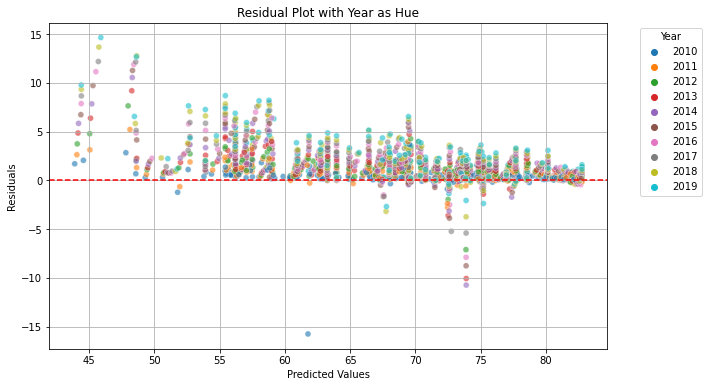

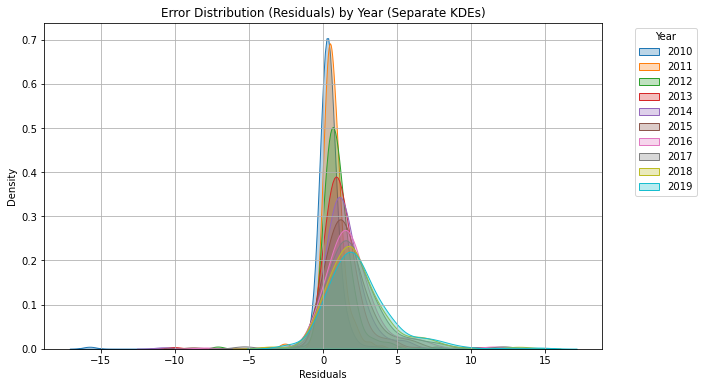

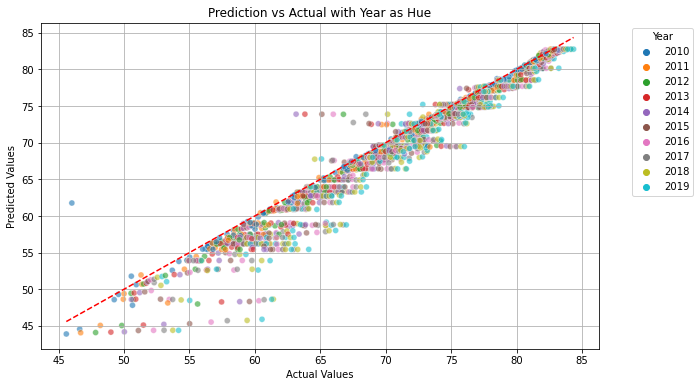

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Initialize lists to collect all actual, predicted values, and years across countries
all_actual_values = []
all_predicted_values = []
all_years = []

for country, predictions in country_recursive_predictions_rf.items():
    # Get predictions and corresponding years
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df[(selected_df['Country Name'] == country) & (selected_df['Year'].isin(predicted_years))]
    actual_values = actual_data['Life expectancy at birth, total (years)'].values
    years = actual_data['Year'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]
        years_clean = years[valid_indices]

        # Append clean values from 2010 onward to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)
        all_years.extend(years_clean)

# Create a DataFrame for easier plotting with hue
plot_data = pd.DataFrame({
    'Actual': all_actual_values,
    'Predicted': all_predicted_values,
    'Residuals': np.array(all_actual_values) - np.array(all_predicted_values),
    'Year': all_years
})

# 1. Residual Plot with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="Predicted", y="Residuals", hue="Year", palette="tab10", alpha=0.6)  # Using a discrete palette
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot with Year as Hue")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend for clarity
plt.show()

# 2. Error Distribution Plot with Year as Hue (using Kernel Density Estimate)
plt.figure(figsize=(10, 6))
for year in plot_data['Year'].unique():
    sns.kdeplot(data=plot_data[plot_data['Year'] == year], x="Residuals", label=str(year), fill=True, alpha=0.3)
plt.xlabel("Residuals")
plt.title("Error Distribution (Residuals) by Year (Separate KDEs)")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Prediction vs. Actual Plot with Year as Hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x="Actual", y="Predicted", hue="Year", palette="tab10", alpha=0.6)  # Using a discrete palette
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()], 'r--')  # Line of perfect prediction
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual with Year as Hue")
plt.grid(True)
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)  # Adjust legend for better readability
plt.show()

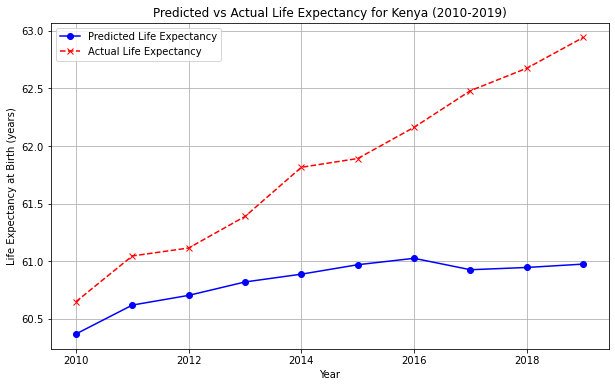

In [21]:
import matplotlib.pyplot as plt

# Function to plot predictions vs actual values for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extracting actual values for the specified country and prediction years (2010 onward)
    actual_data = test_df[(test_df['Country Name'] == country_name) & (test_df['Year'].isin(predicted_years))]
    actual_years = actual_data['Year'].values
    actual_values = actual_data['Life expectancy at birth, total (years)'].values

    # Plotting predictions vs actual values from 2010 onward
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_years, predicted_values, label='Predicted Life Expectancy', color='blue', marker='o')
    plt.plot(actual_years, actual_values, label='Actual Life Expectancy', color='red', linestyle='--', marker='x')
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (years)")
    plt.title(f"Predicted vs Actual Life Expectancy for {country_name} (2010-2019)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Redefining test_df based on the years 2010-2019 from selected_df
test_df = selected_df[(selected_df['Year'] >= 2010) & (selected_df['Year'] <= 2019)].dropna(subset=['Life expectancy at birth, total (years)'])

# Rerun the plotting function for Kenya as an example
plot_country_predictions_vs_actual("Kenya")

## Forecasting

In [22]:
import logging
from sklearn.ensemble import RandomForestRegressor

# Define year variables for training and prediction
TRAIN_START_YEAR = 2000
TRAIN_END_YEAR = 2019
PREDICTION_START_YEAR = 2019
PREDICTION_END_YEAR = 2030

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df[(selected_df['Year'] >= TRAIN_START_YEAR) & (selected_df['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Life expectancy at birth, total (years)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values
y_train = train_df['Life expectancy at birth, total (years)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Life expectancy at birth, total (years)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"LE Moving_Avg_2Y={country_data['LE Moving_Avg_2Y']}, "
                    f"LE Moving_Avg_3Y={country_data['LE Moving_Avg_3Y']}, "
                    f"LE Moving_Avg_5Y={country_data['LE Moving_Avg_5Y']}, "
                    f"LE Moving_Avg_10Y={country_data['LE Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Life expectancy at birth, total (years)'] = predicted_value
        country_data['LE Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['LE Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['LE Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-11 16:54:29,809 - INFO - Model trained on all countries' data (2000-2019). Starting recursive forecasting.
2024-11-11 16:54:29,824 - INFO - Processing country: Afghanistan
2024-11-11 16:54:29,824 - INFO - Prediction inputs for Afghanistan in 2019: Year=2019, LE Moving_Avg_2Y=63.323, LE Moving_Avg_3Y=63.220666666666666, LE Moving_Avg_5Y=63.0914, LE Moving_Avg_10Y=62.4612
2024-11-11 16:54:29,824 - INFO - Predicted value for Afghanistan in 2019: 63.51712999999991
2024-11-11 16:54:29,824 - INFO - Prediction inputs for Afghanistan in 2020: Year=2020, LE Moving_Avg_2Y=63.51712999999991, LE Moving_Avg_3Y=63.220666666666666, LE Moving_Avg_5Y=63.51712999999991, LE Moving_Avg_10Y=63.51712999999991
2024-11-11 16:54:29,824 - INFO - Predicted value for Afghanistan in 2020: 63.328059999999994
2024-11-11 16:54:29,824 - INFO - Prediction inputs for Afghanistan in 2021: Year=2021, LE Moving_Avg_2Y=63.42259499999995, LE Moving_Avg_3Y=63.220666666666666, LE Moving_Avg_5Y=63.36587399999998, LE Mov

2024-11-11 16:54:29,981 - INFO - Prediction inputs for Algeria in 2020: Year=2020, LE Moving_Avg_2Y=76.44983707317078, LE Moving_Avg_3Y=76.09433333333334, LE Moving_Avg_5Y=76.44983707317078, LE Moving_Avg_10Y=76.44983707317078
2024-11-11 16:54:29,981 - INFO - Predicted value for Algeria in 2020: 76.53679829268293
2024-11-11 16:54:29,981 - INFO - Prediction inputs for Algeria in 2021: Year=2021, LE Moving_Avg_2Y=76.49331768292686, LE Moving_Avg_3Y=76.09433333333334, LE Moving_Avg_5Y=76.5194060487805, LE Moving_Avg_10Y=76.52810217073173
2024-11-11 16:54:29,981 - INFO - Predicted value for Algeria in 2021: 76.61578170731705
2024-11-11 16:54:29,981 - INFO - Prediction inputs for Algeria in 2022: Year=2022, LE Moving_Avg_2Y=76.57629, LE Moving_Avg_3Y=76.09433333333334, LE Moving_Avg_5Y=76.56679609756097, LE Moving_Avg_10Y=76.59128890243902
2024-11-11 16:54:29,997 - INFO - Predicted value for Algeria in 2022: 76.68670926829263
2024-11-11 16:54:29,997 - INFO - Prediction inputs for Algeria in

2024-11-11 16:54:30,155 - INFO - Predicted value for Antigua and Barbuda in 2022: 78.70872121951219
2024-11-11 16:54:30,155 - INFO - Prediction inputs for Antigua and Barbuda in 2023: Year=2023, LE Moving_Avg_2Y=78.70213597560975, LE Moving_Avg_3Y=78.49, LE Moving_Avg_5Y=78.69518360975607, LE Moving_Avg_10Y=78.70195241463414
2024-11-11 16:54:30,155 - INFO - Predicted value for Antigua and Barbuda in 2023: 78.70632926829265
2024-11-11 16:54:30,155 - INFO - Prediction inputs for Antigua and Barbuda in 2024: Year=2024, LE Moving_Avg_2Y=78.70752524390241, LE Moving_Avg_3Y=78.49, LE Moving_Avg_5Y=78.69470521951219, LE Moving_Avg_10Y=78.7005172439024
2024-11-11 16:54:30,171 - INFO - Predicted value for Antigua and Barbuda in 2024: 78.76280999999996
2024-11-11 16:54:30,171 - INFO - Prediction inputs for Antigua and Barbuda in 2025: Year=2025, LE Moving_Avg_2Y=78.73456963414631, LE Moving_Avg_3Y=78.49, LE Moving_Avg_5Y=78.71284687804875, LE Moving_Avg_10Y=78.72875760975606
2024-11-11 16:54:30,

2024-11-11 16:54:30,328 - INFO - Prediction inputs for Armenia in 2024: Year=2024, LE Moving_Avg_2Y=75.69394829268293, LE Moving_Avg_3Y=75.13633333333333, LE Moving_Avg_5Y=75.54112785365857, LE Moving_Avg_10Y=75.63402758536587
2024-11-11 16:54:30,328 - INFO - Predicted value for Armenia in 2024: 75.86162512195119
2024-11-11 16:54:30,328 - INFO - Prediction inputs for Armenia in 2025: Year=2025, LE Moving_Avg_2Y=75.79427621951217, LE Moving_Avg_3Y=75.13633333333333, LE Moving_Avg_5Y=75.63149536585367, LE Moving_Avg_10Y=75.70137648780488
2024-11-11 16:54:30,343 - INFO - Predicted value for Armenia in 2025: 75.92268634146339
2024-11-11 16:54:30,343 - INFO - Prediction inputs for Armenia in 2026: Year=2026, LE Moving_Avg_2Y=75.89215573170729, LE Moving_Avg_3Y=75.13633333333333, LE Moving_Avg_5Y=75.72593975609757, LE Moving_Avg_10Y=75.72580097560976
2024-11-11 16:54:30,343 - INFO - Predicted value for Armenia in 2026: 75.92959731707316
2024-11-11 16:54:30,343 - INFO - Prediction inputs for 

2024-11-11 16:54:30,502 - INFO - Predicted value for Austria in 2025: 82.08939024390241
2024-11-11 16:54:30,502 - INFO - Prediction inputs for Austria in 2026: Year=2026, LE Moving_Avg_2Y=82.11348536585365, LE Moving_Avg_3Y=81.7439024390244, LE Moving_Avg_5Y=82.07616585365855, LE Moving_Avg_10Y=82.04322512195122
2024-11-11 16:54:30,502 - INFO - Predicted value for Austria in 2026: 82.07638536585364
2024-11-11 16:54:30,502 - INFO - Prediction inputs for Austria in 2027: Year=2027, LE Moving_Avg_2Y=82.08288780487803, LE Moving_Avg_3Y=81.7439024390244, LE Moving_Avg_5Y=82.08818829268293, LE Moving_Avg_10Y=82.03932365853659
2024-11-11 16:54:30,512 - INFO - Predicted value for Austria in 2027: 82.0885317073171
2024-11-11 16:54:30,512 - INFO - Prediction inputs for Austria in 2028: Year=2028, LE Moving_Avg_2Y=82.08245853658536, LE Moving_Avg_3Y=81.7439024390244, LE Moving_Avg_5Y=82.09877658536585, LE Moving_Avg_10Y=82.04175292682928
2024-11-11 16:54:30,518 - INFO - Predicted value for Austri

2024-11-11 16:54:30,672 - INFO - Prediction inputs for Bahamas, The in 2027: Year=2027, LE Moving_Avg_2Y=71.64716390243905, LE Moving_Avg_3Y=72.88099999999999, LE Moving_Avg_5Y=71.63615853658538, LE Moving_Avg_10Y=71.62885592682929
2024-11-11 16:54:30,685 - INFO - Predicted value for Bahamas, The in 2027: 71.60553731707317
2024-11-11 16:54:30,685 - INFO - Prediction inputs for Bahamas, The in 2028: Year=2028, LE Moving_Avg_2Y=71.60475585365856, LE Moving_Avg_3Y=72.88099999999999, LE Moving_Avg_5Y=71.61946600000002, LE Moving_Avg_10Y=71.62916851219514
2024-11-11 16:54:30,688 - INFO - Predicted value for Bahamas, The in 2028: 71.65793585365856
2024-11-11 16:54:30,688 - INFO - Prediction inputs for Bahamas, The in 2029: Year=2029, LE Moving_Avg_2Y=71.63173658536587, LE Moving_Avg_3Y=72.88099999999999, LE Moving_Avg_5Y=71.63417360975612, LE Moving_Avg_10Y=71.63440836585366
2024-11-11 16:54:30,688 - INFO - Predicted value for Bahamas, The in 2029: 71.60820341463416
2024-11-11 16:54:30,688 -

2024-11-11 16:54:30,860 - INFO - Predicted value for Bangladesh in 2029: 72.92568170731711
2024-11-11 16:54:30,860 - INFO - Prediction inputs for Bangladesh in 2030: Year=2030, LE Moving_Avg_2Y=72.92568170731711, LE Moving_Avg_3Y=72.387, LE Moving_Avg_5Y=72.92709921951221, LE Moving_Avg_10Y=72.92568119512198
2024-11-11 16:54:30,860 - INFO - Predicted value for Bangladesh in 2030: 72.93198609756098
2024-11-11 16:54:30,860 - INFO - Processing country: Barbados
2024-11-11 16:54:30,860 - INFO - Prediction inputs for Barbados in 2019: Year=2019, LE Moving_Avg_2Y=77.162, LE Moving_Avg_3Y=77.08666666666666, LE Moving_Avg_5Y=76.94500000000001, LE Moving_Avg_10Y=76.52040000000001
2024-11-11 16:54:30,876 - INFO - Predicted value for Barbados in 2019: 77.24739560975596
2024-11-11 16:54:30,876 - INFO - Prediction inputs for Barbados in 2020: Year=2020, LE Moving_Avg_2Y=77.24739560975596, LE Moving_Avg_3Y=77.08666666666666, LE Moving_Avg_5Y=77.24739560975596, LE Moving_Avg_10Y=77.24739560975594
202

2024-11-11 16:54:31,034 - INFO - Predicted value for Belgium in 2019: 81.94049268292682
2024-11-11 16:54:31,034 - INFO - Prediction inputs for Belgium in 2020: Year=2020, LE Moving_Avg_2Y=81.94049268292682, LE Moving_Avg_3Y=81.69430894308944, LE Moving_Avg_5Y=81.94049268292682, LE Moving_Avg_10Y=81.9404926829268
2024-11-11 16:54:31,050 - INFO - Predicted value for Belgium in 2020: 82.04992926829271
2024-11-11 16:54:31,050 - INFO - Prediction inputs for Belgium in 2021: Year=2021, LE Moving_Avg_2Y=81.99521097560977, LE Moving_Avg_3Y=81.69430894308944, LE Moving_Avg_5Y=82.02804195121954, LE Moving_Avg_10Y=82.03898560975612
2024-11-11 16:54:31,050 - INFO - Predicted value for Belgium in 2021: 82.14626341463418
2024-11-11 16:54:31,050 - INFO - Prediction inputs for Belgium in 2022: Year=2022, LE Moving_Avg_2Y=82.09809634146345, LE Moving_Avg_3Y=81.69430894308944, LE Moving_Avg_5Y=82.08584243902442, LE Moving_Avg_10Y=82.1160529268293
2024-11-11 16:54:31,050 - INFO - Predicted value for Belg

2024-11-11 16:54:31,207 - INFO - Predicted value for Benin in 2022: 60.82753999999997
2024-11-11 16:54:31,207 - INFO - Prediction inputs for Benin in 2023: Year=2023, LE Moving_Avg_2Y=60.79134499999998, LE Moving_Avg_3Y=60.150000000000006, LE Moving_Avg_5Y=60.70138599999998, LE Moving_Avg_10Y=60.76446299999998
2024-11-11 16:54:31,207 - INFO - Predicted value for Benin in 2023: 60.91298
2024-11-11 16:54:31,207 - INFO - Prediction inputs for Benin in 2024: Year=2024, LE Moving_Avg_2Y=60.87025999999999, LE Moving_Avg_3Y=60.150000000000006, LE Moving_Avg_5Y=60.71847399999998, LE Moving_Avg_10Y=60.81572699999998
2024-11-11 16:54:31,222 - INFO - Predicted value for Benin in 2024: 60.99015
2024-11-11 16:54:31,222 - INFO - Prediction inputs for Benin in 2025: Year=2025, LE Moving_Avg_2Y=60.951565, LE Moving_Avg_3Y=60.150000000000006, LE Moving_Avg_5Y=60.82276999999999, LE Moving_Avg_10Y=60.85431199999998
2024-11-11 16:54:31,222 - INFO - Predicted value for Benin in 2025: 61.02391999999999
2024

2024-11-11 16:54:31,387 - INFO - Prediction inputs for Bolivia in 2025: Year=2025, LE Moving_Avg_2Y=67.81030853658541, LE Moving_Avg_3Y=67.76333333333334, LE Moving_Avg_5Y=67.80987858536591, LE Moving_Avg_10Y=67.81086351219517
2024-11-11 16:54:31,392 - INFO - Predicted value for Bolivia in 2025: 67.81172804878052
2024-11-11 16:54:31,393 - INFO - Prediction inputs for Bolivia in 2026: Year=2026, LE Moving_Avg_2Y=67.81101829268297, LE Moving_Avg_3Y=67.76333333333334, LE Moving_Avg_5Y=67.81120712195127, LE Moving_Avg_10Y=67.81143131707321
2024-11-11 16:54:31,399 - INFO - Predicted value for Bolivia in 2026: 67.81030853658541
2024-11-11 16:54:31,400 - INFO - Prediction inputs for Bolivia in 2027: Year=2027, LE Moving_Avg_2Y=67.81101829268297, LE Moving_Avg_3Y=67.76333333333334, LE Moving_Avg_5Y=67.81120712195126, LE Moving_Avg_10Y=67.81100546341467
2024-11-11 16:54:31,405 - INFO - Predicted value for Bolivia in 2027: 67.81030853658541
2024-11-11 16:54:31,406 - INFO - Prediction inputs for 

2024-11-11 16:54:31,563 - INFO - Predicted value for Botswana in 2025: 65.63255707317069
2024-11-11 16:54:31,564 - INFO - Prediction inputs for Botswana in 2026: Year=2026, LE Moving_Avg_2Y=65.60602463414628, LE Moving_Avg_3Y=65.87966666666667, LE Moving_Avg_5Y=65.56571399999996, LE Moving_Avg_10Y=65.57476656097558
2024-11-11 16:54:31,570 - INFO - Predicted value for Botswana in 2026: 65.6766170731707
2024-11-11 16:54:31,570 - INFO - Prediction inputs for Botswana in 2027: Year=2027, LE Moving_Avg_2Y=65.65458707317069, LE Moving_Avg_3Y=65.87966666666667, LE Moving_Avg_5Y=65.5965874146341, LE Moving_Avg_10Y=65.58798456097557
2024-11-11 16:54:31,573 - INFO - Predicted value for Botswana in 2027: 65.75714926829268
2024-11-11 16:54:31,573 - INFO - Prediction inputs for Botswana in 2028: Year=2028, LE Moving_Avg_2Y=65.71688317073169, LE Moving_Avg_3Y=65.87966666666667, LE Moving_Avg_5Y=65.63952809756094, LE Moving_Avg_10Y=65.60409099999995
2024-11-11 16:54:31,573 - INFO - Predicted value fo

2024-11-11 16:54:31,730 - INFO - Predicted value for Brunei Darussalam in 2027: 74.7465965853658
2024-11-11 16:54:31,730 - INFO - Prediction inputs for Brunei Darussalam in 2028: Year=2028, LE Moving_Avg_2Y=74.7465965853658, LE Moving_Avg_3Y=74.72733333333332, LE Moving_Avg_5Y=74.7465965853658, LE Moving_Avg_10Y=74.74623317073164
2024-11-11 16:54:31,745 - INFO - Predicted value for Brunei Darussalam in 2028: 74.7465965853658
2024-11-11 16:54:31,745 - INFO - Prediction inputs for Brunei Darussalam in 2029: Year=2029, LE Moving_Avg_2Y=74.7465965853658, LE Moving_Avg_3Y=74.72733333333332, LE Moving_Avg_5Y=74.7465965853658, LE Moving_Avg_10Y=74.74623317073164
2024-11-11 16:54:31,745 - INFO - Predicted value for Brunei Darussalam in 2029: 74.7465965853658
2024-11-11 16:54:31,745 - INFO - Prediction inputs for Brunei Darussalam in 2030: Year=2030, LE Moving_Avg_2Y=74.7465965853658, LE Moving_Avg_3Y=74.72733333333332, LE Moving_Avg_5Y=74.7465965853658, LE Moving_Avg_10Y=74.74657958536578
2024

2024-11-11 16:54:31,925 - INFO - Predicted value for Burkina Faso in 2029: 61.01841
2024-11-11 16:54:31,925 - INFO - Prediction inputs for Burkina Faso in 2030: Year=2030, LE Moving_Avg_2Y=61.01676500000001, LE Moving_Avg_3Y=59.874, LE Moving_Avg_5Y=60.969056, LE Moving_Avg_10Y=60.714598999999986
2024-11-11 16:54:31,925 - INFO - Predicted value for Burkina Faso in 2030: 61.026379999999996
2024-11-11 16:54:31,925 - INFO - Processing country: Burundi
2024-11-11 16:54:31,925 - INFO - Prediction inputs for Burundi in 2019: Year=2019, LE Moving_Avg_2Y=62.0195, LE Moving_Avg_3Y=61.864, LE Moving_Avg_5Y=61.32039999999999, LE Moving_Avg_10Y=59.9048
2024-11-11 16:54:31,944 - INFO - Predicted value for Burundi in 2019: 62.284929999999946
2024-11-11 16:54:31,944 - INFO - Prediction inputs for Burundi in 2020: Year=2020, LE Moving_Avg_2Y=62.284929999999946, LE Moving_Avg_3Y=61.864, LE Moving_Avg_5Y=62.28492999999994, LE Moving_Avg_10Y=62.28492999999993
2024-11-11 16:54:31,950 - INFO - Predicted va

2024-11-11 16:54:32,086 - INFO - Prediction inputs for Cambodia in 2020: Year=2020, LE Moving_Avg_2Y=70.74704878048782, LE Moving_Avg_3Y=70.58933333333334, LE Moving_Avg_5Y=70.74704878048782, LE Moving_Avg_10Y=70.74704878048782
2024-11-11 16:54:32,086 - INFO - Predicted value for Cambodia in 2020: 70.79457999999997
2024-11-11 16:54:32,102 - INFO - Prediction inputs for Cambodia in 2021: Year=2021, LE Moving_Avg_2Y=70.77081439024388, LE Moving_Avg_3Y=70.58933333333334, LE Moving_Avg_5Y=70.78507375609755, LE Moving_Avg_10Y=70.78982687804877
2024-11-11 16:54:32,102 - INFO - Predicted value for Cambodia in 2021: 70.81090219512194
2024-11-11 16:54:32,102 - INFO - Prediction inputs for Cambodia in 2022: Year=2022, LE Moving_Avg_2Y=70.80274109756095, LE Moving_Avg_3Y=70.58933333333334, LE Moving_Avg_5Y=70.7948670731707, LE Moving_Avg_10Y=70.80288463414632
2024-11-11 16:54:32,102 - INFO - Predicted value for Cambodia in 2022: 70.8273921951219
2024-11-11 16:54:32,102 - INFO - Prediction inputs 

2024-11-11 16:54:32,266 - INFO - Predicted value for Canada in 2021: 82.2460048780488
2024-11-11 16:54:32,266 - INFO - Prediction inputs for Canada in 2022: Year=2022, LE Moving_Avg_2Y=82.23674634146343, LE Moving_Avg_3Y=81.96853658536587, LE Moving_Avg_5Y=82.22549902439027, LE Moving_Avg_10Y=82.23575195121953
2024-11-11 16:54:32,284 - INFO - Predicted value for Canada in 2022: 82.26745853658535
2024-11-11 16:54:32,285 - INFO - Prediction inputs for Canada in 2023: Year=2023, LE Moving_Avg_2Y=82.25673170731707, LE Moving_Avg_3Y=81.96853658536587, LE Moving_Avg_5Y=82.2340804878049, LE Moving_Avg_10Y=82.25076951219512
2024-11-11 16:54:32,291 - INFO - Predicted value for Canada in 2023: 82.28614634146338
2024-11-11 16:54:32,291 - INFO - Prediction inputs for Canada in 2024: Year=2024, LE Moving_Avg_2Y=82.27680243902437, LE Moving_Avg_3Y=81.96853658536587, LE Moving_Avg_5Y=82.23781804878051, LE Moving_Avg_10Y=82.26198219512193
2024-11-11 16:54:32,299 - INFO - Predicted value for Canada in 

2024-11-11 16:54:32,432 - INFO - Predicted value for Chad in 2022: 53.817189999999954
2024-11-11 16:54:32,432 - INFO - Prediction inputs for Chad in 2023: Year=2023, LE Moving_Avg_2Y=53.710669999999965, LE Moving_Avg_3Y=52.797333333333334, LE Moving_Avg_5Y=53.613307999999975, LE Moving_Avg_10Y=53.71524899999997
2024-11-11 16:54:32,432 - INFO - Predicted value for Chad in 2023: 54.08664999999996
2024-11-11 16:54:32,447 - INFO - Prediction inputs for Chad in 2024: Year=2024, LE Moving_Avg_2Y=53.95191999999996, LE Moving_Avg_3Y=52.797333333333334, LE Moving_Avg_5Y=53.66719999999998, LE Moving_Avg_10Y=53.87692499999997
2024-11-11 16:54:32,450 - INFO - Predicted value for Chad in 2024: 54.30150999999997
2024-11-11 16:54:32,450 - INFO - Prediction inputs for Chad in 2025: Year=2025, LE Moving_Avg_2Y=54.19407999999997, LE Moving_Avg_3Y=52.797333333333334, LE Moving_Avg_5Y=53.87024799999997, LE Moving_Avg_10Y=53.98435499999998
2024-11-11 16:54:32,450 - INFO - Predicted value for Chad in 2025: 

2024-11-11 16:54:32,610 - INFO - Prediction inputs for China in 2025: Year=2025, LE Moving_Avg_2Y=77.79813609756096, LE Moving_Avg_3Y=77.65333333333335, LE Moving_Avg_5Y=77.7882088292683, LE Moving_Avg_10Y=77.80867697560976
2024-11-11 16:54:32,615 - INFO - Predicted value for China in 2025: 77.80618804878048
2024-11-11 16:54:32,616 - INFO - Prediction inputs for China in 2026: Year=2026, LE Moving_Avg_2Y=77.80200426829268, LE Moving_Avg_3Y=77.65333333333335, LE Moving_Avg_5Y=77.804414, LE Moving_Avg_10Y=77.812024
2024-11-11 16:54:32,622 - INFO - Predicted value for China in 2026: 77.8010563414634
2024-11-11 16:54:32,623 - INFO - Prediction inputs for China in 2027: Year=2027, LE Moving_Avg_2Y=77.80362219512193, LE Moving_Avg_3Y=77.65333333333335, LE Moving_Avg_5Y=77.80195707317071, LE Moving_Avg_10Y=77.81048448780487
2024-11-11 16:54:32,623 - INFO - Predicted value for China in 2027: 77.8005375609756
2024-11-11 16:54:32,623 - INFO - Prediction inputs for China in 2028: Year=2028, LE Mo

2024-11-11 16:54:32,789 - INFO - Predicted value for Comoros in 2027: 65.34346999999997
2024-11-11 16:54:32,790 - INFO - Prediction inputs for Comoros in 2028: Year=2028, LE Moving_Avg_2Y=65.218805, LE Moving_Avg_3Y=63.86833333333334, LE Moving_Avg_5Y=64.844632, LE Moving_Avg_10Y=64.62715000000003
2024-11-11 16:54:32,795 - INFO - Predicted value for Comoros in 2028: 65.95489780487803
2024-11-11 16:54:32,796 - INFO - Prediction inputs for Comoros in 2029: Year=2029, LE Moving_Avg_2Y=65.649183902439, LE Moving_Avg_3Y=63.86833333333334, LE Moving_Avg_5Y=65.1586435609756, LE Moving_Avg_10Y=64.68829278048783
2024-11-11 16:54:32,801 - INFO - Predicted value for Comoros in 2029: 66.43531999999996
2024-11-11 16:54:32,802 - INFO - Prediction inputs for Comoros in 2030: Year=2030, LE Moving_Avg_2Y=66.19510890243899, LE Moving_Avg_3Y=63.86833333333334, LE Moving_Avg_5Y=65.5358735609756, LE Moving_Avg_10Y=64.92463378048781
2024-11-11 16:54:32,808 - INFO - Predicted value for Comoros in 2030: 66.68

2024-11-11 16:54:32,952 - INFO - Predicted value for Congo, Rep. in 2029: 63.158419999999985
2024-11-11 16:54:32,952 - INFO - Prediction inputs for Congo, Rep. in 2030: Year=2030, LE Moving_Avg_2Y=63.15809999999999, LE Moving_Avg_3Y=63.52, LE Moving_Avg_5Y=63.157399999999996, LE Moving_Avg_10Y=63.15867099999999
2024-11-11 16:54:32,967 - INFO - Predicted value for Congo, Rep. in 2030: 63.158419999999985
2024-11-11 16:54:32,967 - INFO - Processing country: Costa Rica
2024-11-11 16:54:32,967 - INFO - Prediction inputs for Costa Rica in 2019: Year=2019, LE Moving_Avg_2Y=79.4555, LE Moving_Avg_3Y=79.42933333333333, LE Moving_Avg_5Y=79.36659999999999, LE Moving_Avg_10Y=79.2311
2024-11-11 16:54:32,967 - INFO - Predicted value for Costa Rica in 2019: 79.44290512195114
2024-11-11 16:54:32,967 - INFO - Prediction inputs for Costa Rica in 2020: Year=2020, LE Moving_Avg_2Y=79.44290512195114, LE Moving_Avg_3Y=79.42933333333333, LE Moving_Avg_5Y=79.44290512195114, LE Moving_Avg_10Y=79.44290512195116

2024-11-11 16:54:33,124 - INFO - Processing country: Croatia
2024-11-11 16:54:33,124 - INFO - Prediction inputs for Croatia in 2019: Year=2019, LE Moving_Avg_2Y=78.24756097560979, LE Moving_Avg_3Y=78.10731707317076, LE Moving_Avg_5Y=77.92390243902442, LE Moving_Avg_10Y=77.44000000000001
2024-11-11 16:54:33,140 - INFO - Predicted value for Croatia in 2019: 78.4021292682926
2024-11-11 16:54:33,140 - INFO - Prediction inputs for Croatia in 2020: Year=2020, LE Moving_Avg_2Y=78.4021292682926, LE Moving_Avg_3Y=78.10731707317076, LE Moving_Avg_5Y=78.4021292682926, LE Moving_Avg_10Y=78.4021292682926
2024-11-11 16:54:33,155 - INFO - Predicted value for Croatia in 2020: 78.5433909756098
2024-11-11 16:54:33,155 - INFO - Prediction inputs for Croatia in 2021: Year=2021, LE Moving_Avg_2Y=78.4727601219512, LE Moving_Avg_3Y=78.10731707317076, LE Moving_Avg_5Y=78.51513863414635, LE Moving_Avg_10Y=78.52926480487807
2024-11-11 16:54:33,171 - INFO - Predicted value for Croatia in 2021: 78.57249121951224


2024-11-11 16:54:33,319 - INFO - Prediction inputs for Cyprus in 2021: Year=2021, LE Moving_Avg_2Y=81.42073841463406, LE Moving_Avg_3Y=81.36900000000001, LE Moving_Avg_5Y=81.4344764390243, LE Moving_Avg_10Y=81.43905578048773
2024-11-11 16:54:33,319 - INFO - Predicted value for Cyprus in 2021: 81.4892724390243
2024-11-11 16:54:33,319 - INFO - Prediction inputs for Cyprus in 2022: Year=2022, LE Moving_Avg_2Y=81.46645378048771, LE Moving_Avg_3Y=81.36900000000001, LE Moving_Avg_5Y=81.46185882926821, LE Moving_Avg_10Y=81.47556563414625
2024-11-11 16:54:33,335 - INFO - Predicted value for Cyprus in 2022: 81.51090121951215
2024-11-11 16:54:33,335 - INFO - Prediction inputs for Cyprus in 2023: Year=2023, LE Moving_Avg_2Y=81.50008682926823, LE Moving_Avg_3Y=81.36900000000001, LE Moving_Avg_5Y=81.47051034146335, LE Moving_Avg_10Y=81.49070578048774
2024-11-11 16:54:33,335 - INFO - Predicted value for Cyprus in 2023: 81.65957560975609
2024-11-11 16:54:33,335 - INFO - Prediction inputs for Cyprus i

2024-11-11 16:54:33,488 - INFO - Prediction inputs for Denmark in 2023: Year=2023, LE Moving_Avg_2Y=81.35932780487799, LE Moving_Avg_3Y=81.16910569105693, LE Moving_Avg_5Y=81.36308439024387, LE Moving_Avg_10Y=81.36097207317069
2024-11-11 16:54:33,503 - INFO - Predicted value for Denmark in 2023: 81.3588597560975
2024-11-11 16:54:33,503 - INFO - Prediction inputs for Denmark in 2024: Year=2024, LE Moving_Avg_2Y=81.3588597560975, LE Moving_Avg_3Y=81.16910569105693, LE Moving_Avg_5Y=81.36308439024387, LE Moving_Avg_10Y=81.36097207317069
2024-11-11 16:54:33,503 - INFO - Predicted value for Denmark in 2024: 81.35151829268288
2024-11-11 16:54:33,503 - INFO - Prediction inputs for Denmark in 2025: Year=2025, LE Moving_Avg_2Y=81.3551890243902, LE Moving_Avg_3Y=81.16910569105693, LE Moving_Avg_5Y=81.35776590243897, LE Moving_Avg_10Y=81.35730134146336
2024-11-11 16:54:33,519 - INFO - Predicted value for Denmark in 2025: 81.34614317073165
2024-11-11 16:54:33,519 - INFO - Prediction inputs for Den

2024-11-11 16:54:33,675 - INFO - Predicted value for Dominica in 2025: 74.25357512195117
2024-11-11 16:54:33,675 - INFO - Prediction inputs for Dominica in 2026: Year=2026, LE Moving_Avg_2Y=74.21171390243899, LE Moving_Avg_3Y=71.558, LE Moving_Avg_5Y=74.06478819512196, LE Moving_Avg_10Y=74.035485097561
2024-11-11 16:54:33,690 - INFO - Predicted value for Dominica in 2026: 74.28613243902436
2024-11-11 16:54:33,690 - INFO - Prediction inputs for Dominica in 2027: Year=2027, LE Moving_Avg_2Y=74.26985378048776, LE Moving_Avg_3Y=71.558, LE Moving_Avg_5Y=74.15477399999999, LE Moving_Avg_10Y=74.04525229268295
2024-11-11 16:54:33,696 - INFO - Predicted value for Dominica in 2027: 74.3017775609756
2024-11-11 16:54:33,696 - INFO - Prediction inputs for Dominica in 2028: Year=2028, LE Moving_Avg_2Y=74.29395499999998, LE Moving_Avg_3Y=71.558, LE Moving_Avg_5Y=74.22184619512194, LE Moving_Avg_10Y=74.04838131707318
2024-11-11 16:54:33,702 - INFO - Predicted value for Dominica in 2028: 74.36180268292

2024-11-11 16:54:33,845 - INFO - Predicted value for Ecuador in 2027: 77.52440634146338
2024-11-11 16:54:33,846 - INFO - Prediction inputs for Ecuador in 2028: Year=2028, LE Moving_Avg_2Y=77.52497743902435, LE Moving_Avg_3Y=77.121, LE Moving_Avg_5Y=77.5247694634146, LE Moving_Avg_10Y=77.4748725609756
2024-11-11 16:54:33,851 - INFO - Predicted value for Ecuador in 2028: 77.52307634146338
2024-11-11 16:54:33,852 - INFO - Prediction inputs for Ecuador in 2029: Year=2029, LE Moving_Avg_2Y=77.52374134146338, LE Moving_Avg_3Y=77.121, LE Moving_Avg_5Y=77.52378853658533, LE Moving_Avg_10Y=77.47473956097559
2024-11-11 16:54:33,860 - INFO - Predicted value for Ecuador in 2029: 77.52440634146338
2024-11-11 16:54:33,861 - INFO - Prediction inputs for Ecuador in 2030: Year=2030, LE Moving_Avg_2Y=77.52374134146338, LE Moving_Avg_3Y=77.121, LE Moving_Avg_5Y=77.52423521951215, LE Moving_Avg_10Y=77.49848826829268
2024-11-11 16:54:33,866 - INFO - Predicted value for Ecuador in 2030: 77.52440634146338
20

2024-11-11 16:54:34,020 - INFO - Predicted value for El Salvador in 2028: 72.27778634146347
2024-11-11 16:54:34,020 - INFO - Prediction inputs for El Salvador in 2029: Year=2029, LE Moving_Avg_2Y=72.24623634146346, LE Moving_Avg_3Y=72.47500000000001, LE Moving_Avg_5Y=72.25023595121955, LE Moving_Avg_10Y=72.32732853658543
2024-11-11 16:54:34,020 - INFO - Predicted value for El Salvador in 2029: 72.27832926829272
2024-11-11 16:54:34,020 - INFO - Prediction inputs for El Salvador in 2030: Year=2030, LE Moving_Avg_2Y=72.2780578048781, LE Moving_Avg_3Y=72.47500000000001, LE Moving_Avg_5Y=72.2609705365854, LE Moving_Avg_10Y=72.29916114634152
2024-11-11 16:54:34,036 - INFO - Predicted value for El Salvador in 2030: 72.21981780487809
2024-11-11 16:54:34,036 - INFO - Processing country: Equatorial Guinea
2024-11-11 16:54:34,036 - INFO - Prediction inputs for Equatorial Guinea in 2019: Year=2019, LE Moving_Avg_2Y=61.417500000000004, LE Moving_Avg_3Y=61.21866666666667, LE Moving_Avg_5Y=60.8476, L

2024-11-11 16:54:34,193 - INFO - Prediction inputs for Eritrea in 2030: Year=2030, LE Moving_Avg_2Y=68.07596036585366, LE Moving_Avg_3Y=66.98133333333334, LE Moving_Avg_5Y=67.92931087804882, LE Moving_Avg_10Y=67.7309494390244
2024-11-11 16:54:34,199 - INFO - Predicted value for Eritrea in 2030: 68.42135317073169
2024-11-11 16:54:34,199 - INFO - Processing country: Estonia
2024-11-11 16:54:34,201 - INFO - Prediction inputs for Estonia in 2019: Year=2019, LE Moving_Avg_2Y=78.44512195121955, LE Moving_Avg_3Y=78.3276422764228, LE Moving_Avg_5Y=78.04292682926832, LE Moving_Avg_10Y=77.23756097560977
2024-11-11 16:54:34,206 - INFO - Predicted value for Estonia in 2019: 78.63671902439019
2024-11-11 16:54:34,207 - INFO - Prediction inputs for Estonia in 2020: Year=2020, LE Moving_Avg_2Y=78.63671902439019, LE Moving_Avg_3Y=78.3276422764228, LE Moving_Avg_5Y=78.63671902439019, LE Moving_Avg_10Y=78.6367190243902
2024-11-11 16:54:34,214 - INFO - Predicted value for Estonia in 2020: 78.6644236585365

2024-11-11 16:54:34,360 - INFO - Predicted value for Ethiopia in 2019: 65.82587999999996
2024-11-11 16:54:34,361 - INFO - Prediction inputs for Ethiopia in 2020: Year=2020, LE Moving_Avg_2Y=65.82587999999996, LE Moving_Avg_3Y=65.36266666666667, LE Moving_Avg_5Y=65.82587999999996, LE Moving_Avg_10Y=65.82587999999997
2024-11-11 16:54:34,368 - INFO - Predicted value for Ethiopia in 2020: 65.89001731707313
2024-11-11 16:54:34,368 - INFO - Prediction inputs for Ethiopia in 2021: Year=2021, LE Moving_Avg_2Y=65.85794865853654, LE Moving_Avg_3Y=65.36266666666667, LE Moving_Avg_5Y=65.8771898536585, LE Moving_Avg_10Y=65.8836035853658
2024-11-11 16:54:34,373 - INFO - Predicted value for Ethiopia in 2021: 65.90682292682922
2024-11-11 16:54:34,373 - INFO - Prediction inputs for Ethiopia in 2022: Year=2022, LE Moving_Avg_2Y=65.89842012195118, LE Moving_Avg_3Y=65.36266666666667, LE Moving_Avg_5Y=65.88727321951214, LE Moving_Avg_10Y=65.8970480731707
2024-11-11 16:54:34,373 - INFO - Predicted value for

2024-11-11 16:54:34,528 - INFO - Predicted value for Finland in 2022: 82.12732195121953
2024-11-11 16:54:34,528 - INFO - Prediction inputs for Finland in 2023: Year=2023, LE Moving_Avg_2Y=82.11698658536586, LE Moving_Avg_3Y=81.7829268292683, LE Moving_Avg_5Y=82.07336780487803, LE Moving_Avg_10Y=82.10034487804879
2024-11-11 16:54:34,544 - INFO - Predicted value for Finland in 2023: 82.07141951219509
2024-11-11 16:54:34,544 - INFO - Prediction inputs for Finland in 2024: Year=2024, LE Moving_Avg_2Y=82.09937073170731, LE Moving_Avg_3Y=81.7829268292683, LE Moving_Avg_5Y=82.06218731707315, LE Moving_Avg_10Y=82.06680341463412
2024-11-11 16:54:34,544 - INFO - Predicted value for Finland in 2024: 82.04579512195124
2024-11-11 16:54:34,544 - INFO - Prediction inputs for Finland in 2025: Year=2025, LE Moving_Avg_2Y=82.05860731707317, LE Moving_Avg_3Y=81.7829268292683, LE Moving_Avg_5Y=82.07578292682928, LE Moving_Avg_10Y=82.0539912195122
2024-11-11 16:54:34,560 - INFO - Predicted value for Finlan

2024-11-11 16:54:34,726 - INFO - Prediction inputs for Gabon in 2025: Year=2025, LE Moving_Avg_2Y=66.34535060975611, LE Moving_Avg_3Y=66.366, LE Moving_Avg_5Y=66.36881848780489, LE Moving_Avg_10Y=66.37504248780489
2024-11-11 16:54:34,732 - INFO - Predicted value for Gabon in 2025: 66.3443312195122
2024-11-11 16:54:34,732 - INFO - Prediction inputs for Gabon in 2026: Year=2026, LE Moving_Avg_2Y=66.33636341463415, LE Moving_Avg_3Y=66.366, LE Moving_Avg_5Y=66.36402473170732, LE Moving_Avg_10Y=66.38141673170733
2024-11-11 16:54:34,732 - INFO - Predicted value for Gabon in 2026: 66.3209112195122
2024-11-11 16:54:34,732 - INFO - Prediction inputs for Gabon in 2027: Year=2027, LE Moving_Avg_2Y=66.33262121951219, LE Moving_Avg_3Y=66.366, LE Moving_Avg_5Y=66.34088985365854, LE Moving_Avg_10Y=66.37439073170734
2024-11-11 16:54:34,732 - INFO - Predicted value for Gabon in 2027: 66.32625121951217
2024-11-11 16:54:34,732 - INFO - Prediction inputs for Gabon in 2028: Year=2028, LE Moving_Avg_2Y=66.3

2024-11-11 16:54:34,918 - INFO - Prediction inputs for Georgia in 2027: Year=2027, LE Moving_Avg_2Y=73.67148560975613, LE Moving_Avg_3Y=73.46033333333332, LE Moving_Avg_5Y=73.6780190243903, LE Moving_Avg_10Y=73.6478854146342
2024-11-11 16:54:34,924 - INFO - Predicted value for Georgia in 2027: 73.69182487804883
2024-11-11 16:54:34,925 - INFO - Prediction inputs for Georgia in 2028: Year=2028, LE Moving_Avg_2Y=73.68165524390248, LE Moving_Avg_3Y=73.46033333333332, LE Moving_Avg_5Y=73.68232560975613, LE Moving_Avg_10Y=73.65195326829273
2024-11-11 16:54:34,930 - INFO - Predicted value for Georgia in 2028: 73.6703817073171
2024-11-11 16:54:34,931 - INFO - Prediction inputs for Georgia in 2029: Year=2029, LE Moving_Avg_2Y=73.68110329268296, LE Moving_Avg_3Y=73.46033333333332, LE Moving_Avg_5Y=73.68250351219517, LE Moving_Avg_10Y=73.64980895121957
2024-11-11 16:54:34,936 - INFO - Predicted value for Georgia in 2029: 73.6703817073171
2024-11-11 16:54:34,937 - INFO - Prediction inputs for Geor

2024-11-11 16:54:35,092 - INFO - Prediction inputs for Ghana in 2029: Year=2029, LE Moving_Avg_2Y=65.36372182926826, LE Moving_Avg_3Y=64.29166666666667, LE Moving_Avg_5Y=65.21662019512192, LE Moving_Avg_10Y=65.07791278048776
2024-11-11 16:54:35,098 - INFO - Predicted value for Ghana in 2029: 65.57141756097563
2024-11-11 16:54:35,098 - INFO - Prediction inputs for Ghana in 2030: Year=2030, LE Moving_Avg_2Y=65.5638793902439, LE Moving_Avg_3Y=64.29166666666667, LE Moving_Avg_5Y=65.3112663414634, LE Moving_Avg_10Y=65.16261753658534
2024-11-11 16:54:35,106 - INFO - Predicted value for Ghana in 2030: 65.80873268292682
2024-11-11 16:54:35,106 - INFO - Processing country: Greece
2024-11-11 16:54:35,107 - INFO - Prediction inputs for Greece in 2019: Year=2019, LE Moving_Avg_2Y=81.71341463414635, LE Moving_Avg_3Y=81.57154471544716, LE Moving_Avg_5Y=81.4278048780488, LE Moving_Avg_10Y=81.15634146341465
2024-11-11 16:54:35,112 - INFO - Predicted value for Greece in 2019: 81.65740000000011
2024-11-

2024-11-11 16:54:35,256 - INFO - Predicted value for Guatemala in 2019: 73.08531024390237
2024-11-11 16:54:35,271 - INFO - Prediction inputs for Guatemala in 2020: Year=2020, LE Moving_Avg_2Y=73.08531024390237, LE Moving_Avg_3Y=72.802, LE Moving_Avg_5Y=73.08531024390237, LE Moving_Avg_10Y=73.08531024390236
2024-11-11 16:54:35,277 - INFO - Predicted value for Guatemala in 2020: 73.17475048780493
2024-11-11 16:54:35,277 - INFO - Prediction inputs for Guatemala in 2021: Year=2021, LE Moving_Avg_2Y=73.13003036585366, LE Moving_Avg_3Y=72.802, LE Moving_Avg_5Y=73.15686243902442, LE Moving_Avg_10Y=73.16580646341467
2024-11-11 16:54:35,282 - INFO - Predicted value for Guatemala in 2021: 73.17942341463417
2024-11-11 16:54:35,283 - INFO - Prediction inputs for Guatemala in 2022: Year=2022, LE Moving_Avg_2Y=73.17708695121955, LE Moving_Avg_3Y=72.802, LE Moving_Avg_5Y=73.15966619512196, LE Moving_Avg_10Y=73.16954480487807
2024-11-11 16:54:35,288 - INFO - Predicted value for Guatemala in 2022: 73.2

2024-11-11 16:54:35,445 - INFO - Predicted value for Guinea-Bissau in 2021: 61.48550999999997
2024-11-11 16:54:35,446 - INFO - Prediction inputs for Guinea-Bissau in 2022: Year=2022, LE Moving_Avg_2Y=61.30268999999997, LE Moving_Avg_3Y=60.48333333333333, LE Moving_Avg_5Y=61.29079799999995, LE Moving_Avg_10Y=61.388153999999965
2024-11-11 16:54:35,452 - INFO - Predicted value for Guinea-Bissau in 2022: 61.48059999999995
2024-11-11 16:54:35,452 - INFO - Prediction inputs for Guinea-Bissau in 2023: Year=2023, LE Moving_Avg_2Y=61.483054999999965, LE Moving_Avg_3Y=60.48333333333333, LE Moving_Avg_5Y=61.28883399999995, LE Moving_Avg_10Y=61.384716999999966
2024-11-11 16:54:35,458 - INFO - Predicted value for Guinea-Bissau in 2023: 61.558449999999965
2024-11-11 16:54:35,459 - INFO - Prediction inputs for Guinea-Bissau in 2024: Year=2024, LE Moving_Avg_2Y=61.51952499999996, LE Moving_Avg_3Y=60.48333333333333, LE Moving_Avg_5Y=61.304403999999955, LE Moving_Avg_10Y=61.43142699999997
2024-11-11 16:

2024-11-11 16:54:35,620 - INFO - Predicted value for Haiti in 2023: 64.89701000000002
2024-11-11 16:54:35,620 - INFO - Prediction inputs for Haiti in 2024: Year=2024, LE Moving_Avg_2Y=64.82334000000003, LE Moving_Avg_3Y=64.04266666666666, LE Moving_Avg_5Y=64.63414800000001, LE Moving_Avg_10Y=64.76557900000003
2024-11-11 16:54:35,623 - INFO - Predicted value for Haiti in 2024: 65.00627999999995
2024-11-11 16:54:35,623 - INFO - Prediction inputs for Haiti in 2025: Year=2025, LE Moving_Avg_2Y=64.95164499999998, LE Moving_Avg_3Y=64.04266666666666, LE Moving_Avg_5Y=64.779406, LE Moving_Avg_10Y=64.82021399999999
2024-11-11 16:54:35,623 - INFO - Predicted value for Haiti in 2025: 65.17622999999996
2024-11-11 16:54:35,623 - INFO - Prediction inputs for Haiti in 2026: Year=2026, LE Moving_Avg_2Y=65.09125499999996, LE Moving_Avg_3Y=64.04266666666666, LE Moving_Avg_5Y=64.89967, LE Moving_Avg_10Y=64.88819399999997
2024-11-11 16:54:35,636 - INFO - Predicted value for Haiti in 2026: 65.2325799999999

2024-11-11 16:54:35,787 - INFO - Predicted value for Hungary in 2025: 76.67820756097555
2024-11-11 16:54:35,787 - INFO - Prediction inputs for Hungary in 2026: Year=2026, LE Moving_Avg_2Y=76.68153170731702, LE Moving_Avg_3Y=76.06747967479673, LE Moving_Avg_5Y=76.60862487804877, LE Moving_Avg_10Y=76.5665155609756
2024-11-11 16:54:35,787 - INFO - Predicted value for Hungary in 2026: 76.67644292682922
2024-11-11 16:54:35,787 - INFO - Prediction inputs for Hungary in 2027: Year=2027, LE Moving_Avg_2Y=76.67732524390239, LE Moving_Avg_3Y=76.06747967479673, LE Moving_Avg_5Y=76.64527375609754, LE Moving_Avg_10Y=76.56598617073169
2024-11-11 16:54:35,802 - INFO - Predicted value for Hungary in 2027: 76.68213365853653
2024-11-11 16:54:35,802 - INFO - Prediction inputs for Hungary in 2028: Year=2028, LE Moving_Avg_2Y=76.67928829268288, LE Moving_Avg_3Y=76.06747967479673, LE Moving_Avg_5Y=76.67761941463411, LE Moving_Avg_10Y=76.56712431707315
2024-11-11 16:54:35,807 - INFO - Predicted value for Hun

2024-11-11 16:54:35,966 - INFO - Predicted value for India in 2027: 71.81129756097559
2024-11-11 16:54:35,967 - INFO - Prediction inputs for India in 2028: Year=2028, LE Moving_Avg_2Y=71.72777829268293, LE Moving_Avg_3Y=70.69566666666667, LE Moving_Avg_5Y=71.58618541463413, LE Moving_Avg_10Y=71.41321224390242
2024-11-11 16:54:35,972 - INFO - Predicted value for India in 2028: 72.10019878048777
2024-11-11 16:54:35,972 - INFO - Prediction inputs for India in 2029: Year=2029, LE Moving_Avg_2Y=71.95574817073168, LE Moving_Avg_3Y=70.69566666666667, LE Moving_Avg_5Y=71.74601702439023, LE Moving_Avg_10Y=71.44210236585364
2024-11-11 16:54:35,972 - INFO - Predicted value for India in 2029: 72.14606243902436
2024-11-11 16:54:35,972 - INFO - Prediction inputs for India in 2030: Year=2030, LE Moving_Avg_2Y=72.12313060975606, LE Moving_Avg_3Y=70.69566666666667, LE Moving_Avg_5Y=71.8596882926829, LE Moving_Avg_10Y=71.56271014634144
2024-11-11 16:54:35,972 - INFO - Predicted value for India in 2030: 

2024-11-11 16:54:36,128 - INFO - Predicted value for Iran, Islamic Rep. in 2029: 76.09462048780486
2024-11-11 16:54:36,128 - INFO - Prediction inputs for Iran, Islamic Rep. in 2030: Year=2030, LE Moving_Avg_2Y=76.09462048780486, LE Moving_Avg_3Y=76.08966666666667, LE Moving_Avg_5Y=76.09462048780486, LE Moving_Avg_10Y=76.0960725121951
2024-11-11 16:54:36,128 - INFO - Predicted value for Iran, Islamic Rep. in 2030: 76.09462048780486
2024-11-11 16:54:36,128 - INFO - Processing country: Iraq
2024-11-11 16:54:36,144 - INFO - Prediction inputs for Iraq in 2019: Year=2019, LE Moving_Avg_2Y=71.54499999999999, LE Moving_Avg_3Y=71.16766666666666, LE Moving_Avg_5Y=70.3862, LE Moving_Avg_10Y=69.1842
2024-11-11 16:54:36,144 - INFO - Predicted value for Iraq in 2019: 71.6737243902439
2024-11-11 16:54:36,144 - INFO - Prediction inputs for Iraq in 2020: Year=2020, LE Moving_Avg_2Y=71.6737243902439, LE Moving_Avg_3Y=71.16766666666666, LE Moving_Avg_5Y=71.6737243902439, LE Moving_Avg_10Y=71.673724390243

2024-11-11 16:54:36,303 - INFO - Predicted value for Israel in 2019: 82.8314317073171
2024-11-11 16:54:36,303 - INFO - Prediction inputs for Israel in 2020: Year=2020, LE Moving_Avg_2Y=82.8314317073171, LE Moving_Avg_3Y=82.71951219512196, LE Moving_Avg_5Y=82.8314317073171, LE Moving_Avg_10Y=82.83143170731708
2024-11-11 16:54:36,319 - INFO - Predicted value for Israel in 2020: 83.04125121951222
2024-11-11 16:54:36,319 - INFO - Prediction inputs for Israel in 2021: Year=2021, LE Moving_Avg_2Y=82.93634146341466, LE Moving_Avg_3Y=82.71951219512196, LE Moving_Avg_5Y=82.9992873170732, LE Moving_Avg_10Y=83.02026926829271
2024-11-11 16:54:36,319 - INFO - Predicted value for Israel in 2021: 83.26788780487809
2024-11-11 16:54:36,319 - INFO - Prediction inputs for Israel in 2022: Year=2022, LE Moving_Avg_2Y=83.15456951219515, LE Moving_Avg_3Y=82.71951219512196, LE Moving_Avg_5Y=83.13526926829272, LE Moving_Avg_10Y=83.2015785365854
2024-11-11 16:54:36,319 - INFO - Predicted value for Israel in 202

2024-11-11 16:54:36,468 - INFO - Prediction inputs for Jamaica in 2022: Year=2022, LE Moving_Avg_2Y=71.77531695121954, LE Moving_Avg_3Y=71.82366666666667, LE Moving_Avg_5Y=71.77691673170732, LE Moving_Avg_10Y=71.77605434146342
2024-11-11 16:54:36,484 - INFO - Predicted value for Jamaica in 2022: 71.77519195121953
2024-11-11 16:54:36,484 - INFO - Prediction inputs for Jamaica in 2023: Year=2023, LE Moving_Avg_2Y=71.77519195121953, LE Moving_Avg_3Y=71.82366666666667, LE Moving_Avg_5Y=71.77691673170732, LE Moving_Avg_10Y=71.77605434146344
2024-11-11 16:54:36,484 - INFO - Predicted value for Jamaica in 2023: 71.77519195121953
2024-11-11 16:54:36,484 - INFO - Prediction inputs for Jamaica in 2024: Year=2024, LE Moving_Avg_2Y=71.77519195121953, LE Moving_Avg_3Y=71.82366666666667, LE Moving_Avg_5Y=71.77691673170733, LE Moving_Avg_10Y=71.77605434146344
2024-11-11 16:54:36,484 - INFO - Predicted value for Jamaica in 2024: 71.77519195121953
2024-11-11 16:54:36,484 - INFO - Prediction inputs for 

2024-11-11 16:54:36,641 - INFO - Prediction inputs for Jordan in 2024: Year=2024, LE Moving_Avg_2Y=76.19724219512196, LE Moving_Avg_3Y=75.77333333333333, LE Moving_Avg_5Y=76.12921785365852, LE Moving_Avg_10Y=76.16403392682926
2024-11-11 16:54:36,656 - INFO - Predicted value for Jordan in 2024: 76.24649634146344
2024-11-11 16:54:36,656 - INFO - Prediction inputs for Jordan in 2025: Year=2025, LE Moving_Avg_2Y=76.22267317073172, LE Moving_Avg_3Y=75.77333333333333, LE Moving_Avg_5Y=76.17263546341465, LE Moving_Avg_10Y=76.18785709756096
2024-11-11 16:54:36,656 - INFO - Predicted value for Jordan in 2025: 76.45498390243901
2024-11-11 16:54:36,656 - INFO - Prediction inputs for Jordan in 2026: Year=2026, LE Moving_Avg_2Y=76.35074012195122, LE Moving_Avg_3Y=75.77333333333333, LE Moving_Avg_5Y=76.24081404878049, LE Moving_Avg_10Y=76.2712521219512
2024-11-11 16:54:36,672 - INFO - Predicted value for Jordan in 2026: 76.50353536585371
2024-11-11 16:54:36,672 - INFO - Prediction inputs for Jordan 

2024-11-11 16:54:36,846 - INFO - Prediction inputs for Kenya in 2026: Year=2026, LE Moving_Avg_2Y=63.24093500000001, LE Moving_Avg_3Y=62.699999999999996, LE Moving_Avg_5Y=63.189969999999995, LE Moving_Avg_10Y=63.165125
2024-11-11 16:54:36,846 - INFO - Predicted value for Kenya in 2026: 63.21877000000002
2024-11-11 16:54:36,846 - INFO - Prediction inputs for Kenya in 2027: Year=2027, LE Moving_Avg_2Y=63.22558500000002, LE Moving_Avg_3Y=62.699999999999996, LE Moving_Avg_5Y=63.217798, LE Moving_Avg_10Y=63.161036
2024-11-11 16:54:36,846 - INFO - Predicted value for Kenya in 2027: 63.2197
2024-11-11 16:54:36,846 - INFO - Prediction inputs for Kenya in 2028: Year=2028, LE Moving_Avg_2Y=63.21923500000001, LE Moving_Avg_3Y=62.699999999999996, LE Moving_Avg_5Y=63.23026000000001, LE Moving_Avg_10Y=63.161221999999995
2024-11-11 16:54:36,861 - INFO - Predicted value for Kenya in 2028: 63.21873000000001
2024-11-11 16:54:36,861 - INFO - Prediction inputs for Kenya in 2029: Year=2029, LE Moving_Avg_2

2024-11-11 16:54:37,000 - INFO - Predicted value for Korea, Dem. People's Rep. in 2027: 74.09649243902444
2024-11-11 16:54:37,000 - INFO - Prediction inputs for Korea, Dem. People's Rep. in 2028: Year=2028, LE Moving_Avg_2Y=74.00968329268301, LE Moving_Avg_3Y=73.069, LE Moving_Avg_5Y=73.77426531707322, LE Moving_Avg_10Y=73.61984524390247
2024-11-11 16:54:37,000 - INFO - Predicted value for Korea, Dem. People's Rep. in 2028: 74.14041609756102
2024-11-11 16:54:37,000 - INFO - Prediction inputs for Korea, Dem. People's Rep. in 2029: Year=2029, LE Moving_Avg_2Y=74.11845426829274, LE Moving_Avg_3Y=73.069, LE Moving_Avg_5Y=73.8900181463415, LE Moving_Avg_10Y=73.62423760975614
2024-11-11 16:54:37,016 - INFO - Predicted value for Korea, Dem. People's Rep. in 2029: 74.27154439024388
2024-11-11 16:54:37,016 - INFO - Prediction inputs for Korea, Dem. People's Rep. in 2030: Year=2030, LE Moving_Avg_2Y=74.20598024390245, LE Moving_Avg_3Y=73.069, LE Moving_Avg_5Y=74.022514195122, LE Moving_Avg_10Y=7

2024-11-11 16:54:37,185 - INFO - Prediction inputs for Kuwait in 2029: Year=2029, LE Moving_Avg_2Y=79.70731243902449, LE Moving_Avg_3Y=79.72933333333333, LE Moving_Avg_5Y=79.70731243902449, LE Moving_Avg_10Y=79.7073807317074
2024-11-11 16:54:37,185 - INFO - Predicted value for Kuwait in 2029: 79.70731243902449
2024-11-11 16:54:37,185 - INFO - Prediction inputs for Kuwait in 2030: Year=2030, LE Moving_Avg_2Y=79.70731243902449, LE Moving_Avg_3Y=79.72933333333333, LE Moving_Avg_5Y=79.70731243902449, LE Moving_Avg_10Y=79.70731243902448
2024-11-11 16:54:37,201 - INFO - Predicted value for Kuwait in 2030: 79.70731243902449
2024-11-11 16:54:37,201 - INFO - Processing country: Kyrgyz Republic
2024-11-11 16:54:37,201 - INFO - Prediction inputs for Kyrgyz Republic in 2019: Year=2019, LE Moving_Avg_2Y=71.5, LE Moving_Avg_3Y=71.4, LE Moving_Avg_5Y=71.16048780487804, LE Moving_Avg_10Y=70.53121951219512
2024-11-11 16:54:37,201 - INFO - Predicted value for Kyrgyz Republic in 2019: 71.59969219512205
2

2024-11-11 16:54:37,358 - INFO - Predicted value for Lao PDR in 2030: 68.93483341463413
2024-11-11 16:54:37,358 - INFO - Processing country: Latvia
2024-11-11 16:54:37,358 - INFO - Prediction inputs for Latvia in 2019: Year=2019, LE Moving_Avg_2Y=75.08536585365854, LE Moving_Avg_3Y=74.93333333333332, LE Moving_Avg_5Y=74.77219512195123, LE Moving_Avg_10Y=74.28048780487805
2024-11-11 16:54:37,364 - INFO - Predicted value for Latvia in 2019: 75.35903024390251
2024-11-11 16:54:37,364 - INFO - Prediction inputs for Latvia in 2020: Year=2020, LE Moving_Avg_2Y=75.35903024390251, LE Moving_Avg_3Y=74.93333333333332, LE Moving_Avg_5Y=75.35903024390251, LE Moving_Avg_10Y=75.3590302439025
2024-11-11 16:54:37,364 - INFO - Predicted value for Latvia in 2020: 75.4049453658537
2024-11-11 16:54:37,364 - INFO - Prediction inputs for Latvia in 2021: Year=2021, LE Moving_Avg_2Y=75.38198780487811, LE Moving_Avg_3Y=74.93333333333332, LE Moving_Avg_5Y=75.39576234146345, LE Moving_Avg_10Y=75.40035385365857
20

2024-11-11 16:54:37,532 - INFO - Predicted value for Lesotho in 2020: 54.43524000000003
2024-11-11 16:54:37,532 - INFO - Prediction inputs for Lesotho in 2021: Year=2021, LE Moving_Avg_2Y=54.31833499999999, LE Moving_Avg_3Y=53.656666666666666, LE Moving_Avg_5Y=54.388478000000006, LE Moving_Avg_10Y=54.41185900000003
2024-11-11 16:54:37,547 - INFO - Predicted value for Lesotho in 2021: 54.53717999999997
2024-11-11 16:54:37,547 - INFO - Prediction inputs for Lesotho in 2022: Year=2022, LE Moving_Avg_2Y=54.48621, LE Moving_Avg_3Y=53.656666666666666, LE Moving_Avg_5Y=54.44964199999997, LE Moving_Avg_10Y=54.493410999999966
2024-11-11 16:54:37,547 - INFO - Predicted value for Lesotho in 2022: 54.92980000000001
2024-11-11 16:54:37,547 - INFO - Prediction inputs for Lesotho in 2023: Year=2023, LE Moving_Avg_2Y=54.73348999999999, LE Moving_Avg_3Y=53.656666666666666, LE Moving_Avg_5Y=54.60668999999999, LE Moving_Avg_10Y=54.768245
2024-11-11 16:54:37,563 - INFO - Predicted value for Lesotho in 202

2024-11-11 16:54:37,722 - INFO - Predicted value for Libya in 2022: 72.35512463414639
2024-11-11 16:54:37,722 - INFO - Prediction inputs for Libya in 2023: Year=2023, LE Moving_Avg_2Y=72.3878659756098, LE Moving_Avg_3Y=72.57966666666667, LE Moving_Avg_5Y=72.43949239024391, LE Moving_Avg_10Y=72.39730851219515
2024-11-11 16:54:37,722 - INFO - Predicted value for Libya in 2023: 72.17960317073177
2024-11-11 16:54:37,722 - INFO - Prediction inputs for Libya in 2024: Year=2024, LE Moving_Avg_2Y=72.26736390243909, LE Moving_Avg_3Y=72.57966666666667, LE Moving_Avg_5Y=72.404388097561, LE Moving_Avg_10Y=72.29199563414637
2024-11-11 16:54:37,742 - INFO - Predicted value for Libya in 2024: 72.21695439024394
2024-11-11 16:54:37,742 - INFO - Prediction inputs for Libya in 2025: Year=2025, LE Moving_Avg_2Y=72.19827878048785, LE Moving_Avg_3Y=72.57966666666667, LE Moving_Avg_5Y=72.3350033658537, LE Moving_Avg_10Y=72.31067124390246
2024-11-11 16:54:37,742 - INFO - Predicted value for Libya in 2025: 71.

2024-11-11 16:54:37,907 - INFO - Predicted value for Lithuania in 2024: 76.64730853658537
2024-11-11 16:54:37,907 - INFO - Prediction inputs for Lithuania in 2025: Year=2025, LE Moving_Avg_2Y=76.59246402439025, LE Moving_Avg_3Y=75.8146341463415, LE Moving_Avg_5Y=76.46587151219515, LE Moving_Avg_10Y=76.5114355121951
2024-11-11 16:54:37,907 - INFO - Predicted value for Lithuania in 2025: 76.67455195121947
2024-11-11 16:54:37,907 - INFO - Prediction inputs for Lithuania in 2026: Year=2026, LE Moving_Avg_2Y=76.66093024390241, LE Moving_Avg_3Y=75.8146341463415, LE Moving_Avg_5Y=76.55357673170732, LE Moving_Avg_10Y=76.52233287804874
2024-11-11 16:54:37,907 - INFO - Predicted value for Lithuania in 2026: 76.66811829268286
2024-11-11 16:54:37,907 - INFO - Prediction inputs for Lithuania in 2027: Year=2027, LE Moving_Avg_2Y=76.67133512195116, LE Moving_Avg_3Y=75.8146341463415, LE Moving_Avg_5Y=76.60645687804876, LE Moving_Avg_10Y=76.52040278048777
2024-11-11 16:54:37,921 - INFO - Predicted valu

2024-11-11 16:54:38,061 - INFO - Predicted value for Madagascar in 2026: 66.53754731707316
2024-11-11 16:54:38,061 - INFO - Prediction inputs for Madagascar in 2027: Year=2027, LE Moving_Avg_2Y=66.54345060975609, LE Moving_Avg_3Y=65.41533333333332, LE Moving_Avg_5Y=66.27704448780489, LE Moving_Avg_10Y=66.20570451219511
2024-11-11 16:54:38,061 - INFO - Predicted value for Madagascar in 2027: 66.62864560975608
2024-11-11 16:54:38,061 - INFO - Prediction inputs for Madagascar in 2028: Year=2028, LE Moving_Avg_2Y=66.58309646341462, LE Moving_Avg_3Y=65.41533333333332, LE Moving_Avg_5Y=66.39319760975609, LE Moving_Avg_10Y=66.22392417073169
2024-11-11 16:54:38,077 - INFO - Predicted value for Madagascar in 2028: 66.62706999999999
2024-11-11 16:54:38,077 - INFO - Prediction inputs for Madagascar in 2029: Year=2029, LE Moving_Avg_2Y=66.62785780487803, LE Moving_Avg_3Y=65.41533333333332, LE Moving_Avg_5Y=66.49849160975609, LE Moving_Avg_10Y=66.22376660975608
2024-11-11 16:54:38,077 - INFO - Pred

2024-11-11 16:54:38,235 - INFO - Predicted value for Malaysia in 2028: 76.11623414634147
2024-11-11 16:54:38,235 - INFO - Prediction inputs for Malaysia in 2029: Year=2029, LE Moving_Avg_2Y=76.10812475609757, LE Moving_Avg_3Y=75.62666666666668, LE Moving_Avg_5Y=76.04781253658538, LE Moving_Avg_10Y=75.96407863414636
2024-11-11 16:54:38,251 - INFO - Predicted value for Malaysia in 2029: 76.19894609756096
2024-11-11 16:54:38,251 - INFO - Prediction inputs for Malaysia in 2030: Year=2030, LE Moving_Avg_2Y=76.15759012195122, LE Moving_Avg_3Y=75.62666666666668, LE Moving_Avg_5Y=76.09320721951221, LE Moving_Avg_10Y=76.0050204390244
2024-11-11 16:54:38,251 - INFO - Predicted value for Malaysia in 2030: 76.15706512195125
2024-11-11 16:54:38,251 - INFO - Processing country: Maldives
2024-11-11 16:54:38,251 - INFO - Prediction inputs for Maldives in 2019: Year=2019, LE Moving_Avg_2Y=80.06450000000001, LE Moving_Avg_3Y=80.024, LE Moving_Avg_5Y=79.9278, LE Moving_Avg_10Y=79.25829999999999
2024-11-1

2024-11-11 16:54:38,421 - INFO - Prediction inputs for Malta in 2019: Year=2019, LE Moving_Avg_2Y=82.6536585365854, LE Moving_Avg_3Y=82.55121951219513, LE Moving_Avg_5Y=82.4009756097561, LE Moving_Avg_10Y=81.86878048780486
2024-11-11 16:54:38,421 - INFO - Predicted value for Malta in 2019: 82.7868268292683
2024-11-11 16:54:38,421 - INFO - Prediction inputs for Malta in 2020: Year=2020, LE Moving_Avg_2Y=82.7868268292683, LE Moving_Avg_3Y=82.55121951219513, LE Moving_Avg_5Y=82.7868268292683, LE Moving_Avg_10Y=82.7868268292683
2024-11-11 16:54:38,421 - INFO - Predicted value for Malta in 2020: 82.83802926829262
2024-11-11 16:54:38,421 - INFO - Prediction inputs for Malta in 2021: Year=2021, LE Moving_Avg_2Y=82.81242804878046, LE Moving_Avg_3Y=82.55121951219513, LE Moving_Avg_5Y=82.82778878048775, LE Moving_Avg_10Y=82.8329090243902
2024-11-11 16:54:38,438 - INFO - Predicted value for Malta in 2021: 82.82824878048775
2024-11-11 16:54:38,438 - INFO - Prediction inputs for Malta in 2022: Year

2024-11-11 16:54:38,571 - INFO - Predicted value for Mauritania in 2020: 65.7509697560975
2024-11-11 16:54:38,587 - INFO - Prediction inputs for Mauritania in 2021: Year=2021, LE Moving_Avg_2Y=65.71065865853654, LE Moving_Avg_3Y=65.36, LE Moving_Avg_5Y=65.73484531707312, LE Moving_Avg_10Y=65.7429075365853
2024-11-11 16:54:38,589 - INFO - Predicted value for Mauritania in 2021: 65.79635975609752
2024-11-11 16:54:38,589 - INFO - Prediction inputs for Mauritania in 2022: Year=2022, LE Moving_Avg_2Y=65.7736647560975, LE Moving_Avg_3Y=65.36, LE Moving_Avg_5Y=65.76207931707312, LE Moving_Avg_10Y=65.77921953658532
2024-11-11 16:54:38,589 - INFO - Predicted value for Mauritania in 2022: 65.86228731707315
2024-11-11 16:54:38,589 - INFO - Prediction inputs for Mauritania in 2023: Year=2023, LE Moving_Avg_2Y=65.82932353658533, LE Moving_Avg_3Y=65.36, LE Moving_Avg_5Y=65.78845034146337, LE Moving_Avg_10Y=65.82536882926829
2024-11-11 16:54:38,605 - INFO - Predicted value for Mauritania in 2023: 65.

2024-11-11 16:54:38,762 - INFO - Predicted value for Mexico in 2022: 74.29299292682924
2024-11-11 16:54:38,763 - INFO - Prediction inputs for Mexico in 2023: Year=2023, LE Moving_Avg_2Y=74.27991829268291, LE Moving_Avg_3Y=74.11833333333334, LE Moving_Avg_5Y=74.2673547804878, LE Moving_Avg_10Y=74.28017385365852
2024-11-11 16:54:38,768 - INFO - Predicted value for Mexico in 2023: 74.3182587804878
2024-11-11 16:54:38,768 - INFO - Prediction inputs for Mexico in 2024: Year=2024, LE Moving_Avg_2Y=74.30562585365851, LE Moving_Avg_3Y=74.11833333333334, LE Moving_Avg_5Y=74.2724079512195, LE Moving_Avg_10Y=74.29533336585365
2024-11-11 16:54:38,772 - INFO - Predicted value for Mexico in 2024: 74.32623926829272
2024-11-11 16:54:38,772 - INFO - Prediction inputs for Mexico in 2025: Year=2025, LE Moving_Avg_2Y=74.32224902439026, LE Moving_Avg_3Y=74.11833333333334, LE Moving_Avg_5Y=74.29534570731707, LE Moving_Avg_10Y=74.29932360975612
2024-11-11 16:54:38,772 - INFO - Predicted value for Mexico in 2

2024-11-11 16:54:38,916 - INFO - Predicted value for Moldova in 2023: 71.30361073170734
2024-11-11 16:54:38,916 - INFO - Prediction inputs for Moldova in 2024: Year=2024, LE Moving_Avg_2Y=71.23954719512196, LE Moving_Avg_3Y=70.64766666666667, LE Moving_Avg_5Y=71.14095375609757, LE Moving_Avg_10Y=71.22228224390246
2024-11-11 16:54:38,916 - INFO - Predicted value for Moldova in 2024: 71.57910609756097
2024-11-11 16:54:38,916 - INFO - Prediction inputs for Moldova in 2025: Year=2025, LE Moving_Avg_2Y=71.44135841463415, LE Moving_Avg_3Y=70.64766666666667, LE Moving_Avg_5Y=71.26859297560974, LE Moving_Avg_10Y=71.36002992682926
2024-11-11 16:54:38,932 - INFO - Predicted value for Moldova in 2025: 71.59662365853654
2024-11-11 16:54:38,932 - INFO - Prediction inputs for Moldova in 2026: Year=2026, LE Moving_Avg_2Y=71.58786487804875, LE Moving_Avg_3Y=70.64766666666667, LE Moving_Avg_5Y=71.36602385365852, LE Moving_Avg_10Y=71.36703695121949
2024-11-11 16:54:38,944 - INFO - Predicted value for Mo

2024-11-11 16:54:39,090 - INFO - Prediction inputs for Montenegro in 2026: Year=2026, LE Moving_Avg_2Y=76.67911121951218, LE Moving_Avg_3Y=76.669918699187, LE Moving_Avg_5Y=76.67983882926828, LE Moving_Avg_10Y=76.68070619512197
2024-11-11 16:54:39,095 - INFO - Predicted value for Montenegro in 2026: 76.68116390243901
2024-11-11 16:54:39,096 - INFO - Prediction inputs for Montenegro in 2027: Year=2027, LE Moving_Avg_2Y=76.68116390243901, LE Moving_Avg_3Y=76.669918699187, LE Moving_Avg_5Y=76.68065990243902, LE Moving_Avg_10Y=76.68070619512197
2024-11-11 16:54:39,101 - INFO - Predicted value for Montenegro in 2027: 76.67705853658536
2024-11-11 16:54:39,102 - INFO - Prediction inputs for Montenegro in 2028: Year=2028, LE Moving_Avg_2Y=76.67911121951218, LE Moving_Avg_3Y=76.669918699187, LE Moving_Avg_5Y=76.67952175609756, LE Moving_Avg_10Y=76.67988512195123
2024-11-11 16:54:39,111 - INFO - Predicted value for Montenegro in 2028: 76.68116390243901
2024-11-11 16:54:39,111 - INFO - Prediction

2024-11-11 16:54:39,254 - INFO - Prediction inputs for Mozambique in 2028: Year=2028, LE Moving_Avg_2Y=61.71191999999998, LE Moving_Avg_3Y=60.48766666666666, LE Moving_Avg_5Y=61.706939999999975, LE Moving_Avg_10Y=61.61726499999996
2024-11-11 16:54:39,270 - INFO - Predicted value for Mozambique in 2028: 61.71203999999998
2024-11-11 16:54:39,270 - INFO - Prediction inputs for Mozambique in 2029: Year=2029, LE Moving_Avg_2Y=61.71203999999998, LE Moving_Avg_3Y=60.48766666666666, LE Moving_Avg_5Y=61.71296599999997, LE Moving_Avg_10Y=61.617264999999975
2024-11-11 16:54:39,270 - INFO - Predicted value for Mozambique in 2029: 61.71203999999998
2024-11-11 16:54:39,270 - INFO - Prediction inputs for Mozambique in 2030: Year=2030, LE Moving_Avg_2Y=61.71203999999998, LE Moving_Avg_3Y=60.48766666666666, LE Moving_Avg_5Y=61.71246599999997, LE Moving_Avg_10Y=61.674455999999964
2024-11-11 16:54:39,270 - INFO - Predicted value for Mozambique in 2030: 61.71203999999998
2024-11-11 16:54:39,270 - INFO - P

2024-11-11 16:54:39,435 - INFO - Predicted value for Namibia in 2030: 63.224070000000005
2024-11-11 16:54:39,435 - INFO - Processing country: Nauru
2024-11-11 16:54:39,435 - INFO - Prediction inputs for Nauru in 2019: Year=2019, LE Moving_Avg_2Y=63.359, LE Moving_Avg_3Y=63.23533333333334, LE Moving_Avg_5Y=62.9354, LE Moving_Avg_10Y=61.831
2024-11-11 16:54:39,443 - INFO - Predicted value for Nauru in 2019: 63.49744000000001
2024-11-11 16:54:39,443 - INFO - Prediction inputs for Nauru in 2020: Year=2020, LE Moving_Avg_2Y=63.49744000000001, LE Moving_Avg_3Y=63.23533333333334, LE Moving_Avg_5Y=63.497440000000005, LE Moving_Avg_10Y=63.49744
2024-11-11 16:54:39,459 - INFO - Predicted value for Nauru in 2020: 63.310239999999986
2024-11-11 16:54:39,459 - INFO - Prediction inputs for Nauru in 2021: Year=2021, LE Moving_Avg_2Y=63.40384, LE Moving_Avg_3Y=63.23533333333334, LE Moving_Avg_5Y=63.34767999999999, LE Moving_Avg_10Y=63.32895999999998
2024-11-11 16:54:39,463 - INFO - Predicted value for 

2024-11-11 16:54:39,619 - INFO - Predicted value for Netherlands in 2021: 82.07964146341466
2024-11-11 16:54:39,619 - INFO - Prediction inputs for Netherlands in 2022: Year=2022, LE Moving_Avg_2Y=82.07914146341466, LE Moving_Avg_3Y=81.89512195121951, LE Moving_Avg_5Y=82.07991268292685, LE Moving_Avg_10Y=82.07977707317075
2024-11-11 16:54:39,619 - INFO - Predicted value for Netherlands in 2022: 82.07964146341466
2024-11-11 16:54:39,619 - INFO - Prediction inputs for Netherlands in 2023: Year=2023, LE Moving_Avg_2Y=82.07964146341466, LE Moving_Avg_3Y=81.89512195121951, LE Moving_Avg_5Y=82.07991268292685, LE Moving_Avg_10Y=82.07977707317075
2024-11-11 16:54:39,635 - INFO - Predicted value for Netherlands in 2023: 82.07964146341466
2024-11-11 16:54:39,635 - INFO - Prediction inputs for Netherlands in 2024: Year=2024, LE Moving_Avg_2Y=82.07964146341466, LE Moving_Avg_3Y=81.89512195121951, LE Moving_Avg_5Y=82.07991268292685, LE Moving_Avg_10Y=82.07977707317075
2024-11-11 16:54:39,635 - INFO 

2024-11-11 16:54:39,788 - INFO - Prediction inputs for Nicaragua in 2023: Year=2023, LE Moving_Avg_2Y=74.2487532926829, LE Moving_Avg_3Y=73.81933333333333, LE Moving_Avg_5Y=74.18877868292682, LE Moving_Avg_10Y=74.22284970731707
2024-11-11 16:54:39,796 - INFO - Predicted value for Nicaragua in 2023: 74.31514463414632
2024-11-11 16:54:39,798 - INFO - Prediction inputs for Nicaragua in 2024: Year=2024, LE Moving_Avg_2Y=74.28603268292682, LE Moving_Avg_3Y=73.81933333333333, LE Moving_Avg_5Y=74.20042346341464, LE Moving_Avg_10Y=74.25778404878047
2024-11-11 16:54:39,806 - INFO - Predicted value for Nicaragua in 2024: 74.33098707317076
2024-11-11 16:54:39,807 - INFO - Prediction inputs for Nicaragua in 2025: Year=2025, LE Moving_Avg_2Y=74.32306585365853, LE Moving_Avg_3Y=73.81933333333333, LE Moving_Avg_5Y=74.25782824390242, LE Moving_Avg_10Y=74.26570526829269
2024-11-11 16:54:39,812 - INFO - Predicted value for Nicaragua in 2025: 74.43377341463422
2024-11-11 16:54:39,813 - INFO - Prediction 

2024-11-11 16:54:39,949 - INFO - Prediction inputs for Nigeria in 2025: Year=2025, LE Moving_Avg_2Y=53.703279999999964, LE Moving_Avg_3Y=52.589666666666666, LE Moving_Avg_5Y=53.48153399999997, LE Moving_Avg_10Y=53.559727999999964
2024-11-11 16:54:39,964 - INFO - Predicted value for Nigeria in 2025: 54.086699999999965
2024-11-11 16:54:39,964 - INFO - Prediction inputs for Nigeria in 2026: Year=2026, LE Moving_Avg_2Y=53.947004999999955, LE Moving_Avg_3Y=52.589666666666666, LE Moving_Avg_5Y=53.664733999999974, LE Moving_Avg_10Y=53.671483999999964
2024-11-11 16:54:39,971 - INFO - Predicted value for Nigeria in 2026: 54.30150999999997
2024-11-11 16:54:39,971 - INFO - Prediction inputs for Nigeria in 2027: Year=2027, LE Moving_Avg_2Y=54.194104999999965, LE Moving_Avg_3Y=52.589666666666666, LE Moving_Avg_5Y=53.86507799999996, LE Moving_Avg_10Y=53.73592699999997
2024-11-11 16:54:39,976 - INFO - Predicted value for Nigeria in 2027: 54.57594000000002
2024-11-11 16:54:39,976 - INFO - Prediction i

2024-11-11 16:54:40,121 - INFO - Predicted value for Norway in 2026: 83.30017317073175
2024-11-11 16:54:40,122 - INFO - Prediction inputs for Norway in 2027: Year=2027, LE Moving_Avg_2Y=83.30017317073175, LE Moving_Avg_3Y=82.77560975609761, LE Moving_Avg_5Y=83.2872804878049, LE Moving_Avg_10Y=83.2613046341464
2024-11-11 16:54:40,129 - INFO - Predicted value for Norway in 2027: 83.30017317073175
2024-11-11 16:54:40,129 - INFO - Prediction inputs for Norway in 2028: Year=2028, LE Moving_Avg_2Y=83.30017317073175, LE Moving_Avg_3Y=82.77560975609761, LE Moving_Avg_5Y=83.29157804878052, LE Moving_Avg_10Y=83.2613046341464
2024-11-11 16:54:40,134 - INFO - Predicted value for Norway in 2028: 83.30017317073175
2024-11-11 16:54:40,135 - INFO - Prediction inputs for Norway in 2029: Year=2029, LE Moving_Avg_2Y=83.30017317073175, LE Moving_Avg_3Y=82.77560975609761, LE Moving_Avg_5Y=83.29587560975614, LE Moving_Avg_10Y=83.2613046341464
2024-11-11 16:54:40,138 - INFO - Predicted value for Norway in 20

2024-11-11 16:54:40,311 - INFO - Prediction inputs for Pakistan in 2029: Year=2029, LE Moving_Avg_2Y=67.57919329268293, LE Moving_Avg_3Y=66.51166666666667, LE Moving_Avg_5Y=67.3531136097561, LE Moving_Avg_10Y=67.11937180487804
2024-11-11 16:54:40,311 - INFO - Predicted value for Pakistan in 2029: 67.77814999999998
2024-11-11 16:54:40,311 - INFO - Prediction inputs for Pakistan in 2030: Year=2030, LE Moving_Avg_2Y=67.70673, LE Moving_Avg_3Y=66.51166666666667, LE Moving_Avg_5Y=67.4941836097561, LE Moving_Avg_10Y=67.22346280487803
2024-11-11 16:54:40,327 - INFO - Predicted value for Pakistan in 2030: 67.8792007317074
2024-11-11 16:54:40,327 - INFO - Processing country: Palau
2024-11-11 16:54:40,327 - INFO - Prediction inputs for Palau in 2019: Year=2019, LE Moving_Avg_2Y=69.1292682926829, LE Moving_Avg_3Y=69.1292682926829, LE Moving_Avg_5Y=69.1292682926829, LE Moving_Avg_10Y=69.81146341463415
2024-11-11 16:54:40,327 - INFO - Predicted value for Palau in 2019: 69.15060658536586
2024-11-11 

2024-11-11 16:54:40,484 - INFO - Prediction inputs for Papua New Guinea in 2019: Year=2019, LE Moving_Avg_2Y=65.328, LE Moving_Avg_3Y=65.253, LE Moving_Avg_5Y=65.06, LE Moving_Avg_10Y=64.3818
2024-11-11 16:54:40,494 - INFO - Predicted value for Papua New Guinea in 2019: 65.53595000000008
2024-11-11 16:54:40,500 - INFO - Prediction inputs for Papua New Guinea in 2020: Year=2020, LE Moving_Avg_2Y=65.53595000000008, LE Moving_Avg_3Y=65.253, LE Moving_Avg_5Y=65.53595000000008, LE Moving_Avg_10Y=65.53595000000008
2024-11-11 16:54:40,500 - INFO - Predicted value for Papua New Guinea in 2020: 65.58741658536583
2024-11-11 16:54:40,500 - INFO - Prediction inputs for Papua New Guinea in 2021: Year=2021, LE Moving_Avg_2Y=65.56168329268296, LE Moving_Avg_3Y=65.253, LE Moving_Avg_5Y=65.57712326829268, LE Moving_Avg_10Y=65.58226992682926
2024-11-11 16:54:40,500 - INFO - Predicted value for Papua New Guinea in 2021: 65.63835975609753
2024-11-11 16:54:40,500 - INFO - Prediction inputs for Papua New Gu

2024-11-11 16:54:40,668 - INFO - Predicted value for Peru in 2020: 76.15589487804883
2024-11-11 16:54:40,668 - INFO - Prediction inputs for Peru in 2021: Year=2021, LE Moving_Avg_2Y=76.13837195121954, LE Moving_Avg_3Y=76.01466666666667, LE Moving_Avg_5Y=76.14888570731712, LE Moving_Avg_10Y=76.15239029268295
2024-11-11 16:54:40,668 - INFO - Predicted value for Peru in 2021: 76.1388014634147
2024-11-11 16:54:40,668 - INFO - Prediction inputs for Peru in 2022: Year=2022, LE Moving_Avg_2Y=76.14734817073176, LE Moving_Avg_3Y=76.01466666666667, LE Moving_Avg_5Y=76.13862965853662, LE Moving_Avg_10Y=76.13871556097565
2024-11-11 16:54:40,684 - INFO - Predicted value for Peru in 2022: 76.1388014634147
2024-11-11 16:54:40,684 - INFO - Prediction inputs for Peru in 2023: Year=2023, LE Moving_Avg_2Y=76.1388014634147, LE Moving_Avg_3Y=76.01466666666667, LE Moving_Avg_5Y=76.13862965853664, LE Moving_Avg_10Y=76.13871556097565
2024-11-11 16:54:40,692 - INFO - Predicted value for Peru in 2023: 76.138801

2024-11-11 16:54:40,836 - INFO - Prediction inputs for Poland in 2023: Year=2023, LE Moving_Avg_2Y=77.8785446341464, LE Moving_Avg_3Y=77.7536585365854, LE Moving_Avg_5Y=77.87744600000003, LE Moving_Avg_10Y=77.87799531707321
2024-11-11 16:54:40,836 - INFO - Predicted value for Poland in 2023: 77.8785446341464
2024-11-11 16:54:40,836 - INFO - Prediction inputs for Poland in 2024: Year=2024, LE Moving_Avg_2Y=77.8785446341464, LE Moving_Avg_3Y=77.7536585365854, LE Moving_Avg_5Y=77.87744600000003, LE Moving_Avg_10Y=77.8779953170732
2024-11-11 16:54:40,852 - INFO - Predicted value for Poland in 2024: 77.8785446341464
2024-11-11 16:54:40,852 - INFO - Prediction inputs for Poland in 2025: Year=2025, LE Moving_Avg_2Y=77.8785446341464, LE Moving_Avg_3Y=77.7536585365854, LE Moving_Avg_5Y=77.87829400000007, LE Moving_Avg_10Y=77.87799531707319
2024-11-11 16:54:40,852 - INFO - Predicted value for Poland in 2025: 77.8785446341464
2024-11-11 16:54:40,852 - INFO - Prediction inputs for Poland in 2026: 

2024-11-11 16:54:41,020 - INFO - Prediction inputs for Qatar in 2025: Year=2025, LE Moving_Avg_2Y=81.04811609756099, LE Moving_Avg_3Y=80.86833333333333, LE Moving_Avg_5Y=81.04750497560977, LE Moving_Avg_10Y=81.04387107317073
2024-11-11 16:54:41,020 - INFO - Predicted value for Qatar in 2025: 81.0501404878049
2024-11-11 16:54:41,020 - INFO - Prediction inputs for Qatar in 2026: Year=2026, LE Moving_Avg_2Y=81.04912829268295, LE Moving_Avg_3Y=80.86833333333333, LE Moving_Avg_5Y=81.04838370731709, LE Moving_Avg_10Y=81.0446808292683
2024-11-11 16:54:41,035 - INFO - Predicted value for Qatar in 2026: 81.0501404878049
2024-11-11 16:54:41,035 - INFO - Prediction inputs for Qatar in 2027: Year=2027, LE Moving_Avg_2Y=81.0501404878049, LE Moving_Avg_3Y=80.86833333333333, LE Moving_Avg_5Y=81.04892585365856, LE Moving_Avg_10Y=81.0446808292683
2024-11-11 16:54:41,035 - INFO - Predicted value for Qatar in 2027: 81.04977463414637
2024-11-11 16:54:41,035 - INFO - Prediction inputs for Qatar in 2028: Ye

2024-11-11 16:54:41,203 - INFO - Predicted value for Russian Federation in 2026: 73.27938243902439
2024-11-11 16:54:41,203 - INFO - Prediction inputs for Russian Federation in 2027: Year=2027, LE Moving_Avg_2Y=73.26208865853657, LE Moving_Avg_3Y=72.73252032520327, LE Moving_Avg_5Y=73.21205975609756, LE Moving_Avg_10Y=73.18823034146342
2024-11-11 16:54:41,210 - INFO - Predicted value for Russian Federation in 2027: 73.35664024390242
2024-11-11 16:54:41,210 - INFO - Prediction inputs for Russian Federation in 2028: Year=2028, LE Moving_Avg_2Y=73.3180113414634, LE Moving_Avg_3Y=72.73252032520327, LE Moving_Avg_5Y=73.25059136585365, LE Moving_Avg_10Y=73.20368190243903
2024-11-11 16:54:41,219 - INFO - Predicted value for Russian Federation in 2028: 73.4853353658537
2024-11-11 16:54:41,219 - INFO - Prediction inputs for Russian Federation in 2029: Year=2029, LE Moving_Avg_2Y=73.42098780487805, LE Moving_Avg_3Y=72.73252032520327, LE Moving_Avg_5Y=73.31256629268293, LE Moving_Avg_10Y=73.216551

2024-11-11 16:54:41,369 - INFO - Prediction inputs for Samoa in 2029: Year=2029, LE Moving_Avg_2Y=71.25061780487806, LE Moving_Avg_3Y=72.461, LE Moving_Avg_5Y=71.3724868292683, LE Moving_Avg_10Y=71.63829192682928
2024-11-11 16:54:41,378 - INFO - Predicted value for Samoa in 2029: 71.17319878048778
2024-11-11 16:54:41,378 - INFO - Prediction inputs for Samoa in 2030: Year=2030, LE Moving_Avg_2Y=71.20945792682926, LE Moving_Avg_3Y=72.461, LE Moving_Avg_5Y=71.29171443902439, LE Moving_Avg_10Y=71.53639348780489
2024-11-11 16:54:41,385 - INFO - Predicted value for Samoa in 2030: 71.0049904878049
2024-11-11 16:54:41,385 - INFO - Processing country: Sao Tome and Principe
2024-11-11 16:54:41,385 - INFO - Prediction inputs for Sao Tome and Principe in 2019: Year=2019, LE Moving_Avg_2Y=68.439, LE Moving_Avg_3Y=68.38166666666667, LE Moving_Avg_5Y=67.9772, LE Moving_Avg_10Y=66.8956
2024-11-11 16:54:41,385 - INFO - Predicted value for Sao Tome and Principe in 2019: 68.52015195121956
2024-11-11 16:5

2024-11-11 16:54:41,551 - INFO - Predicted value for Saudi Arabia in 2029: 77.52774121951217
2024-11-11 16:54:41,551 - INFO - Prediction inputs for Saudi Arabia in 2030: Year=2030, LE Moving_Avg_2Y=77.52774121951217, LE Moving_Avg_3Y=77.22533333333334, LE Moving_Avg_5Y=77.52862409756095, LE Moving_Avg_10Y=77.506971902439
2024-11-11 16:54:41,551 - INFO - Predicted value for Saudi Arabia in 2030: 77.52774121951217
2024-11-11 16:54:41,551 - INFO - Processing country: Senegal
2024-11-11 16:54:41,551 - INFO - Prediction inputs for Senegal in 2019: Year=2019, LE Moving_Avg_2Y=68.3115, LE Moving_Avg_3Y=68.12433333333333, LE Moving_Avg_5Y=67.74980000000001, LE Moving_Avg_10Y=66.66069999999999
2024-11-11 16:54:41,567 - INFO - Predicted value for Senegal in 2019: 68.49799268292674
2024-11-11 16:54:41,567 - INFO - Prediction inputs for Senegal in 2020: Year=2020, LE Moving_Avg_2Y=68.49799268292674, LE Moving_Avg_3Y=68.12433333333333, LE Moving_Avg_5Y=68.49799268292674, LE Moving_Avg_10Y=68.497992

2024-11-11 16:54:41,724 - INFO - Predicted value for Seychelles in 2019: 73.64419487804888
2024-11-11 16:54:41,724 - INFO - Prediction inputs for Seychelles in 2020: Year=2020, LE Moving_Avg_2Y=73.64419487804888, LE Moving_Avg_3Y=73.7292682926829, LE Moving_Avg_5Y=73.64419487804888, LE Moving_Avg_10Y=73.64419487804888
2024-11-11 16:54:41,724 - INFO - Predicted value for Seychelles in 2020: 73.64313853658538
2024-11-11 16:54:41,724 - INFO - Prediction inputs for Seychelles in 2021: Year=2021, LE Moving_Avg_2Y=73.64366670731712, LE Moving_Avg_3Y=73.7292682926829, LE Moving_Avg_5Y=73.64334980487808, LE Moving_Avg_10Y=73.64324417073175
2024-11-11 16:54:41,741 - INFO - Predicted value for Seychelles in 2021: 73.64313853658538
2024-11-11 16:54:41,741 - INFO - Prediction inputs for Seychelles in 2022: Year=2022, LE Moving_Avg_2Y=73.64313853658538, LE Moving_Avg_3Y=73.7292682926829, LE Moving_Avg_5Y=73.64334980487808, LE Moving_Avg_10Y=73.64324417073175
2024-11-11 16:54:41,741 - INFO - Predict

2024-11-11 16:54:41,889 - INFO - Prediction inputs for Singapore in 2021: Year=2021, LE Moving_Avg_2Y=83.59739024390251, LE Moving_Avg_3Y=83.32926829268293, LE Moving_Avg_5Y=83.62115609756104, LE Moving_Avg_10Y=83.62907804878054
2024-11-11 16:54:41,889 - INFO - Predicted value for Singapore in 2021: 83.72216585365855
2024-11-11 16:54:41,889 - INFO - Prediction inputs for Singapore in 2022: Year=2022, LE Moving_Avg_2Y=83.6795829268293, LE Moving_Avg_3Y=83.32926829268293, LE Moving_Avg_5Y=83.67225560975615, LE Moving_Avg_10Y=83.69721073170734
2024-11-11 16:54:41,905 - INFO - Predicted value for Singapore in 2022: 83.73419756097564
2024-11-11 16:54:41,905 - INFO - Prediction inputs for Singapore in 2023: Year=2023, LE Moving_Avg_2Y=83.7281817073171, LE Moving_Avg_3Y=83.32926829268293, LE Moving_Avg_5Y=83.67706829268297, LE Moving_Avg_10Y=83.70563292682931
2024-11-11 16:54:41,905 - INFO - Predicted value for Singapore in 2023: 83.73419756097564
2024-11-11 16:54:41,905 - INFO - Prediction i

2024-11-11 16:54:42,053 - INFO - Prediction inputs for Slovenia in 2022: Year=2022, LE Moving_Avg_2Y=81.66554268292683, LE Moving_Avg_3Y=81.3121951219512, LE Moving_Avg_5Y=81.63467824390244, LE Moving_Avg_10Y=81.65378912195123
2024-11-11 16:54:42,053 - INFO - Predicted value for Slovenia in 2022: 81.68973170731714
2024-11-11 16:54:42,053 - INFO - Prediction inputs for Slovenia in 2023: Year=2023, LE Moving_Avg_2Y=81.68131585365859, LE Moving_Avg_3Y=81.3121951219512, LE Moving_Avg_5Y=81.6414109268293, LE Moving_Avg_10Y=81.66557131707322
2024-11-11 16:54:42,076 - INFO - Predicted value for Slovenia in 2023: 81.69080487804882
2024-11-11 16:54:42,077 - INFO - Prediction inputs for Slovenia in 2024: Year=2024, LE Moving_Avg_2Y=81.69026829268299, LE Moving_Avg_3Y=81.3121951219512, LE Moving_Avg_5Y=81.64162556097563, LE Moving_Avg_10Y=81.66621521951222
2024-11-11 16:54:42,082 - INFO - Predicted value for Slovenia in 2024: 81.69080487804882
2024-11-11 16:54:42,083 - INFO - Prediction inputs fo

2024-11-11 16:54:42,222 - INFO - Predicted value for Somalia in 2023: 57.74417000000003
2024-11-11 16:54:42,222 - INFO - Prediction inputs for Somalia in 2024: Year=2024, LE Moving_Avg_2Y=57.69116000000003, LE Moving_Avg_3Y=56.369, LE Moving_Avg_5Y=57.458704000000026, LE Moving_Avg_10Y=57.60143700000003
2024-11-11 16:54:42,228 - INFO - Predicted value for Somalia in 2024: 57.85312
2024-11-11 16:54:42,228 - INFO - Prediction inputs for Somalia in 2025: Year=2025, LE Moving_Avg_2Y=57.798645000000015, LE Moving_Avg_3Y=56.369, LE Moving_Avg_5Y=57.61070000000001, LE Moving_Avg_10Y=57.655912000000015
2024-11-11 16:54:42,228 - INFO - Predicted value for Somalia in 2025: 57.91525000000001
2024-11-11 16:54:42,238 - INFO - Prediction inputs for Somalia in 2026: Year=2026, LE Moving_Avg_2Y=57.884185, LE Moving_Avg_3Y=56.369, LE Moving_Avg_5Y=57.73000200000001, LE Moving_Avg_10Y=57.680764000000025
2024-11-11 16:54:42,238 - INFO - Predicted value for Somalia in 2026: 58.00174000000002
2024-11-11 16

2024-11-11 16:54:42,399 - INFO - Predicted value for South Sudan in 2025: 56.358970000000035
2024-11-11 16:54:42,400 - INFO - Prediction inputs for South Sudan in 2026: Year=2026, LE Moving_Avg_2Y=56.35804000000004, LE Moving_Avg_3Y=55.72366666666667, LE Moving_Avg_5Y=56.33342600000003, LE Moving_Avg_10Y=56.299224000000024
2024-11-11 16:54:42,405 - INFO - Predicted value for South Sudan in 2026: 56.358970000000035
2024-11-11 16:54:42,405 - INFO - Prediction inputs for South Sudan in 2027: Year=2027, LE Moving_Avg_2Y=56.358970000000035, LE Moving_Avg_3Y=55.72366666666667, LE Moving_Avg_5Y=56.35359600000004, LE Moving_Avg_10Y=56.299224000000024
2024-11-11 16:54:42,405 - INFO - Predicted value for South Sudan in 2027: 56.358970000000035
2024-11-11 16:54:42,405 - INFO - Prediction inputs for South Sudan in 2028: Year=2028, LE Moving_Avg_2Y=56.358970000000035, LE Moving_Avg_3Y=55.72366666666667, LE Moving_Avg_5Y=56.35802600000004, LE Moving_Avg_10Y=56.299224000000024
2024-11-11 16:54:42,405

2024-11-11 16:54:42,577 - INFO - Predicted value for Sri Lanka in 2027: 76.51978268292685
2024-11-11 16:54:42,577 - INFO - Prediction inputs for Sri Lanka in 2028: Year=2028, LE Moving_Avg_2Y=76.51682000000002, LE Moving_Avg_3Y=75.71966666666667, LE Moving_Avg_5Y=76.37055751219512, LE Moving_Avg_10Y=76.26969958536584
2024-11-11 16:54:42,592 - INFO - Predicted value for Sri Lanka in 2028: 76.63091829268292
2024-11-11 16:54:42,592 - INFO - Prediction inputs for Sri Lanka in 2029: Year=2029, LE Moving_Avg_2Y=76.57535048780488, LE Moving_Avg_3Y=75.71966666666667, LE Moving_Avg_5Y=76.45513497560975, LE Moving_Avg_10Y=76.28081314634146
2024-11-11 16:54:42,602 - INFO - Predicted value for Sri Lanka in 2029: 76.75800146341459
2024-11-11 16:54:42,604 - INFO - Prediction inputs for Sri Lanka in 2030: Year=2030, LE Moving_Avg_2Y=76.69445987804875, LE Moving_Avg_3Y=75.71966666666667, LE Moving_Avg_5Y=76.56272531707316, LE Moving_Avg_10Y=76.35616948780486
2024-11-11 16:54:42,609 - INFO - Predicted 

2024-11-11 16:54:42,796 - INFO - Predicted value for St. Lucia in 2028: 74.36259121951223
2024-11-11 16:54:42,797 - INFO - Prediction inputs for St. Lucia in 2029: Year=2029, LE Moving_Avg_2Y=74.33594536585368, LE Moving_Avg_3Y=73.30966666666667, LE Moving_Avg_5Y=74.27107429268293, LE Moving_Avg_10Y=74.01624936585368
2024-11-11 16:54:42,803 - INFO - Predicted value for St. Lucia in 2029: 74.44908951219519
2024-11-11 16:54:42,804 - INFO - Prediction inputs for St. Lucia in 2030: Year=2030, LE Moving_Avg_2Y=74.4058403658537, LE Moving_Avg_3Y=73.30966666666667, LE Moving_Avg_5Y=74.32988385365856, LE Moving_Avg_10Y=74.11347295121953
2024-11-11 16:54:42,809 - INFO - Predicted value for St. Lucia in 2030: 74.51328951219519
2024-11-11 16:54:42,809 - INFO - Processing country: St. Vincent and the Grenadines
2024-11-11 16:54:42,809 - INFO - Prediction inputs for St. Vincent and the Grenadines in 2019: Year=2019, LE Moving_Avg_2Y=73.4815, LE Moving_Avg_3Y=73.756, LE Moving_Avg_5Y=73.991000000000

2024-11-11 16:54:42,970 - INFO - Predicted value for Sudan in 2029: 66.62609000000002
2024-11-11 16:54:42,970 - INFO - Prediction inputs for Sudan in 2030: Year=2030, LE Moving_Avg_2Y=66.62957780487804, LE Moving_Avg_3Y=65.66733333333333, LE Moving_Avg_5Y=66.57215570731708, LE Moving_Avg_10Y=66.32688565853658
2024-11-11 16:54:42,970 - INFO - Predicted value for Sudan in 2030: 66.40463000000003
2024-11-11 16:54:42,970 - INFO - Processing country: Suriname
2024-11-11 16:54:42,986 - INFO - Prediction inputs for Suriname in 2019: Year=2019, LE Moving_Avg_2Y=72.39750000000001, LE Moving_Avg_3Y=72.404, LE Moving_Avg_5Y=71.9208, LE Moving_Avg_10Y=70.864
2024-11-11 16:54:42,992 - INFO - Predicted value for Suriname in 2019: 72.32868000000012
2024-11-11 16:54:43,002 - INFO - Prediction inputs for Suriname in 2020: Year=2020, LE Moving_Avg_2Y=72.32868000000012, LE Moving_Avg_3Y=72.404, LE Moving_Avg_5Y=72.32868000000012, LE Moving_Avg_10Y=72.3286800000001
2024-11-11 16:54:43,008 - INFO - Predict

2024-11-11 16:54:43,171 - INFO - Predicted value for Switzerland in 2019: 83.99657073170721
2024-11-11 16:54:43,171 - INFO - Prediction inputs for Switzerland in 2020: Year=2020, LE Moving_Avg_2Y=83.99657073170721, LE Moving_Avg_3Y=83.73658536585367, LE Moving_Avg_5Y=83.99657073170721, LE Moving_Avg_10Y=83.9965707317072
2024-11-11 16:54:43,171 - INFO - Predicted value for Switzerland in 2020: 84.15409512195117
2024-11-11 16:54:43,171 - INFO - Prediction inputs for Switzerland in 2021: Year=2021, LE Moving_Avg_2Y=84.07533292682919, LE Moving_Avg_3Y=83.73658536585367, LE Moving_Avg_5Y=84.12259024390238, LE Moving_Avg_10Y=84.13834268292678
2024-11-11 16:54:43,189 - INFO - Predicted value for Switzerland in 2021: 84.1749146341463
2024-11-11 16:54:43,189 - INFO - Prediction inputs for Switzerland in 2022: Year=2022, LE Moving_Avg_2Y=84.16450487804875, LE Moving_Avg_3Y=83.73658536585367, LE Moving_Avg_5Y=84.13508195121946, LE Moving_Avg_10Y=84.15499829268289
2024-11-11 16:54:43,189 - INFO - 

2024-11-11 16:54:43,332 - INFO - Predicted value for Tajikistan in 2020: 70.8353521951219
2024-11-11 16:54:43,332 - INFO - Prediction inputs for Tajikistan in 2021: Year=2021, LE Moving_Avg_2Y=70.83772317073173, LE Moving_Avg_3Y=70.375, LE Moving_Avg_5Y=70.83630058536583, LE Moving_Avg_10Y=70.83582639024387
2024-11-11 16:54:43,339 - INFO - Predicted value for Tajikistan in 2021: 70.83560219512191
2024-11-11 16:54:43,339 - INFO - Prediction inputs for Tajikistan in 2022: Year=2022, LE Moving_Avg_2Y=70.83547719512191, LE Moving_Avg_3Y=70.375, LE Moving_Avg_5Y=70.83645058536584, LE Moving_Avg_10Y=70.83602639024386
2024-11-11 16:54:43,345 - INFO - Predicted value for Tajikistan in 2022: 70.8330821951219
2024-11-11 16:54:43,345 - INFO - Prediction inputs for Tajikistan in 2023: Year=2023, LE Moving_Avg_2Y=70.8343421951219, LE Moving_Avg_3Y=70.375, LE Moving_Avg_5Y=70.83544258536584, LE Moving_Avg_10Y=70.83426239024388
2024-11-11 16:54:43,349 - INFO - Predicted value for Tajikistan in 2023: 

2024-11-11 16:54:43,505 - INFO - Prediction inputs for Thailand in 2023: Year=2023, LE Moving_Avg_2Y=79.0497137804878, LE Moving_Avg_3Y=78.677, LE Moving_Avg_5Y=79.03214785365859, LE Moving_Avg_10Y=79.06133368292684
2024-11-11 16:54:43,511 - INFO - Predicted value for Thailand in 2023: 79.06350951219515
2024-11-11 16:54:43,512 - INFO - Prediction inputs for Thailand in 2024: Year=2024, LE Moving_Avg_2Y=79.07701451219515, LE Moving_Avg_3Y=78.677, LE Moving_Avg_5Y=79.02674585365857, LE Moving_Avg_10Y=79.04512768292685
2024-11-11 16:54:43,517 - INFO - Predicted value for Thailand in 2024: 79.06572146341469
2024-11-11 16:54:43,517 - INFO - Prediction inputs for Thailand in 2025: Year=2025, LE Moving_Avg_2Y=79.06461548780493, LE Moving_Avg_3Y=78.677, LE Moving_Avg_5Y=79.04815741463418, LE Moving_Avg_10Y=79.04623365853664
2024-11-11 16:54:43,521 - INFO - Predicted value for Thailand in 2025: 79.05904390243907
2024-11-11 16:54:43,521 - INFO - Prediction inputs for Thailand in 2026: Year=2026,

2024-11-11 16:54:43,689 - INFO - Predicted value for Togo in 2025: 61.48934999999997
2024-11-11 16:54:43,691 - INFO - Prediction inputs for Togo in 2026: Year=2026, LE Moving_Avg_2Y=61.48885499999997, LE Moving_Avg_3Y=60.433, LE Moving_Avg_5Y=61.459033999999974, LE Moving_Avg_10Y=61.370411999999966
2024-11-11 16:54:43,697 - INFO - Predicted value for Togo in 2026: 61.50352999999998
2024-11-11 16:54:43,698 - INFO - Prediction inputs for Togo in 2027: Year=2027, LE Moving_Avg_2Y=61.49643999999998, LE Moving_Avg_3Y=60.433, LE Moving_Avg_5Y=61.48828999999997, LE Moving_Avg_10Y=61.37466599999997
2024-11-11 16:54:43,705 - INFO - Predicted value for Togo in 2027: 61.52415999999997
2024-11-11 16:54:43,705 - INFO - Prediction inputs for Togo in 2028: Year=2028, LE Moving_Avg_2Y=61.513844999999975, LE Moving_Avg_3Y=60.433, LE Moving_Avg_5Y=61.49760799999998, LE Moving_Avg_10Y=61.37879199999996
2024-11-11 16:54:43,707 - INFO - Predicted value for Togo in 2028: 61.54031999999996
2024-11-11 16:54:4

2024-11-11 16:54:43,852 - INFO - Predicted value for Trinidad and Tobago in 2027: 74.30882902439028
2024-11-11 16:54:43,852 - INFO - Prediction inputs for Trinidad and Tobago in 2028: Year=2028, LE Moving_Avg_2Y=74.31365048780492, LE Moving_Avg_3Y=74.08666666666667, LE Moving_Avg_5Y=74.31709263414636, LE Moving_Avg_10Y=74.27526941463417
2024-11-11 16:54:43,873 - INFO - Predicted value for Trinidad and Tobago in 2028: 74.30994195121954
2024-11-11 16:54:43,874 - INFO - Prediction inputs for Trinidad and Tobago in 2029: Year=2029, LE Moving_Avg_2Y=74.30938548780492, LE Moving_Avg_3Y=74.08666666666667, LE Moving_Avg_5Y=74.31743824390249, LE Moving_Avg_10Y=74.2753807073171
2024-11-11 16:54:43,879 - INFO - Predicted value for Trinidad and Tobago in 2029: 74.31087341463417
2024-11-11 16:54:43,891 - INFO - Prediction inputs for Trinidad and Tobago in 2030: Year=2030, LE Moving_Avg_2Y=74.31040768292686, LE Moving_Avg_3Y=74.08666666666667, LE Moving_Avg_5Y=74.31374648780492, LE Moving_Avg_10Y=74

2024-11-11 16:54:44,107 - INFO - Predicted value for Turkiye in 2029: 77.8047995121951
2024-11-11 16:54:44,107 - INFO - Prediction inputs for Turkiye in 2030: Year=2030, LE Moving_Avg_2Y=77.8047995121951, LE Moving_Avg_3Y=77.512, LE Moving_Avg_5Y=77.8047995121951, LE Moving_Avg_10Y=77.80403663414634
2024-11-11 16:54:44,114 - INFO - Predicted value for Turkiye in 2030: 77.8047995121951
2024-11-11 16:54:44,114 - INFO - Processing country: Turkmenistan
2024-11-11 16:54:44,114 - INFO - Prediction inputs for Turkmenistan in 2019: Year=2019, LE Moving_Avg_2Y=68.899, LE Moving_Avg_3Y=68.90466666666667, LE Moving_Avg_5Y=68.85459999999999, LE Moving_Avg_10Y=68.7209
2024-11-11 16:54:44,127 - INFO - Predicted value for Turkmenistan in 2019: 68.97832439024397
2024-11-11 16:54:44,128 - INFO - Prediction inputs for Turkmenistan in 2020: Year=2020, LE Moving_Avg_2Y=68.97832439024397, LE Moving_Avg_3Y=68.90466666666667, LE Moving_Avg_5Y=68.97832439024397, LE Moving_Avg_10Y=68.97832439024397
2024-11-11

2024-11-11 16:54:44,289 - INFO - Predicted value for Uganda in 2019: 63.066370000000006
2024-11-11 16:54:44,289 - INFO - Prediction inputs for Uganda in 2020: Year=2020, LE Moving_Avg_2Y=63.066370000000006, LE Moving_Avg_3Y=62.60666666666666, LE Moving_Avg_5Y=63.066370000000006, LE Moving_Avg_10Y=63.066370000000006
2024-11-11 16:54:44,289 - INFO - Predicted value for Uganda in 2020: 63.16146999999998
2024-11-11 16:54:44,289 - INFO - Prediction inputs for Uganda in 2021: Year=2021, LE Moving_Avg_2Y=63.11391999999999, LE Moving_Avg_3Y=62.60666666666666, LE Moving_Avg_5Y=63.14244999999998, LE Moving_Avg_10Y=63.151959999999995
2024-11-11 16:54:44,306 - INFO - Predicted value for Uganda in 2021: 63.23026000000002
2024-11-11 16:54:44,306 - INFO - Prediction inputs for Uganda in 2022: Year=2022, LE Moving_Avg_2Y=63.195865, LE Moving_Avg_3Y=62.60666666666666, LE Moving_Avg_5Y=63.183724000000005, LE Moving_Avg_10Y=63.20699200000003
2024-11-11 16:54:44,306 - INFO - Predicted value for Uganda in 

2024-11-11 16:54:44,471 - INFO - Predicted value for United Arab Emirates in 2021: 79.69948048780493
2024-11-11 16:54:44,472 - INFO - Prediction inputs for United Arab Emirates in 2022: Year=2022, LE Moving_Avg_2Y=79.70189926829273, LE Moving_Avg_3Y=79.619, LE Moving_Avg_5Y=79.70602385365856, LE Moving_Avg_10Y=79.70275217073176
2024-11-11 16:54:44,474 - INFO - Predicted value for United Arab Emirates in 2022: 79.70868219512201
2024-11-11 16:54:44,474 - INFO - Prediction inputs for United Arab Emirates in 2023: Year=2023, LE Moving_Avg_2Y=79.70408134146348, LE Moving_Avg_3Y=79.619, LE Moving_Avg_5Y=79.7097045365854, LE Moving_Avg_10Y=79.70919336585372
2024-11-11 16:54:44,474 - INFO - Predicted value for United Arab Emirates in 2023: 79.70476365853663
2024-11-11 16:54:44,474 - INFO - Prediction inputs for United Arab Emirates in 2024: Year=2024, LE Moving_Avg_2Y=79.70672292682931, LE Moving_Avg_3Y=79.619, LE Moving_Avg_5Y=79.70892082926832, LE Moving_Avg_10Y=79.70684224390249
2024-11-11 

2024-11-11 16:54:44,639 - INFO - Predicted value for United States in 2022: 78.75674219512184
2024-11-11 16:54:44,639 - INFO - Prediction inputs for United States in 2023: Year=2023, LE Moving_Avg_2Y=78.75661451219503, LE Moving_Avg_3Y=78.65528455284554, LE Moving_Avg_5Y=78.75858185365846, LE Moving_Avg_10Y=78.75766202439014
2024-11-11 16:54:44,639 - INFO - Predicted value for United States in 2023: 78.75674219512184
2024-11-11 16:54:44,639 - INFO - Prediction inputs for United States in 2024: Year=2024, LE Moving_Avg_2Y=78.75674219512184, LE Moving_Avg_3Y=78.65528455284554, LE Moving_Avg_5Y=78.75858185365846, LE Moving_Avg_10Y=78.75766202439016
2024-11-11 16:54:44,657 - INFO - Predicted value for United States in 2024: 78.75674219512184
2024-11-11 16:54:44,657 - INFO - Prediction inputs for United States in 2025: Year=2025, LE Moving_Avg_2Y=78.75674219512184, LE Moving_Avg_3Y=78.65528455284554, LE Moving_Avg_5Y=78.75664004878038, LE Moving_Avg_10Y=78.75766202439016
2024-11-11 16:54:44

2024-11-11 16:54:44,862 - INFO - Predicted value for Uzbekistan in 2024: 71.55146926829266
2024-11-11 16:54:44,862 - INFO - Prediction inputs for Uzbekistan in 2025: Year=2025, LE Moving_Avg_2Y=71.54884426829267, LE Moving_Avg_3Y=71.16766666666666, LE Moving_Avg_5Y=71.55088990243898, LE Moving_Avg_10Y=71.53236965853657
2024-11-11 16:54:44,868 - INFO - Predicted value for Uzbekistan in 2025: 71.55819926829267
2024-11-11 16:54:44,868 - INFO - Prediction inputs for Uzbekistan in 2026: Year=2026, LE Moving_Avg_2Y=71.55483426829267, LE Moving_Avg_3Y=71.16766666666666, LE Moving_Avg_5Y=71.55617804878048, LE Moving_Avg_10Y=71.53506165853656
2024-11-11 16:54:44,874 - INFO - Predicted value for Uzbekistan in 2026: 71.54783585365851
2024-11-11 16:54:44,875 - INFO - Prediction inputs for Uzbekistan in 2027: Year=2027, LE Moving_Avg_2Y=71.55301756097559, LE Moving_Avg_3Y=71.16766666666666, LE Moving_Avg_5Y=71.55002458536583, LE Moving_Avg_10Y=71.53195263414632
2024-11-11 16:54:44,885 - INFO - Pred

2024-11-11 16:54:45,084 - INFO - Predicted value for Venezuela, RB in 2026: 72.25115902439023
2024-11-11 16:54:45,085 - INFO - Prediction inputs for Venezuela, RB in 2027: Year=2027, LE Moving_Avg_2Y=72.20900256097559, LE Moving_Avg_3Y=72.02766666666668, LE Moving_Avg_5Y=72.20571614634144, LE Moving_Avg_10Y=72.20996656097562
2024-11-11 16:54:45,092 - INFO - Predicted value for Venezuela, RB in 2027: 72.12481073170733
2024-11-11 16:54:45,093 - INFO - Prediction inputs for Venezuela, RB in 2028: Year=2028, LE Moving_Avg_2Y=72.18798487804878, LE Moving_Avg_3Y=72.02766666666668, LE Moving_Avg_5Y=72.19416931707316, LE Moving_Avg_10Y=72.18469690243903
2024-11-11 16:54:45,099 - INFO - Predicted value for Venezuela, RB in 2028: 72.22553560975612
2024-11-11 16:54:45,099 - INFO - Prediction inputs for Venezuela, RB in 2029: Year=2029, LE Moving_Avg_2Y=72.17517317073172, LE Moving_Avg_3Y=72.02766666666668, LE Moving_Avg_5Y=72.18876775609756, LE Moving_Avg_10Y=72.1947693902439
2024-11-11 16:54:45,

2024-11-11 16:54:45,307 - INFO - Predicted value for Yemen, Rep. in 2028: 65.00786609756098
2024-11-11 16:54:45,307 - INFO - Prediction inputs for Yemen, Rep. in 2029: Year=2029, LE Moving_Avg_2Y=65.00786609756098, LE Moving_Avg_3Y=65.208, LE Moving_Avg_5Y=65.00786609756098, LE Moving_Avg_10Y=65.00765248780486
2024-11-11 16:54:45,307 - INFO - Predicted value for Yemen, Rep. in 2029: 65.00786609756098
2024-11-11 16:54:45,307 - INFO - Prediction inputs for Yemen, Rep. in 2030: Year=2030, LE Moving_Avg_2Y=65.00786609756098, LE Moving_Avg_3Y=65.208, LE Moving_Avg_5Y=65.00786609756098, LE Moving_Avg_10Y=65.00787409756097
2024-11-11 16:54:45,321 - INFO - Predicted value for Yemen, Rep. in 2030: 65.00786609756098
2024-11-11 16:54:45,321 - INFO - Processing country: Zambia
2024-11-11 16:54:45,321 - INFO - Prediction inputs for Zambia in 2019: Year=2019, LE Moving_Avg_2Y=62.567499999999995, LE Moving_Avg_3Y=62.41833333333333, LE Moving_Avg_5Y=62.0514, LE Moving_Avg_10Y=60.427099999999996
2024-1

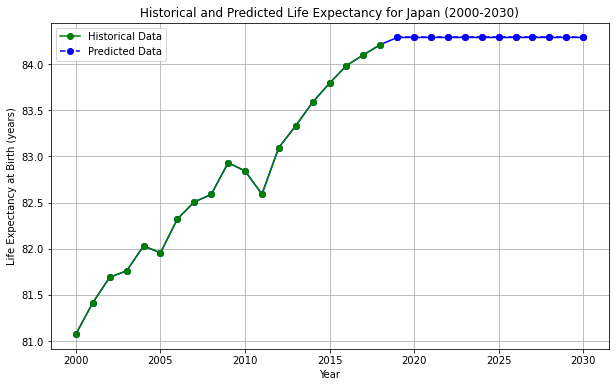

In [23]:
import matplotlib.pyplot as plt

# Function to plot historical and predicted life expectancy for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extracting historical values for the specified country (2000-2019)
    historical_data = selected_df[(selected_df['Country Name'] == country_name) & 
                                  (selected_df['Year'] >= TRAIN_START_YEAR) & 
                                  (selected_df['Year'] <= TRAIN_END_YEAR-1)]
    historical_years = historical_data['Year'].values
    historical_values = historical_data['Life expectancy at birth, total (years)'].values

    # Combining historical and predicted data to ensure a continuous line
    combined_years = list(historical_years) + predicted_years
    combined_values = list(historical_values) + predicted_values

    # Plotting historical and predicted values as a single line
    plt.figure(figsize=(10, 6))
    plt.plot(combined_years, combined_values, color='blue', marker='o', linestyle='-')
    plt.plot(historical_years, historical_values, label='Historical Data', color='green', marker='o')
    plt.plot(predicted_years, predicted_values, label='Predicted Data', color='blue', marker='o', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (years)")
    plt.title(f"Historical and Predicted Life Expectancy for {country_name} (2000-2030)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rerun the plotting function for Canada as an example
plot_country_predictions_vs_actual("Japan")

In [24]:
# !pip install shap

In [25]:
# Displaying feature importances from the Random Forest model directly

# Calculating feature importances
feature_importances = model_rf.feature_importances_
feature_names = ['Year', 'Moving_Avg_2Y', 'Moving_Avg_3Y', 'Moving_Avg_5Y', 'Moving_Avg_10Y']

# Creating a DataFrame to organize and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

,Feature,Importance
0,Moving_Avg_2Y,0.983210
1,Moving_Avg_3Y,0.016069
2,Moving_Avg_5Y,0.000443
3,Moving_Avg_10Y,0.000217
4,Year,0.000062


In [26]:
# Converting the dictionary of predictions for each country (country_recursive_predictions_rf) into a DataFrame

# Initialize an empty list to store rows for the DataFrame
rows = []

# Loop through each country and its predictions to build the DataFrame rows
for country, predictions in country_recursive_predictions_rf.items():
    for year, life_expectancy in predictions.items():
        # Append each prediction as a new row with the country, year, and predicted value
        rows.append({'Country Name': country, 'Year': year, 'Predicted Life Expectancy': life_expectancy})

# Convert the list of rows into a DataFrame
predictions_df = pd.DataFrame(rows)

# Display the first few rows of the DataFrame
predictions_df

,Country Name,Year,Predicted Life Expectancy
0,Afghanistan,2019,63.51713
1,Afghanistan,2020,63.32806
2,Afghanistan,2021,63.37869
3,Afghanistan,2022,63.29942
4,Afghanistan,2023,63.30228
...,...,...,...
2276,Zimbabwe,2026,62.21331
2277,Zimbabwe,2027,62.39084
2278,Zimbabwe,2028,62.49138
2279,Zimbabwe,2029,62.64840
